# Imports

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import missingno as msno
import datetime
import seaborn as sns
import plotly.express as px

from sklearn import metrics
from sklearn.metrics import matthews_corrcoef

from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

from sklearn import svm

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

from collections import Counter

from scipy.stats import pearsonr

import aux_functions 

In [45]:
warnings.filterwarnings("ignore")

# Loading Data

In [46]:

data = pd.read_csv("Datasets/X-IIoTID_dataset.csv")
print("Data has {} rows & {} columns".format(data.shape[0], data.shape[1]))

data.columns

Data has 820834 rows & 68 columns


Index(['Date', 'Timestamp', 'Scr_IP', 'Scr_port', 'Des_IP', 'Des_port',
       'Protocol', 'Service', 'Duration', 'Scr_bytes', 'Des_bytes',
       'Conn_state', 'missed_bytes', 'is_syn_only', 'Is_SYN_ACK',
       'is_pure_ack', 'is_with_payload', 'FIN or RST', 'Bad_checksum',
       'is_SYN_with_RST', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts',
       'Des_ip_bytes', 'anomaly_alert', 'total_bytes', 'total_packet',
       'paket_rate', 'byte_rate', 'Scr_packts_ratio', 'Des_pkts_ratio',
       'Scr_bytes_ratio', 'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time',
       'Avg_nice_time', 'Std_nice_time', 'Avg_system_time', 'Std_system_time',
       'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps',
       'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused',
       'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s', 'OSSEC_alert', 'OSSEC_alert_level', 'Lo

In [47]:
columns = data.columns
columns

Index(['Date', 'Timestamp', 'Scr_IP', 'Scr_port', 'Des_IP', 'Des_port',
       'Protocol', 'Service', 'Duration', 'Scr_bytes', 'Des_bytes',
       'Conn_state', 'missed_bytes', 'is_syn_only', 'Is_SYN_ACK',
       'is_pure_ack', 'is_with_payload', 'FIN or RST', 'Bad_checksum',
       'is_SYN_with_RST', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts',
       'Des_ip_bytes', 'anomaly_alert', 'total_bytes', 'total_packet',
       'paket_rate', 'byte_rate', 'Scr_packts_ratio', 'Des_pkts_ratio',
       'Scr_bytes_ratio', 'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time',
       'Avg_nice_time', 'Std_nice_time', 'Avg_system_time', 'Std_system_time',
       'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps',
       'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused',
       'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s', 'OSSEC_alert', 'OSSEC_alert_level', 'Lo

In [48]:
columns_copy = list()
for item in columns:
    curr = item.replace("_", " ")
    columns_copy.append(curr + " & " + '\\'+  "\ \hline")
print(*columns_copy)

Date & \\ \hline Timestamp & \\ \hline Scr IP & \\ \hline Scr port & \\ \hline Des IP & \\ \hline Des port & \\ \hline Protocol & \\ \hline Service & \\ \hline Duration & \\ \hline Scr bytes & \\ \hline Des bytes & \\ \hline Conn state & \\ \hline missed bytes & \\ \hline is syn only & \\ \hline Is SYN ACK & \\ \hline is pure ack & \\ \hline is with payload & \\ \hline FIN or RST & \\ \hline Bad checksum & \\ \hline is SYN with RST & \\ \hline Scr pkts & \\ \hline Scr ip bytes & \\ \hline Des pkts & \\ \hline Des ip bytes & \\ \hline anomaly alert & \\ \hline total bytes & \\ \hline total packet & \\ \hline paket rate & \\ \hline byte rate & \\ \hline Scr packts ratio & \\ \hline Des pkts ratio & \\ \hline Scr bytes ratio & \\ \hline Des bytes ratio & \\ \hline Avg user time & \\ \hline Std user time & \\ \hline Avg nice time & \\ \hline Std nice time & \\ \hline Avg system time & \\ \hline Std system time & \\ \hline Avg iowait time & \\ \hline Std iowait time & \\ \hline Avg ideal ti

In [49]:
print


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [50]:
data.head()

Date   Timestamp         Scr_IP Scr_port        Des_IP Des_port  \
0   9/01/2020  1578540956  192.168.2.199    49278  192.168.2.10       80   
1  13/01/2020  1578871873       10.0.1.5    39769  131.236.3.92       53   
2   9/01/2020  1578522486    172.24.1.80    59050    172.24.1.1       53   
3  27/02/2020  1582757640  192.168.2.196    37966  192.168.2.10     1880   
4  16/12/2019  1576452612    172.24.1.80    38233    172.24.1.1       53   

  Protocol    Service  Duration Scr_bytes  ... OSSEC_alert_level  \
0      tcp       http   0.67369     13437  ...                 5   
1      udp        dns  0.000083        78  ...                 0   
2      udp        dns  0.000132        38  ...                 0   
3      tcp  websocket  9.378481      1121  ...                 0   
4      udp        dns  0.000074         -  ...                 0   

   Login_attempt Succesful_login  File_activity  Process_activity  \
0              0               0              0                 0   
1              0               0              0                 0   
2              0               0              0                 0   
3              1               1              1                 1   
4              0               0              0                 0   

   read_write_physical.process  is_privileged                  class1  \
0                            0              0  Scanning_vulnerability   
1                            0              0                  Normal   
2                            0              0                  Normal   
3                            1              1                  Normal   
4                            0              0                  Normal   

           class2  class3  
0  Reconnaissance  Attack  
1          Normal  Normal  
2          Normal  Normal  
3          Normal  Normal  
4          Normal  Normal  

[5 rows x 68 columns]

In [51]:
data.replace('-', np.NaN, inplace=True)
data.replace('?', np.NaN, inplace=True)

# Pre-Processing

## Drop and replace 

Drop Columns ['Date' , 'Scr_IP' , 'Des_IP' , 'Scr_port', 'Des_port' , 'Timestamp']

In [52]:
data = data.drop(columns = ['Date' , 'Scr_IP' , 'Des_IP' , 'Scr_port', 'Des_port' , 'Timestamp'])
data.columns

Index(['Protocol', 'Service', 'Duration', 'Scr_bytes', 'Des_bytes',
       'Conn_state', 'missed_bytes', 'is_syn_only', 'Is_SYN_ACK',
       'is_pure_ack', 'is_with_payload', 'FIN or RST', 'Bad_checksum',
       'is_SYN_with_RST', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts',
       'Des_ip_bytes', 'anomaly_alert', 'total_bytes', 'total_packet',
       'paket_rate', 'byte_rate', 'Scr_packts_ratio', 'Des_pkts_ratio',
       'Scr_bytes_ratio', 'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time',
       'Avg_nice_time', 'Std_nice_time', 'Avg_system_time', 'Std_system_time',
       'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps',
       'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused',
       'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s', 'OSSEC_alert', 'OSSEC_alert_level', 'Login_attempt',
       'Succesful_login', 'File_activity', 'Process_activi

Replace 'FALSE' for False and 'TRUE' for True in dataset

In [53]:
data['anomaly_alert'].unique()

array(['TRUE', 'FALSE', nan, False, True], dtype=object)

In [54]:
data.replace('TRUE', True, inplace=True)
data.replace('FALSE', True, inplace=True)

In [55]:
data['anomaly_alert'].unique()

array([True, nan, False], dtype=object)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820834 entries, 0 to 820833
Data columns (total 62 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Protocol                     820680 non-null  object
 1   Service                      820834 non-null  object
 2   Duration                     745073 non-null  object
 3   Scr_bytes                    596963 non-null  object
 4   Des_bytes                    596963 non-null  object
 5   Conn_state                   820834 non-null  int64 
 6   missed_bytes                 820680 non-null  object
 7   is_syn_only                  820834 non-null  bool  
 8   Is_SYN_ACK                   820834 non-null  bool  
 9   is_pure_ack                  820834 non-null  bool  
 10  is_with_payload              820834 non-null  bool  
 11  FIN or RST                   820834 non-null  bool  
 12  Bad_checksum                 820834 non-null  bool  
 13  is_SYN_with_RS

Encode categorical features 'Protocol' and Service

In [57]:
categorical_features = data[ ["Protocol", "Service", 'Conn_state', 'is_syn_only', 'Is_SYN_ACK', 'is_pure_ack', 'is_with_payload', 'FIN or RST',
                        'Bad_checksum', 'is_SYN_with_RST' , 'OSSEC_alert', 'Login_attempt', 'Succesful_login', 'File_activity',
                        'Process_activity', 'read_write_physical.process', 'is_privileged' , 'OSSEC_alert_level'] ]

for col in categorical_features.columns:
    print(f'{col}: {categorical_features[col].unique()}\n')

Protocol: ['tcp' 'udp' 'icmp' nan]

Service: ['http' 'dns' 'websocket' 'coap' 'other' 'mqtt' 'https' 'ssh' 'smtp'
 'modbus' 'private' 'netbios-ns' 'simple_service_discovery' 'echo' 'imap'
 'mysql' 'dhcp']

Conn_state: [1 0]

is_syn_only: [ True False]

Is_SYN_ACK: [ True False]

is_pure_ack: [ True False]

is_with_payload: [ True False]

FIN or RST: [ True False]

Bad_checksum: [False]

is_SYN_with_RST: [False]

OSSEC_alert: [1 0]

Login_attempt: [0 1]

Succesful_login: [0 1]

File_activity: [0 1]

Process_activity: [0 1]

read_write_physical.process: [0 1]

is_privileged: [0 1]

OSSEC_alert_level: [ 5  0  3 10  6  4]



In [58]:
numerical_features = data.columns.drop(categorical_features)
numerical_features = numerical_features.drop('class1')
numerical_features = numerical_features.drop('class2')
numerical_features = numerical_features.drop('class3')
numerical_features

Index(['Duration', 'Scr_bytes', 'Des_bytes', 'missed_bytes', 'Scr_pkts',
       'Scr_ip_bytes', 'Des_pkts', 'Des_ip_bytes', 'anomaly_alert',
       'total_bytes', 'total_packet', 'paket_rate', 'byte_rate',
       'Scr_packts_ratio', 'Des_pkts_ratio', 'Scr_bytes_ratio',
       'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time', 'Avg_nice_time',
       'Std_nice_time', 'Avg_system_time', 'Std_system_time',
       'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps',
       'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused',
       'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s'],
      dtype='object')

In [59]:
data = pd.get_dummies(data, columns = ['Protocol', 'Service', 'OSSEC_alert_level'])
data

Duration Scr_bytes Des_bytes  Conn_state missed_bytes  is_syn_only  \
0         0.67369     13437     34924           1            0         True   
1        0.000083        78         0           1            0        False   
2        0.000132        38        38           1            0        False   
3        9.378481      1121       484           1            0         True   
4        0.000074       NaN       NaN           1            0        False   
...           ...       ...       ...         ...          ...          ...   
820829        NaN       NaN       NaN           0            0        False   
820830  63.290477         0         0           1            0         True   
820831  14.787547     26091    604398           0            0         True   
820832   0.000011         0         0           0            0         True   
820833   0.000004       108         0           1            0        False   

        Is_SYN_ACK  is_pure_ack  is_with_payload  FIN or RST  ...  \
0             True         True             True        True  ...   
1            False        False             True       False  ...   
2            False        False             True       False  ...   
3             True         True             True        True  ...   
4            False        False             True       False  ...   
...            ...          ...              ...         ...  ...   
820829       False        False            False       False  ...   
820830        True         True            False        True  ...   
820831        True         True             True        True  ...   
820832       False        False            False        True  ...   
820833       False        False             True       False  ...   

        Service_simple_service_discovery  Service_smtp Service_ssh  \
0                                  False         False       False   
1                                  False         False       False   
2                                  False         False       False   
3                                  False         False       False   
4                                  False         False       False   
...                                  ...           ...         ...   
820829                             False         False        True   
820830                             False         False       False   
820831                             False         False       False   
820832                             False         False       False   
820833                             False         False       False   

       Service_websocket OSSEC_alert_level_0 OSSEC_alert_level_3  \
0                  False               False               False   
1                  False                True               False   
2                  False                True               False   
3                   True                True               False   
4                  False                True               False   
...                  ...                 ...                 ...   
820829             False                True               False   
820830              True                True               False   
820831             False                True               False   
820832             False                True               False   
820833             False                True               False   

       OSSEC_alert_level_4 OSSEC_alert_level_5 OSSEC_alert_level_6  \
0                    False                True               False   
1                    False               False               False   
2                    False               False               False   
3                    False               False               False   
4                    False               False               False   
...                    ...                 ...                 ...   
820829               False               False               False   
820830       

In [60]:
data = data.drop(columns = ['Bad_checksum', 'is_SYN_with_RST'])
data

Duration Scr_bytes Des_bytes  Conn_state missed_bytes  is_syn_only  \
0         0.67369     13437     34924           1            0         True   
1        0.000083        78         0           1            0        False   
2        0.000132        38        38           1            0        False   
3        9.378481      1121       484           1            0         True   
4        0.000074       NaN       NaN           1            0        False   
...           ...       ...       ...         ...          ...          ...   
820829        NaN       NaN       NaN           0            0        False   
820830  63.290477         0         0           1            0         True   
820831  14.787547     26091    604398           0            0         True   
820832   0.000011         0         0           0            0         True   
820833   0.000004       108         0           1            0        False   

        Is_SYN_ACK  is_pure_ack  is_with_payload  FIN or RST  ...  \
0             True         True             True        True  ...   
1            False        False             True       False  ...   
2            False        False             True       False  ...   
3             True         True             True        True  ...   
4            False        False             True       False  ...   
...            ...          ...              ...         ...  ...   
820829       False        False            False       False  ...   
820830        True         True            False        True  ...   
820831        True         True             True        True  ...   
820832       False        False            False        True  ...   
820833       False        False             True       False  ...   

       Service_simple_service_discovery Service_smtp Service_ssh  \
0                                 False        False       False   
1                                 False        False       False   
2                                 False        False       False   
3                                 False        False       False   
4                                 False        False       False   
...                                 ...          ...         ...   
820829                            False        False        True   
820830                            False        False       False   
820831                            False        False       False   
820832                            False        False       False   
820833                            False        False       False   

       Service_websocket OSSEC_alert_level_0 OSSEC_alert_level_3  \
0                  False               False               False   
1                  False                True               False   
2                  False                True               False   
3                   True                True               False   
4                  False                True               False   
...                  ...                 ...                 ...   
820829             False                True               False   
820830              True                True               False   
820831             False                True               False   
820832             False                True               False   
820833             False                True               False   

       OSSEC_alert_level_4 OSSEC_alert_level_5 OSSEC_alert_level_6  \
0                    False                True               False   
1                    False               False               False   
2                    False               False               False   
3                    False               False               False   
4                    False               False               False   
...                    ...                 ...                 ...   
820829               False               False               False   
820830               False           

Remove rows with values : \
"excel" in column "Scr_ip_bytes" \
"aza" and  ' ' in column Avg_user_time

In [61]:
print(data["Scr_ip_bytes"].value_counts()['excel'])

1


In [62]:
mask = data['Scr_ip_bytes'] == 'excel'
data = data[~mask]
data

Duration Scr_bytes Des_bytes  Conn_state missed_bytes  is_syn_only  \
0         0.67369     13437     34924           1            0         True   
1        0.000083        78         0           1            0        False   
2        0.000132        38        38           1            0        False   
3        9.378481      1121       484           1            0         True   
4        0.000074       NaN       NaN           1            0        False   
...           ...       ...       ...         ...          ...          ...   
820829        NaN       NaN       NaN           0            0        False   
820830  63.290477         0         0           1            0         True   
820831  14.787547     26091    604398           0            0         True   
820832   0.000011         0         0           0            0         True   
820833   0.000004       108         0           1            0        False   

        Is_SYN_ACK  is_pure_ack  is_with_payload  FIN or RST  ...  \
0             True         True             True        True  ...   
1            False        False             True       False  ...   
2            False        False             True       False  ...   
3             True         True             True        True  ...   
4            False        False             True       False  ...   
...            ...          ...              ...         ...  ...   
820829       False        False            False       False  ...   
820830        True         True            False        True  ...   
820831        True         True             True        True  ...   
820832       False        False            False        True  ...   
820833       False        False             True       False  ...   

       Service_simple_service_discovery Service_smtp Service_ssh  \
0                                 False        False       False   
1                                 False        False       False   
2                                 False        False       False   
3                                 False        False       False   
4                                 False        False       False   
...                                 ...          ...         ...   
820829                            False        False        True   
820830                            False        False       False   
820831                            False        False       False   
820832                            False        False       False   
820833                            False        False       False   

       Service_websocket OSSEC_alert_level_0 OSSEC_alert_level_3  \
0                  False               False               False   
1                  False                True               False   
2                  False                True               False   
3                   True                True               False   
4                  False                True               False   
...                  ...                 ...                 ...   
820829             False                True               False   
820830              True                True               False   
820831             False                True               False   
820832             False                True               False   
820833             False                True               False   

       OSSEC_alert_level_4 OSSEC_alert_level_5 OSSEC_alert_level_6  \
0                    False                True               False   
1                    False               False               False   
2                    False               False               False   
3                    False               False               False   
4                    False               False               False   
...                    ...                 ...                 ...   
820829               False               False               False   
820830               False           

In [63]:
print(data["Avg_user_time"].value_counts()['aza'])
print(data["Avg_user_time"].value_counts()[' '])

18
1


In [64]:
mask = data['Avg_user_time'] == 'aza'
data = data[~mask]
mask = data['Avg_user_time'] == ' '
data = data[~mask]
data

Duration Scr_bytes Des_bytes  Conn_state missed_bytes  is_syn_only  \
0         0.67369     13437     34924           1            0         True   
1        0.000083        78         0           1            0        False   
2        0.000132        38        38           1            0        False   
3        9.378481      1121       484           1            0         True   
4        0.000074       NaN       NaN           1            0        False   
...           ...       ...       ...         ...          ...          ...   
820829        NaN       NaN       NaN           0            0        False   
820830  63.290477         0         0           1            0         True   
820831  14.787547     26091    604398           0            0         True   
820832   0.000011         0         0           0            0         True   
820833   0.000004       108         0           1            0        False   

        Is_SYN_ACK  is_pure_ack  is_with_payload  FIN or RST  ...  \
0             True         True             True        True  ...   
1            False        False             True       False  ...   
2            False        False             True       False  ...   
3             True         True             True        True  ...   
4            False        False             True       False  ...   
...            ...          ...              ...         ...  ...   
820829       False        False            False       False  ...   
820830        True         True            False        True  ...   
820831        True         True             True        True  ...   
820832       False        False            False        True  ...   
820833       False        False             True       False  ...   

       Service_simple_service_discovery Service_smtp Service_ssh  \
0                                 False        False       False   
1                                 False        False       False   
2                                 False        False       False   
3                                 False        False       False   
4                                 False        False       False   
...                                 ...          ...         ...   
820829                            False        False        True   
820830                            False        False       False   
820831                            False        False       False   
820832                            False        False       False   
820833                            False        False       False   

       Service_websocket OSSEC_alert_level_0 OSSEC_alert_level_3  \
0                  False               False               False   
1                  False                True               False   
2                  False                True               False   
3                   True                True               False   
4                  False                True               False   
...                  ...                 ...                 ...   
820829             False                True               False   
820830              True                True               False   
820831             False                True               False   
820832             False                True               False   
820833             False                True               False   

       OSSEC_alert_level_4 OSSEC_alert_level_5 OSSEC_alert_level_6  \
0                    False                True               False   
1                    False               False               False   
2                    False               False               False   
3                    False               False               False   
4                    False               False               False   
...                    ...                 ...                 ...   
820829               False               False               False   
820830               False           

Replace with -1 values of "#DIV/0!" in columns "Avg_kbmemused" and "Std_kbmemused"

In [65]:
print(data["Avg_kbmemused"].value_counts()['#DIV/0!'])
print(data["Std_kbmemused"].value_counts()['#DIV/0!'])

630
630


In [66]:
mask = data['Avg_kbmemused'] == '#DIV/0!'
data = data[~mask]
mask = data['Std_kbmemused'] == '#DIV/0!'
data = data[~mask]
data

Duration Scr_bytes Des_bytes  Conn_state missed_bytes  is_syn_only  \
0         0.67369     13437     34924           1            0         True   
1        0.000083        78         0           1            0        False   
2        0.000132        38        38           1            0        False   
3        9.378481      1121       484           1            0         True   
4        0.000074       NaN       NaN           1            0        False   
...           ...       ...       ...         ...          ...          ...   
820829        NaN       NaN       NaN           0            0        False   
820830  63.290477         0         0           1            0         True   
820831  14.787547     26091    604398           0            0         True   
820832   0.000011         0         0           0            0         True   
820833   0.000004       108         0           1            0        False   

        Is_SYN_ACK  is_pure_ack  is_with_payload  FIN or RST  ...  \
0             True         True             True        True  ...   
1            False        False             True       False  ...   
2            False        False             True       False  ...   
3             True         True             True        True  ...   
4            False        False             True       False  ...   
...            ...          ...              ...         ...  ...   
820829       False        False            False       False  ...   
820830        True         True            False        True  ...   
820831        True         True             True        True  ...   
820832       False        False            False        True  ...   
820833       False        False             True       False  ...   

       Service_simple_service_discovery Service_smtp Service_ssh  \
0                                 False        False       False   
1                                 False        False       False   
2                                 False        False       False   
3                                 False        False       False   
4                                 False        False       False   
...                                 ...          ...         ...   
820829                            False        False        True   
820830                            False        False       False   
820831                            False        False       False   
820832                            False        False       False   
820833                            False        False       False   

       Service_websocket OSSEC_alert_level_0 OSSEC_alert_level_3  \
0                  False               False               False   
1                  False                True               False   
2                  False                True               False   
3                   True                True               False   
4                  False                True               False   
...                  ...                 ...                 ...   
820829             False                True               False   
820830              True                True               False   
820831             False                True               False   
820832             False                True               False   
820833             False                True               False   

       OSSEC_alert_level_4 OSSEC_alert_level_5 OSSEC_alert_level_6  \
0                    False                True               False   
1                    False               False               False   
2                    False               False               False   
3                    False               False               False   
4                    False               False               False   
...                    ...                 ...                 ...   
820829               False               False               False   
820830               False           

Verifie number os attacks

In [67]:
data["class1"].value_counts()

class1
Normal                            420825
RDOS                              141261
Scanning_vulnerability             52852
Generic_scanning                   50277
BruteForce                         47241
MQTT_cloud_broker_subscription     23524
Discovering_resources              23148
Exfiltration                       22134
insider_malcious                   17443
Modbus_register_reading             5953
False_data_injection                5094
C&C                                 2809
Dictionary                          2572
TCP Relay                           2119
fuzzing                             1313
Reverse_shell                       1016
crypto-ransomware                    458
MitM                                 117
Fake_notification                     28
Name: count, dtype: int64

Remove Fake_notification and MitM

In [68]:
data = data[data.class1 != 'MitM']
data = data[data.class1 != 'Fake_notification']
data["class1"].value_counts()

class1
Normal                            420825
RDOS                              141261
Scanning_vulnerability             52852
Generic_scanning                   50277
BruteForce                         47241
MQTT_cloud_broker_subscription     23524
Discovering_resources              23148
Exfiltration                       22134
insider_malcious                   17443
Modbus_register_reading             5953
False_data_injection                5094
C&C                                 2809
Dictionary                          2572
TCP Relay                           2119
fuzzing                             1313
Reverse_shell                       1016
crypto-ransomware                    458
Name: count, dtype: int64

Save target classes

In [69]:
class3_target = data["class3"].replace({"Normal" : 0, "Attack" : 1 })

In [70]:
class2_target = data["class2"].replace({"Normal" : 0 , "RDOS" : 1 , "Reconnaissance" : 2,  "Weaponization" : 3 , "Lateral _movement" : 4 , "Exfiltration" : 5,
                        "Tampering" : 6 , "C&C" : 7, "Exploitation" : 8 , "crypto-ransomware" : 9})

In [71]:
class1_target = data["class1"].replace({"Normal" : 0 , "RDOS" : 1 , "Scanning_vulnerability" : 2 , "Generic_scanning" : 3 , "BruteForce" : 4 , 
                        "MQTT_cloud_broker_subscription" : 5 , "Discovering_resources" : 6 , "Exfiltration" : 7 ,"insider_malcious" : 8 ,
                        "Modbus_register_reading" : 9 , "False_data_injection": 10 , "C&C" : 11 , "Dictionary" : 12,  "TCP Relay" : 13 ,
                        "fuzzing" : 14 , "Reverse_shell" : 15 , "crypto-ransomware" : 16 
                        })

In [72]:
class1_target.unique()

array([ 2,  0,  1,  3,  4,  6,  5,  7,  8, 12,  9, 15, 10, 14, 13, 11, 16],
      dtype=int64)

Replace missing values

In [73]:
column_missings = data.columns[data.isnull().any()]
print(column_missings)

numerical_features

for col in numerical_features:
    print(data[col].dtypes)

for col in column_missings:
    #print(data[col].mean())
    data[col].fillna(int(data[col].mean()), inplace=True)
data

column_missings2 = data.columns[data.isnull().any()]
print(column_missings2)

In [ ]:
numerical_features

## Split Data

In [74]:
data = data.drop(columns=["class1", "class2", "class3"])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(data, class1_target,
                                                    stratify=class1_target, 
                                                    test_size=0.2)

In [76]:
X_train.columns

Index(['Duration', 'Scr_bytes', 'Des_bytes', 'Conn_state', 'missed_bytes',
       'is_syn_only', 'Is_SYN_ACK', 'is_pure_ack', 'is_with_payload',
       'FIN or RST', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts', 'Des_ip_bytes',
       'anomaly_alert', 'total_bytes', 'total_packet', 'paket_rate',
       'byte_rate', 'Scr_packts_ratio', 'Des_pkts_ratio', 'Scr_bytes_ratio',
       'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time', 'Avg_nice_time',
       'Std_nice_time', 'Avg_system_time', 'Std_system_time',
       'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps',
       'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused',
       'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s', 'OSSEC_alert', 'Login_attempt', 'Succesful_login',
       'File_activity', 'Process_activity', 'read_write_physical.process',
       'is_privileged', 'Protocol_icmp', 'Protocol

In [77]:
y_train.unique()

array([ 0,  6,  1,  3,  2,  5, 13,  7,  9,  8, 10,  4, 11, 14, 12, 15, 16],
      dtype=int64)

In [78]:
y_test.value_counts()

class1
0     84165
1     28252
2     10570
3     10055
4      9448
5      4705
6      4630
7      4427
8      3489
9      1191
10     1019
11      562
12      514
13      424
14      263
15      203
16       91
Name: count, dtype: int64

In [79]:
X_test.columns

Index(['Duration', 'Scr_bytes', 'Des_bytes', 'Conn_state', 'missed_bytes',
       'is_syn_only', 'Is_SYN_ACK', 'is_pure_ack', 'is_with_payload',
       'FIN or RST', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts', 'Des_ip_bytes',
       'anomaly_alert', 'total_bytes', 'total_packet', 'paket_rate',
       'byte_rate', 'Scr_packts_ratio', 'Des_pkts_ratio', 'Scr_bytes_ratio',
       'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time', 'Avg_nice_time',
       'Std_nice_time', 'Avg_system_time', 'Std_system_time',
       'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps',
       'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused',
       'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s', 'OSSEC_alert', 'Login_attempt', 'Succesful_login',
       'File_activity', 'Process_activity', 'read_write_physical.process',
       'is_privileged', 'Protocol_icmp', 'Protocol

## Pearson Correlation

In [37]:
X_train2 = X_train
X_train2["class1"] = class1_target
X_train2["class2"] = class2_target
X_train2["class3"] = class3_target

In [38]:
columuns_xtrain = data.columns

In [39]:
X_train.columns

Index(['Duration', 'Scr_bytes', 'Des_bytes', 'Conn_state', 'missed_bytes',
       'is_syn_only', 'Is_SYN_ACK', 'is_pure_ack', 'is_with_payload',
       'FIN or RST', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts', 'Des_ip_bytes',
       'anomaly_alert', 'total_bytes', 'total_packet', 'paket_rate',
       'byte_rate', 'Scr_packts_ratio', 'Des_pkts_ratio', 'Scr_bytes_ratio',
       'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time', 'Avg_nice_time',
       'Std_nice_time', 'Avg_system_time', 'Std_system_time',
       'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps',
       'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused',
       'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s', 'OSSEC_alert', 'Login_attempt', 'Succesful_login',
       'File_activity', 'Process_activity', 'read_write_physical.process',
       'is_privileged', 'Protocol_icmp', 'Protocol

In [40]:
plt.figure(figsize=(16, 12))
corr = X_train2.corr(method='pearson')
corr_matrix = sns.heatmap(corr, cbar=True, annot=False, cmap="Purples")

KeyboardInterrupt: 

<Figure size 1600x1200 with 0 Axes>

In [41]:
X_train = X_train.drop(columns=["class1", "class2" , "class3"])

According to Cohen's Standard Absolute value: \
    Weak: from 0.1 to 0.29\
    Intermediate: from 0.3 to 0.49\
    Strong: 0.5 to 1

In [ ]:
for col in  X_train.columns :
    for col2 in  X_train.columns :
        if(col != col2):
            corr, _ = pearsonr(X_train[col].astype(float), X_train[col2].astype(float))
            if(abs(corr) >= 0.5):
                print(f'{str(col)}  { str(col2)}  Pearsons correlation: %.3f' % corr)

Protocol  is_syn_only  Pearsons correlation: -0.988
Protocol  Is_SYN_ACK  Pearsons correlation: -0.776
Protocol  is_pure_ack  Pearsons correlation: -0.777
Protocol  FIN or RST  Pearsons correlation: -0.976
Scr_bytes  Scr_pkts  Pearsons correlation: 0.550
Scr_bytes  Scr_ip_bytes  Pearsons correlation: 0.804
Scr_bytes  Des_pkts  Pearsons correlation: 0.555
Scr_bytes  total_packet  Pearsons correlation: 0.560
Des_bytes  Des_ip_bytes  Pearsons correlation: 0.991
Des_bytes  total_bytes  Pearsons correlation: 0.996
Conn_state  is_with_payload  Pearsons correlation: 0.841
is_syn_only  Protocol  Pearsons correlation: -0.988
is_syn_only  Is_SYN_ACK  Pearsons correlation: 0.783
is_syn_only  is_pure_ack  Pearsons correlation: 0.780
is_syn_only  FIN or RST  Pearsons correlation: 0.982
Is_SYN_ACK  Protocol  Pearsons correlation: -0.776
Is_SYN_ACK  is_syn_only  Pearsons correlation: 0.783
Is_SYN_ACK  is_pure_ack  Pearsons correlation: 0.996
Is_SYN_ACK  FIN or RST  Pearsons correlation: 0.794
is_pure

## Normalization

In [80]:
X_train

Duration Scr_bytes Des_bytes  Conn_state missed_bytes  is_syn_only  \
646111  0.000057        -1        -1           1            0        False   
100103  4.016371         0         0           1            0         True   
600479  0.000056        37        37           1            0        False   
234552  0.000052       108         0           1            0        False   
769972  7.793962        -1        -1           1            0         True   
...          ...       ...       ...         ...          ...          ...   
370219  0.000097        44        44           1            0        False   
268734  0.212723       135       310           1            0         True   
400625  9.689818        -1        -1           1            0         True   
595620  0.068132      7340       492           1            0         True   
252982   0.00449       268       310           1            0         True   

        Is_SYN_ACK  is_pure_ack  is_with_payload  FIN or RST  ...  \
646111       False        False             True       False  ...   
100103       False        False            False       False  ...   
600479       False        False             True       False  ...   
234552       False        False             True       False  ...   
769972        True         True             True        True  ...   
...            ...          ...              ...         ...  ...   
370219       False        False             True       False  ...   
268734        True         True             True        True  ...   
400625        True         True             True        True  ...   
595620        True         True             True        True  ...   
252982        True         True             True        True  ...   

       Service_simple_service_discovery Service_smtp Service_ssh  \
646111                            False        False       False   
100103                            False        False       False   
600479                            False        False       False   
234552                            False        False       False   
769972                            False        False       False   
...                                 ...          ...         ...   
370219                            False        False       False   
268734                            False        False       False   
400625                            False        False       False   
595620                            False        False       False   
252982                            False        False       False   

       Service_websocket OSSEC_alert_level_0 OSSEC_alert_level_3  \
646111             False                True               False   
100103             False                True               False   
600479             False                True               False   
234552             False                True               False   
769972             False                True               False   
...                  ...                 ...                 ...   
370219             False                True               False   
268734             False               False               False   
400625              True                True               False   
595620             False                True               False   
252982             False               False               False   

       OSSEC_alert_level_4 OSSEC_alert_level_5 OSSEC_alert_level_6  \
646111               False               False               False   
100103               False               False               False   
600479               False               False               False   
234552               False               False               False   
769972               False               False               False   
...                    ...                 ...                 ...   
370219               False               False               False   
268734               False                True  

In [81]:
X_train.head()

Duration Scr_bytes Des_bytes  Conn_state missed_bytes  is_syn_only  \
646111  0.000057        -1        -1           1            0        False   
100103  4.016371         0         0           1            0         True   
600479  0.000056        37        37           1            0        False   
234552  0.000052       108         0           1            0        False   
769972  7.793962        -1        -1           1            0         True   

        Is_SYN_ACK  is_pure_ack  is_with_payload  FIN or RST  ...  \
646111       False        False             True       False  ...   
100103       False        False            False       False  ...   
600479       False        False             True       False  ...   
234552       False        False             True       False  ...   
769972        True         True             True        True  ...   

       Service_simple_service_discovery Service_smtp Service_ssh  \
646111                            False        False       False   
100103                            False        False       False   
600479                            False        False       False   
234552                            False        False       False   
769972                            False        False       False   

       Service_websocket OSSEC_alert_level_0 OSSEC_alert_level_3  \
646111             False                True               False   
100103             False                True               False   
600479             False                True               False   
234552             False                True               False   
769972             False                True               False   

       OSSEC_alert_level_4 OSSEC_alert_level_5 OSSEC_alert_level_6  \
646111               False               False               False   
100103               False               False               False   
600479               False               False               False   
234552               False               False               False   
769972               False               False               False   

       OSSEC_alert_level_10  
646111                False  
100103                False  
600479                False  
234552                False  
769972                False  

[5 rows x 80 columns]

In [82]:
col_names = list(X_train.columns)
features = X_train[col_names]

ct = ColumnTransformer([
        ('somename', StandardScaler(), numerical_features)
    ], remainder='passthrough')

X_train = pd.DataFrame(ct.fit_transform(features))
X_train

0         1         2         3         4         5         6   \
0       -0.07695 -0.208228 -0.146015 -0.008928 -0.077232 -0.132837 -0.112475   
1      -0.041648 -0.208089 -0.146012 -0.008928 -0.054458 -0.115782 -0.108536   
2       -0.07695 -0.202939  -0.14588 -0.008928  -0.06964  -0.12933 -0.104597   
3       -0.07695 -0.193057 -0.146012 -0.008928 -0.065845 -0.124071 -0.108536   
4      -0.008444 -0.208228 -0.146015 -0.008928 -0.077232 -0.132837 -0.112475   
...          ...       ...       ...       ...       ...       ...       ...   
656026  -0.07695 -0.201965 -0.145855 -0.008928  -0.06964 -0.128958 -0.104597   
656027 -0.075081 -0.189299  -0.14491 -0.008928 -0.050662  -0.10861 -0.088841   
656028   0.00822 -0.208228 -0.146015 -0.008928 -0.077232 -0.132837 -0.112475   
656029 -0.076352   0.81351 -0.144264 -0.008928  -0.03548  0.283962 -0.088841   
656030 -0.076911 -0.170788  -0.14491 -0.008928 -0.050662 -0.101544 -0.088841   

              7         8         9   ...     70     71     72     73     74  \
0      -0.148617  -1.99584 -0.152137  ...  False  False  False  False   True   
1      -0.148614  0.499958 -0.151585  ...  False  False  False  False   True   
2      -0.148391  0.499958 -0.151784  ...  False  False  False  False   True   
3      -0.148614  0.499958 -0.151668  ...  False  False  False  False   True   
4      -0.148617  0.499958 -0.152137  ...  False  False  False  False   True   
...          ...       ...       ...  ...    ...    ...    ...    ...    ...   
656026 -0.148367  0.499958 -0.151736  ...  False  False  False  False   True   
656027 -0.146635  0.499958 -0.149593  ...  False  False  False  False  False   
656028 -0.148617  0.499958 -0.152137  ...  False  False  False   True   True   
656029 -0.146012  0.499958 -0.123868  ...  False  False  False  False   True   
656030 -0.146635  0.499958 -0.149136  ...  False  False  False  False  False   

           75     76     77     78     79  
0       False  False  False  False  False  
1       False  False  False  False  False  
2       False  False  False  False  False  
3       False  False  False  False  False  
4       False  False  False  False  False  
...       ...    ...    ...    ...    ...  
656026  False  False  False  False  False  
656027  False  False   True  False  False  
656028  False  False  False  False  False  
656029  False  False  False  False  False  
656030  False  False   True  False  False  

[656031 rows x 80 columns]

In [83]:
X_train.head()

0         1         2         3         4         5         6   \
0  -0.07695 -0.208228 -0.146015 -0.008928 -0.077232 -0.132837 -0.112475   
1 -0.041648 -0.208089 -0.146012 -0.008928 -0.054458 -0.115782 -0.108536   
2  -0.07695 -0.202939  -0.14588 -0.008928  -0.06964  -0.12933 -0.104597   
3  -0.07695 -0.193057 -0.146012 -0.008928 -0.065845 -0.124071 -0.108536   
4 -0.008444 -0.208228 -0.146015 -0.008928 -0.077232 -0.132837 -0.112475   

         7         8         9   ...     70     71     72     73    74     75  \
0 -0.148617  -1.99584 -0.152137  ...  False  False  False  False  True  False   
1 -0.148614  0.499958 -0.151585  ...  False  False  False  False  True  False   
2 -0.148391  0.499958 -0.151784  ...  False  False  False  False  True  False   
3 -0.148614  0.499958 -0.151668  ...  False  False  False  False  True  False   
4 -0.148617  0.499958 -0.152137  ...  False  False  False  False  True  False   

      76     77     78     79  
0  False  False  False  False  
1  False  False  False  False  
2  False  False  False  False  
3  False  False  False  False  
4  False  False  False  False  

[5 rows x 80 columns]

In [84]:
X_train

0         1         2         3         4         5         6   \
0       -0.07695 -0.208228 -0.146015 -0.008928 -0.077232 -0.132837 -0.112475   
1      -0.041648 -0.208089 -0.146012 -0.008928 -0.054458 -0.115782 -0.108536   
2       -0.07695 -0.202939  -0.14588 -0.008928  -0.06964  -0.12933 -0.104597   
3       -0.07695 -0.193057 -0.146012 -0.008928 -0.065845 -0.124071 -0.108536   
4      -0.008444 -0.208228 -0.146015 -0.008928 -0.077232 -0.132837 -0.112475   
...          ...       ...       ...       ...       ...       ...       ...   
656026  -0.07695 -0.201965 -0.145855 -0.008928  -0.06964 -0.128958 -0.104597   
656027 -0.075081 -0.189299  -0.14491 -0.008928 -0.050662  -0.10861 -0.088841   
656028   0.00822 -0.208228 -0.146015 -0.008928 -0.077232 -0.132837 -0.112475   
656029 -0.076352   0.81351 -0.144264 -0.008928  -0.03548  0.283962 -0.088841   
656030 -0.076911 -0.170788  -0.14491 -0.008928 -0.050662 -0.101544 -0.088841   

              7         8         9   ...     70     71     72     73     74  \
0      -0.148617  -1.99584 -0.152137  ...  False  False  False  False   True   
1      -0.148614  0.499958 -0.151585  ...  False  False  False  False   True   
2      -0.148391  0.499958 -0.151784  ...  False  False  False  False   True   
3      -0.148614  0.499958 -0.151668  ...  False  False  False  False   True   
4      -0.148617  0.499958 -0.152137  ...  False  False  False  False   True   
...          ...       ...       ...  ...    ...    ...    ...    ...    ...   
656026 -0.148367  0.499958 -0.151736  ...  False  False  False  False   True   
656027 -0.146635  0.499958 -0.149593  ...  False  False  False  False  False   
656028 -0.148617  0.499958 -0.152137  ...  False  False  False   True   True   
656029 -0.146012  0.499958 -0.123868  ...  False  False  False  False   True   
656030 -0.146635  0.499958 -0.149136  ...  False  False  False  False  False   

           75     76     77     78     79  
0       False  False  False  False  False  
1       False  False  False  False  False  
2       False  False  False  False  False  
3       False  False  False  False  False  
4       False  False  False  False  False  
...       ...    ...    ...    ...    ...  
656026  False  False  False  False  False  
656027  False  False   True  False  False  
656028  False  False  False  False  False  
656029  False  False  False  False  False  
656030  False  False   True  False  False  

[656031 rows x 80 columns]

In [85]:
X_test

Duration Scr_bytes Des_bytes  Conn_state missed_bytes  is_syn_only  \
565359   0.000006        -1        -1           1            0        False   
663727   0.209636        -1        -1           1            0         True   
312820   0.000347       312       312           1            0        False   
499147         -1        -1        -1           1            0        False   
741097   0.000003        78         0           1            0        False   
...           ...       ...       ...         ...          ...          ...   
166580  39.976019       846    102853           0            0         True   
810617   0.000486       156       156           1            0        False   
813508   0.024076        27        99           1            0        False   
172842    0.00047         0         0           0            0         True   
264945   0.000113        74        74           1            0        False   

        Is_SYN_ACK  is_pure_ack  is_with_payload  FIN or RST  ...  \
565359       False        False             True       False  ...   
663727        True         True             True        True  ...   
312820       False        False             True       False  ...   
499147       False        False             True       False  ...   
741097       False        False             True       False  ...   
...            ...          ...              ...         ...  ...   
166580        True         True             True        True  ...   
810617       False        False             True       False  ...   
813508       False        False             True       False  ...   
172842       False        False            False        True  ...   
264945       False        False             True       False  ...   

       Service_simple_service_discovery Service_smtp Service_ssh  \
565359                            False        False       False   
663727                            False        False       False   
312820                            False        False       False   
499147                            False        False       False   
741097                            False        False       False   
...                                 ...          ...         ...   
166580                            False        False       False   
810617                            False        False       False   
813508                            False        False       False   
172842                            False        False       False   
264945                            False        False       False   

       Service_websocket OSSEC_alert_level_0 OSSEC_alert_level_3  \
565359             False                True               False   
663727             False               False               False   
312820             False                True               False   
499147             False                True               False   
741097             False                True               False   
...                  ...                 ...                 ...   
166580              True                True               False   
810617             False                True               False   
813508             False                True               False   
172842             False                True               False   
264945             False                True               False   

       OSSEC_alert_level_4 OSSEC_alert_level_5 OSSEC_alert_level_6  \
565359               False               False               False   
663727               False                True               False   
312820               False               False               False   
499147               False               False               False   
741097               False               False               False   
...                    ...                 ...                 ...   
166580               False               False               False   
810617               False           

In [86]:
col_names = list(X_test.columns)
features = X_test[col_names]

X_test = pd.DataFrame(ct.transform(features))
X_test

0         1         2         3         4         5         6   \
0      -0.076951 -0.208228 -0.146015 -0.008928 -0.077232 -0.132837 -0.112475   
1      -0.075108 -0.208228 -0.146015 -0.008928 -0.077232 -0.132837 -0.112475   
2      -0.076948 -0.164664 -0.144903 -0.008928 -0.043071 -0.104306 -0.077024   
3      -0.085741 -0.208228 -0.146015 -0.008928  -0.06964 -0.101438 -0.108536   
4      -0.076951 -0.197232 -0.146012 -0.008928 -0.065845 -0.125664 -0.108536   
...          ...       ...       ...       ...       ...       ...       ...   
164003  0.274428  -0.09034  0.219389 -0.008928  1.342333  0.942444  1.459163   
164004 -0.076947 -0.186376 -0.145457 -0.008928 -0.058254 -0.118545  -0.09278   
164005 -0.076739 -0.204331  -0.14566 -0.008928 -0.065845 -0.128374 -0.100658   
164006 -0.076947 -0.208089 -0.146012 -0.008928  -0.06964 -0.129596 -0.104597   
164007  -0.07695 -0.197789 -0.145749 -0.008928 -0.065845 -0.125877 -0.100658   

              7         8         9   ...     70     71     72     73     74  \
0      -0.148617  0.499958 -0.152137  ...  False  False  False  False   True   
1      -0.148617  0.499958 -0.152137  ...  False  False  False  False  False   
2      -0.146779  0.499958 -0.149218  ...  False  False  False  False   True   
3      -0.148614  0.499958 -0.152137  ...  False  False  False  False   True   
4      -0.148614  0.499958 -0.151771  ...  False  False  False  False   True   
...          ...       ...       ...  ...    ...    ...    ...    ...    ...   
164003  0.274364  0.499958  0.273514  ...  False  False  False   True   True   
164004 -0.147696  -1.99584 -0.150677  ...  False  False  False  False   True   
164005 -0.148083  0.499958 -0.151509  ...  False  False  False  False   True   
164006 -0.148477  -1.99584 -0.151963  ...  False  False  False  False   True   
164007 -0.148169  0.499958 -0.151434  ...  False  False  False  False   True   

           75     76     77     78     79  
0       False  False  False  False  False  
1       False  False   True  False  False  
2       False  False  False  False  False  
3       False  False  False  False  False  
4       False  False  False  False  False  
...       ...    ...    ...    ...    ...  
164003  False  False  False  False  False  
164004  False  False  False  False  False  
164005  False  False  False  False  False  
164006  False  False  False  False  False  
164007  False  False  False  False  False  

[164008 rows x 80 columns]

## PCA

Variance Explained:  [1.42517202e-01 1.14071596e-01 9.37748137e-02 7.44721438e-02
 6.50788651e-02 5.96779461e-02 4.97473392e-02 4.81068727e-02
 4.06043638e-02 2.93432168e-02 2.58047252e-02 2.36211871e-02
 2.25709948e-02 2.25337475e-02 2.15761877e-02 2.00888350e-02
 1.83183362e-02 1.53467512e-02 1.27772305e-02 1.11622735e-02
 1.01579424e-02 9.69365065e-03 8.41813413e-03 8.04072820e-03
 7.78708389e-03 6.92924575e-03 6.07828766e-03 5.38466254e-03
 4.55299309e-03 3.77636143e-03 3.07288030e-03 2.78182792e-03
 1.77063456e-03 1.49798369e-03 1.06018323e-03 1.01470316e-03
 8.48701430e-04 7.73835515e-04 6.67890487e-04 6.11325416e-04
 6.05984079e-04 5.14612784e-04 4.18773831e-04 2.88723755e-04
 2.82690229e-04 2.16642896e-04 2.06258852e-04 1.77402339e-04
 1.65735460e-04 1.52030545e-04 1.38203602e-04 1.04106139e-04
 1.03316102e-04 8.58695500e-05 8.17210209e-05 6.57580767e-05
 4.86586702e-05 4.53785291e-05 3.88225943e-05 2.95598363e-05
 2.92481354e-05 2.43494045e-05 1.87995083e-05 1.30943664e-05
 1.

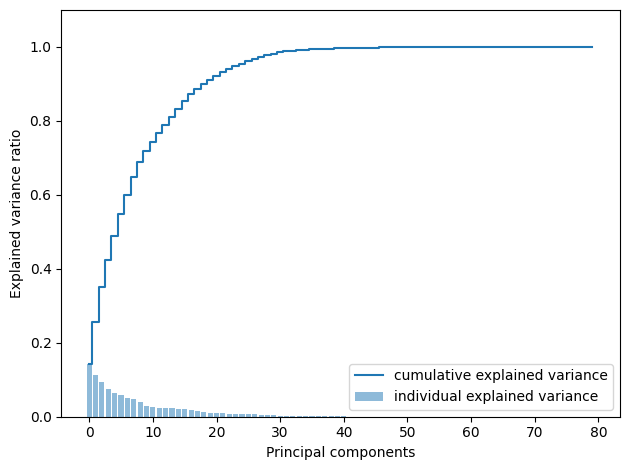

[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.26498535e-01 2.49853054e-01 2.38641446e-01
 2.38714434e-01 1.15195596e-01 2.49960913e-01 4.85542223e-02
 7.96969451e-02 7.58851815e-02 6.74271456e-02 7.58012123e-02
 2.28938734e-01 7.56637646e-02 3.34074000e-03 2.49791556e-01
 2.49677319e-01 1.62371976e-01 1.11262847e-04 1.97649439e-01
 7.88973370e-04 2.05738525e-01 1.15116555e-02 1.76789647e-04
 7.88612779e-03 2.041053

In [87]:
def PCA_analysis(data):

    pca = PCA()
    pca.fit(data)

    var_exp = pca.explained_variance_ratio_ 
    cum_var_exp = np.cumsum(var_exp)

    print('Variance Explained: ', var_exp)
    print('Cumulative Variance Explained: ', cum_var_exp)

    plt.bar(range(var_exp.shape[0]), var_exp, alpha = 0.5, 

    align = 'center', label = 'individual explained variance')

    plt.step(range(var_exp.shape[0]), cum_var_exp, 

    where = 'mid', label = 'cumulative explained variance')

    plt.ylabel('Explained variance ratio')

    plt.xlabel('Principal components')

    plt.ylim(0, 1.1)

    plt.legend(loc = 'best')

    plt.tight_layout()

    plt.show()

    selector = VarianceThreshold(threshold=0.90)

    selector.fit_transform(data)

    print(selector.variances_)
    print(selector.get_support())

PCA_analysis(X_train)

In [88]:
pca = PCA(random_state=0)
pca.fit(X_train)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [ ]:
pcanames = ['PC' + str(i+1) for i in range(pca.n_components_)]
Loadings = pd.DataFrame(pca.components_, columns= pcanames , index = col_names)

#Loadings.iloc[:,:1].sort_values()
Loadings["PC5"].abs().sort_values().plot.barh(figsize=(16, 12))

In [ ]:
dict = {}
for col in Loadings.columns:
    #print(col)
    for org_col in columuns_xtrain:
        #print(org_col)
        if(abs(Loadings[col][org_col]) < 0.02):
            if org_col not in dict:
                dict.update({org_col : 1})
            else:
                dict.update({org_col : dict[org_col] + 1 })

print(len(dict))
sorted_dict = sorted(dict.items(), key=lambda kv: kv[1])
sorted_dict

59


[('Duration', 7),
 ('Service', 8),
 ('Scr_bytes', 9),
 ('Des_bytes', 12),
 ('Protocol', 14),
 ('Conn_state', 14),
 ('FIN or RST', 15),
 ('paket_rate', 15),
 ('is_syn_only', 16),
 ('Scr_packts_ratio', 16),
 ('Des_pkts_ratio', 18),
 ('is_with_payload', 18),
 ('Bad_checksum', 19),
 ('Is_SYN_ACK', 19),
 ('byte_rate', 21),
 ('Std_user_time', 21),
 ('Std_nice_time', 21),
 ('anomaly_alert', 22),
 ('Avg_rtps', 23),
 ('Scr_bytes_ratio', 23),
 ('Std_tps', 23),
 ('Avg_system_time', 24),
 ('missed_bytes', 24),
 ('Std_rtps', 24),
 ('total_packet', 25),
 ('Avg_user_time', 28),
 ('Des_ip_bytes', 29),
 ('total_bytes', 29),
 ('Scr_pkts', 30),
 ('Std_system_time', 30),
 ('Des_bytes_ratio', 33),
 ('Std_ideal_time', 33),
 ('Avg_tps', 33),
 ('Avg_ldavg_1', 33),
 ('is_SYN_with_RST', 34),
 ('Avg_ideal_time', 34),
 ('Std_iowait_time', 34),
 ('Avg_wtps', 35),
 ('Avg_nice_time', 37),
 ('Avg_iowait_time', 38),
 ('Scr_ip_bytes', 39),
 ('Std_ldavg_1', 41),
 ('is_pure_ack', 42),
 ('Des_pkts', 43),
 ('Std_kbmemused'

In [89]:
pca = PCA(n_components=30, random_state=0)
pca.fit(X_train)

X_train = pd.DataFrame(pca.transform(X_train))
X_test = pd.DataFrame(pca.transform(X_test))

X_train

0         1         2         3         4         5         6   \
0      -0.717825 -0.755553  1.848644  2.887566 -1.625859  0.683355 -0.510888   
1      -0.005082 -0.250668 -0.135080 -0.789978  0.597486 -0.130827  0.471738   
2       1.442080 -0.823175  0.092044 -1.338384  0.359837  0.535118 -0.108802   
3      -0.117301 -0.502506 -1.635186 -1.109811  0.276943  0.127715  0.621576   
4       1.155708 -1.352612 -1.235090  3.607279 -0.008751 -0.166677 -0.255709   
...          ...       ...       ...       ...       ...       ...       ...   
656026  1.576343 -1.032206 -1.603566 -1.221294  0.112300  0.439499 -0.259714   
656027  0.305076 -0.110907 -0.608761 -0.091225 -0.477908 -0.929539  1.392302   
656028 -0.238128 -0.361327  2.684718  3.256058 -1.724383  0.327083 -0.082428   
656029  0.743018  0.194241 -1.125946 -0.296299 -0.177702 -0.527486  0.977828   
656030 -3.386055  1.499619  1.437005  0.283818 -2.037269 -1.474256  3.328693   

              7         8         9   ...        20        21        22  \
0       1.036504 -0.900198  2.464651  ... -1.006414  0.430600  0.231940   
1      -0.286856  0.203707 -0.280681  ... -0.050329  0.344706 -1.563743   
2       0.324218  0.464181  0.292065  ...  0.135627 -0.192965  0.086034   
3       0.176278 -1.301711 -0.879355  ...  0.358043  0.377906  0.499272   
4       0.116230 -0.454591 -0.640920  ... -0.095469 -0.555978  0.231526   
...          ...       ...       ...  ...       ...       ...       ...   
656026  0.182147  0.633331 -0.026462  ...  0.922011 -0.209796 -0.297173   
656027 -1.961644 -1.511400  0.529941  ...  0.985022  0.129641  0.367471   
656028  0.256934 -0.600428 -1.169715  ... -0.440756 -0.674628 -1.002202   
656029 -1.274421 -0.650768 -0.019344  ...  0.338079  0.056157 -1.676029   
656030 -2.871390 -4.551327  0.003163  ...  1.532825  0.343664  0.041713   

              23        24        25        26        27        28        29  
0       0.802798  0.278142 -0.435294  0.360770  0.140456 -0.749785  0.105376  
1      -0.915527  1.297553 -0.165310  1.371613  0.021175 -0.007168 -0.793124  
2       0.028772  0.263980  0.190982 -0.275558 -0.212104 -0.176017  0.137451  
3      -0.336166  0.885303  0.067758  0.722933  0.423102 -0.115216 -0.794348  
4       0.371610 -0.356591  0.651807 -0.319665  0.125911  0.104090 -0.165585  
...          ...       ...       ...       ...       ...       ...       ...  
656026  0.280509  0.144456  0.166970 -0.256790 -0.472653  0.216945  0.096449  
656027 -0.179913  0.952605 -0.123198  0.207363 -0.452080  0.306891 -0.063584  
656028  0.266431 -0.023026 -0.434473  0.777820  0.451387 -0.295076  0.371425  
656029 -0.194612  0.776444 -0.421520  0.771393 -0.360918 -0.093112 -0.532796  
656030 -0.514213  0.524704  0.040746  0.432599 -0.198480  0.053005  0.185855  

[656031 rows x 30 columns]

# Models

In [90]:
def eval_metrics(model, x , y):
  yhat = (model.predict(x))
  accuracy = metrics.accuracy_score(y, yhat)
  confusion_matrix = metrics.confusion_matrix(y, yhat)
  classification = metrics.classification_report(y, yhat, output_dict=True)
  matcor = matthews_corrcoef(y, yhat)
  print()
  print("Model Accuracy:" "\n", accuracy)
  print()
  print("Confusion matrix:" "\n", confusion_matrix)
  sns.heatmap(pd.DataFrame(classification).iloc[:-1, :].T, annot=True)
  print()
  print("Classification report:" "\n", classification)
  print()
  print("MCC:", matcor)
  print()
  return(classification)

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay 

In [36]:
def eval_metrics(model, x , y, labels, title):
  yhat = (model.predict(x))
  accuracy = metrics.accuracy_score(y, yhat)
  confusion_matrix = metrics.confusion_matrix(y, yhat)
  classification = metrics.classification_report(y, yhat, output_dict=True)
  matcor = matthews_corrcoef(y, yhat)
  print()
  print("Model Accuracy:" "\n", accuracy)
  print()
  print("Confusion matrix:" "\n", confusion_matrix)
  disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = labels) 
  fig, ax = plt.subplots(figsize=(12,12))
  ax.set_title(title); 
  # Then just plot it: 
  disp.plot(xticks_rotation  = 90, ax=ax, cmap=plt.cm.Greens) 
  # And show it: 
  plt.show()
  sns.heatmap(pd.DataFrame(classification).iloc[:-1, :].T, annot=True)
  print()
  print("Classification report:" "\n", classification)
  print()
  print("MCC:", matcor)
  print()
  return(classification)


1. Split your dataset into training and test subsets. 
2. Perform a GridSearchCV on your training dataset. 
3. Evaluate your best model (from the GridSearchCV) on your test subset.


## Binary Classification

In [91]:
y_train.value_counts()

class1
0     336660
1     113009
2      42282
3      40222
4      37793
5      18819
6      18518
7      17707
8      13954
9       4762
10      4075
11      2247
12      2058
13      1695
14      1050
15       813
16       367
Name: count, dtype: int64

In [92]:
type(y_train)

pandas.core.series.Series

In [93]:
class3_target = y_train.copy(deep=True)

In [94]:
print(class3_target)

646111    0
100103    0
600479    0
234552    0
769972    0
         ..
370219    0
268734    4
400625    0
595620    7
252982    2
Name: class1, Length: 656031, dtype: int64


In [95]:
class3_target = class3_target.replace({2:1 , 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1})

In [96]:
print(class3_target)

646111    0
100103    0
600479    0
234552    0
769972    0
         ..
370219    0
268734    1
400625    0
595620    1
252982    1
Name: class1, Length: 656031, dtype: int64


In [97]:
class3_target.value_counts()

class1
0    336660
1    319371
Name: count, dtype: int64

In [98]:
class3_test = y_test.copy(deep=True)
class3_test = y_test.replace({2:1 , 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1})
class3_test.value_counts()

class1
0    84165
1    79843
Name: count, dtype: int64

### DT

In [86]:
dt=DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5,6,7,8,9,10,12,14,15,20,30,40,50],
                 'criterion':['gini','entropy'],
                 }

grid_search = GridSearchCV(dt, param_grid = parameter_grid, 
                          cv =7, verbose = 2)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))



Fitting 7 folds for each of 34 candidates, totalling 238 fits
[CV] END ........................criterion=gini, max_depth=1; total time=   6.3s
[CV] END ........................criterion=gini, max_depth=1; total time=   6.9s
[CV] END ........................criterion=gini, max_depth=1; total time=  10.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   6.8s
[CV] END ........................criterion=gini, max_depth=1; total time=   7.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   7.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   7.2s
[CV] END ........................criterion=gini, max_depth=2; total time=  15.0s
[CV] END ........................criterion=gini, max_depth=2; total time=  12.6s
[CV] END ........................criterion=gini, max_depth=2; total time=  12.6s
[CV] END ........................criterion=gini, max_depth=2; total time=  12.8s
[CV] END ........................criterion=gini

In [39]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 40)
dt.fit(X_train, class3_target)

eval_metrics(dt, X_train , class3_target)
eval_metrics(dt, X_test , class3_test)


Model Accuracy:
 0.9999009193163128

Confusion matrix:
 [[336640     20]
 [    45 319326]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    336660
           1       1.00      1.00      1.00    319371

    accuracy                           1.00    656031
   macro avg       1.00      1.00      1.00    656031
weighted avg       1.00      1.00      1.00    656031


MCC: 0.9998017034172795


Model Accuracy:
 0.9693978342519877

Confusion matrix:
 [[81449  2716]
 [ 2303 77540]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     84165
           1       0.97      0.97      0.97     79843

    accuracy                           0.97    164008
   macro avg       0.97      0.97      0.97    164008
weighted avg       0.97      0.97      0.97    164008


MCC: 0.9387731883112146




Model Accuracy:
 0.9688429832691088

Confusion matrix:
 [[81412  2753]
 [ 2357 77486]]

Classification report:
 {'0': {'precision': 0.9718630997146916, 'recall': 0.9672904413948791, 'f1-score': 0.9695713792323176, 'support': 84165.0}, '1': {'precision': 0.965690001121649, 'recall': 0.9704795661485666, 'f1-score': 0.9680788595844628, 'support': 79843.0}, 'accuracy': 0.9688429832691088, 'macro avg': {'precision': 0.9687765504181703, 'recall': 0.9688850037717228, 'f1-score': 0.9688251194083902, 'support': 164008.0}, 'weighted avg': {'precision': 0.9688578883166847, 'recall': 0.9688429832691088, 'f1-score': 0.9688447851256662, 'support': 164008.0}}

MCC: 0.9376615479178381



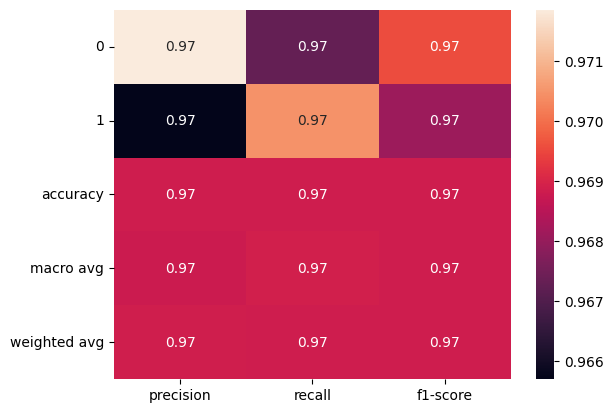

In [60]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 40)
dt.fit(X_train, class3_target)
classificationdt = eval_metrics(dt, X_test , class3_test)

In [61]:
classificationdt

{'0': {'precision': 0.9718630997146916,
  'recall': 0.9672904413948791,
  'f1-score': 0.9695713792323176,
  'support': 84165.0},
 '1': {'precision': 0.965690001121649,
  'recall': 0.9704795661485666,
  'f1-score': 0.9680788595844628,
  'support': 79843.0},
 'accuracy': 0.9688429832691088,
 'macro avg': {'precision': 0.9687765504181703,
  'recall': 0.9688850037717228,
  'f1-score': 0.9688251194083902,
  'support': 164008.0},
 'weighted avg': {'precision': 0.9688578883166847,
  'recall': 0.9688429832691088,
  'f1-score': 0.9688447851256662,
  'support': 164008.0}}

In [90]:
dt=DecisionTreeClassifier()

parameter_grid = {'max_depth': [15,20,30,40,50],
                 'criterion':['gini','entropy'],
                 }

grid_search = GridSearchCV(dt, param_grid = parameter_grid, 
                          cv =7, verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))



Fitting 7 folds for each of 10 candidates, totalling 70 fits
[CV 1/7] END ......criterion=gini, max_depth=15;, score=0.975 total time= 1.7min
[CV 2/7] END ......criterion=gini, max_depth=15;, score=0.975 total time= 2.2min
[CV 3/7] END ......criterion=gini, max_depth=15;, score=0.975 total time= 2.3min
[CV 4/7] END ......criterion=gini, max_depth=15;, score=0.976 total time= 2.4min
[CV 5/7] END ......criterion=gini, max_depth=15;, score=0.976 total time= 2.2min
[CV 6/7] END ......criterion=gini, max_depth=15;, score=0.977 total time= 2.1min
[CV 7/7] END ......criterion=gini, max_depth=15;, score=0.975 total time= 2.1min
[CV 1/7] END ......criterion=gini, max_depth=20;, score=0.979 total time= 2.8min
[CV 2/7] END ......criterion=gini, max_depth=20;, score=0.978 total time= 3.1min
[CV 3/7] END ......criterion=gini, max_depth=20;, score=0.979 total time= 2.8min
[CV 4/7] END ......criterion=gini, max_depth=20;, score=0.980 total time= 2.8min
[CV 5/7] END ......criterion=gini, max_depth=20;

### Naive Bayes

In [101]:
gnb_clf = GaussianNB()

parameter_grid = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
                 }

grid_search = GridSearchCV(gnb_clf, param_grid = parameter_grid, 
                          cv =7, verbose = 2)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 14 candidates, totalling 98 fits
[CV] END .................................var_smoothing=0.01; total time=   0.3s
[CV] END .................................var_smoothing=0.01; total time=   0.3s
[CV] END .................................var_smoothing=0.01; total time=   0.3s
[CV] END .................................var_smoothing=0.01; total time=   0.3s
[CV] END .................................var_smoothing=0.01; total time=   0.4s
[CV] END .................................var_smoothing=0.01; total time=   0.3s
[CV] END .................................var_smoothing=0.01; total time=   0.3s
[CV] END ................................var_smoothing=0.001; total time=   0.3s
[CV] END ................................var_smoothing=0.001; total time=   0.3s
[CV] END ................................var_smoothing=0.001; total time=   0.3s
[CV] END ................................var_smoothing=0.001; total time=   0.3s
[CV] END ................................var_smo

In [52]:
gnb = GaussianNB(var_smoothing= 1e-7)
gnb.fit(X_train, class3_target)
eval_metrics(gnb, X_train , class3_target)
eval_metrics(gnb, X_test , class3_test)


Model Accuracy:
 0.8043049794902984

Confusion matrix:
 [[254387  82273]
 [ 46109 273262]]

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80    336660
           1       0.77      0.86      0.81    319371

    accuracy                           0.80    656031
   macro avg       0.81      0.81      0.80    656031
weighted avg       0.81      0.80      0.80    656031


MCC: 0.6131950596403083


Model Accuracy:
 0.8039120042924736

Confusion matrix:
 [[63518 20647]
 [11513 68330]]

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80     84165
           1       0.77      0.86      0.81     79843

    accuracy                           0.80    164008
   macro avg       0.81      0.81      0.80    164008
weighted avg       0.81      0.80      0.80    164008


MCC: 0.6124950993514726




Model Accuracy:
 0.8039120042924736

Confusion matrix:
 [[63518 20647]
 [11513 68330]]

Classification report:
 {'0': {'precision': 0.8465567565406299, 'recall': 0.7546842511732905, 'f1-score': 0.7979848739918087, 'support': 84165.0}, '1': {'precision': 0.7679512683052924, 'recall': 0.8558045163633631, 'f1-score': 0.8095012439284445, 'support': 79843.0}, 'accuracy': 0.8039120042924736, 'macro avg': {'precision': 0.8072540124229611, 'recall': 0.8052443837683267, 'f1-score': 0.8037430589601267, 'support': 164008.0}, 'weighted avg': {'precision': 0.8082897329980341, 'recall': 0.8039120042924736, 'f1-score': 0.8035913171217219, 'support': 164008.0}}

MCC: 0.6124950993514726



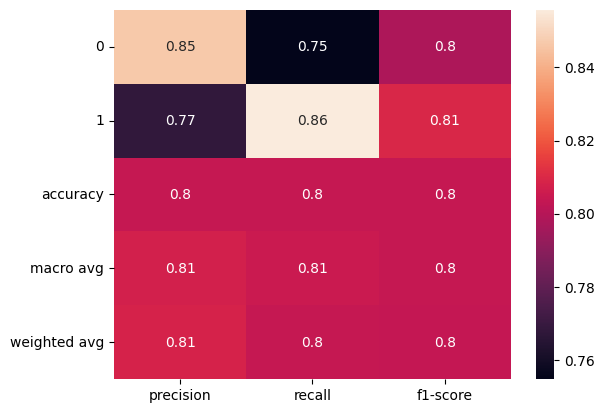

In [59]:
gnb = GaussianNB(var_smoothing= 1e-7)
gnb.fit(X_train, class3_target)
classificationgnb = eval_metrics(gnb, X_test , class3_test)

In [58]:
classification

{'0': {'precision': 0.8465567565406299,
  'recall': 0.7546842511732905,
  'f1-score': 0.7979848739918087,
  'support': 84165.0},
 '1': {'precision': 0.7679512683052924,
  'recall': 0.8558045163633631,
  'f1-score': 0.8095012439284445,
  'support': 79843.0},
 'accuracy': 0.8039120042924736,
 'macro avg': {'precision': 0.8072540124229611,
  'recall': 0.8052443837683267,
  'f1-score': 0.8037430589601267,
  'support': 164008.0},
 'weighted avg': {'precision': 0.8082897329980341,
  'recall': 0.8039120042924736,
  'f1-score': 0.8035913171217219,
  'support': 164008.0}}

### K-nearest neighbor

In [103]:
knn = KNeighborsClassifier()

k_range = list(range(1, 20))
weight_options = ['uniform', 'distance']
parameter_grid = dict(n_neighbors=k_range, weights=weight_options)


grid_search = GridSearchCV(knn, param_grid = parameter_grid,
                          cv =5, verbose = 2)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 38 candidates, totalling 190 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time= 1.3min
[CV] END .....................n_neighbors=1, weights=uniform; total time= 1.4min
[CV] END .....................n_neighbors=1, weights=uniform; total time= 1.3min
[CV] END .....................n_neighbors=1, weights=uniform; total time= 1.3min
[CV] END .....................n_neighbors=1, weights=uniform; total time= 2.2min
[CV] END ....................n_neighbors=1, weights=distance; total time= 1.3min
[CV] END ....................n_neighbors=1, weights=distance; total time= 1.6min
[CV] END ....................n_neighbors=1, weights=distance; total time= 3.0min
[CV] END ....................n_neighbors=1, weights=distance; total time= 2.3min
[CV] END ....................n_neighbors=1, weights=distance; total time= 2.3min
[CV] END .....................n_neighbors=2, weights=uniform; total time= 2.7min
[CV] END .....................n_neighbors=2, we

In [41]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, class3_target)
eval_metrics(knn, X_test , class3_test)


Model Accuracy:
 0.9664772450124384

Confusion matrix:
 [[81723  2442]
 [ 3056 76787]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     84165
           1       0.97      0.96      0.97     79843

    accuracy                           0.97    164008
   macro avg       0.97      0.97      0.97    164008
weighted avg       0.97      0.97      0.97    164008


MCC: 0.9329208458578099



In [51]:
eval_metrics(knn, X_train , class3_target)


Model Accuracy:
 0.9999878169549697

Confusion matrix:
 [[294978      2]
 [     5 279584]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    294980
           1       1.00      1.00      1.00    279589

    accuracy                           1.00    574569
   macro avg       1.00      1.00      1.00    574569
weighted avg       1.00      1.00      1.00    574569


MCC: 0.9999756164613883




Model Accuracy:
 0.9660199502463295

Confusion matrix:
 [[81618  2547]
 [ 3026 76817]]

Classification report:
 {'0': {'precision': 0.964250271726289, 'recall': 0.9697380146141508, 'f1-score': 0.966986357362463, 'support': 84165.0}, '1': {'precision': 0.9679073635401442, 'recall': 0.9621006224716006, 'f1-score': 0.9649952577462048, 'support': 79843.0}, 'accuracy': 0.9660199502463295, 'macro avg': {'precision': 0.9660788176332166, 'recall': 0.9659193185428756, 'f1-score': 0.9659908075543339, 'support': 164008.0}, 'weighted avg': {'precision': 0.9660306311093291, 'recall': 0.9660199502463295, 'f1-score': 0.9660170426542724, 'support': 164008.0}}

MCC: 0.9319981225280177



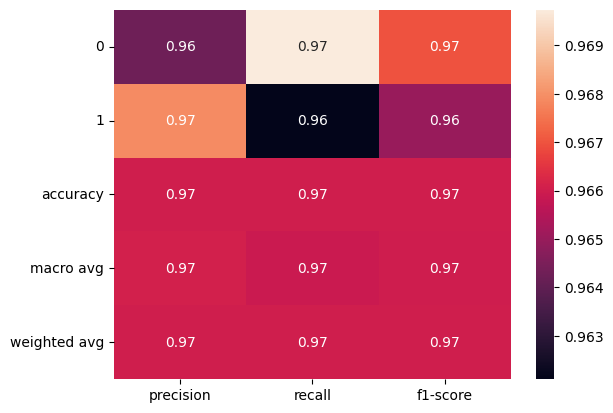

In [62]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, class3_target)
classificationknn = eval_metrics(knn, X_test , class3_test)

In [63]:
classificationknn

{'0': {'precision': 0.964250271726289,
  'recall': 0.9697380146141508,
  'f1-score': 0.966986357362463,
  'support': 84165.0},
 '1': {'precision': 0.9679073635401442,
  'recall': 0.9621006224716006,
  'f1-score': 0.9649952577462048,
  'support': 79843.0},
 'accuracy': 0.9660199502463295,
 'macro avg': {'precision': 0.9660788176332166,
  'recall': 0.9659193185428756,
  'f1-score': 0.9659908075543339,
  'support': 164008.0},
 'weighted avg': {'precision': 0.9660306311093291,
  'recall': 0.9660199502463295,
  'f1-score': 0.9660170426542724,
  'support': 164008.0}}

### Suport Vector Machine

In [ ]:
svc=svm.SVC()

parameter_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']}

grid_search = GridSearchCV(svc, param_grid = parameter_grid,
                          cv =7, verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

In [104]:
svc=svm.LinearSVC()

parameter_grid = {'C': [0.1, 1, 10, 100],
              'loss': ['hinge','squared_hinge']}

grid_search = GridSearchCV(svc, param_grid = parameter_grid,
                          cv =7, verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 6 candidates, totalling 42 fits
[CV 1/7] END .................C=0.1, loss=hinge;, score=0.916 total time= 2.1min
[CV 2/7] END .................C=0.1, loss=hinge;, score=0.913 total time= 1.8min
[CV 3/7] END .................C=0.1, loss=hinge;, score=0.915 total time= 2.1min
[CV 4/7] END .................C=0.1, loss=hinge;, score=0.914 total time= 2.1min
[CV 5/7] END .................C=0.1, loss=hinge;, score=0.916 total time= 2.0min
[CV 6/7] END .................C=0.1, loss=hinge;, score=0.915 total time= 2.0min
[CV 7/7] END .................C=0.1, loss=hinge;, score=0.914 total time= 1.9min
[CV 1/7] END .........C=0.1, loss=squared_hinge;, score=0.912 total time= 7.1min
[CV 2/7] END .........C=0.1, loss=squared_hinge;, score=0.909 total time= 6.9min
[CV 3/7] END .........C=0.1, loss=squared_hinge;, score=0.909 total time= 7.0min
[CV 4/7] END .........C=0.1, loss=squared_hinge;, score=0.911 total time= 7.1min
[CV 5/7] END .........C=0.1, loss=squared_hinge;,

In [42]:
svc=svm.LinearSVC(C = 1, loss = 'hinge', penalty ='l2')
svc.fit(X_train, class3_target)
eval_metrics(svc, X_test, class3_test)



Model Accuracy:
 0.9156992341836984

Confusion matrix:
 [[77939  6226]
 [ 7600 72243]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     84165
           1       0.92      0.90      0.91     79843

    accuracy                           0.92    164008
   macro avg       0.92      0.92      0.92    164008
weighted avg       0.92      0.92      0.92    164008


MCC: 0.831323687533099



In [55]:
eval_metrics(svc, X_train , class3_target)


Model Accuracy:
 0.928734407877905

Confusion matrix:
 [[280036  14944]
 [ 26003 253586]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93    294980
           1       0.94      0.91      0.93    279589

    accuracy                           0.93    574569
   macro avg       0.93      0.93      0.93    574569
weighted avg       0.93      0.93      0.93    574569


MCC: 0.8578572118575332




Model Accuracy:
 0.9149980488756646

Confusion matrix:
 [[78032  6133]
 [ 7808 72035]]

Classification report:
 {'0': {'precision': 0.909040074557316, 'recall': 0.9271312303213926, 'f1-score': 0.9179965295138379, 'support': 84165.0}, '1': {'precision': 0.9215407839525125, 'recall': 0.902208083363601, 'f1-score': 0.9117719652429261, 'support': 79843.0}, 'accuracy': 0.9149980488756646, 'macro avg': {'precision': 0.9152904292549142, 'recall': 0.9146696568424968, 'f1-score': 0.914884247378382, 'support': 164008.0}, 'weighted avg': {'precision': 0.9151257175761971, 'recall': 0.9149980488756646, 'f1-score': 0.914966263398268, 'support': 164008.0}}

MCC: 0.8299598539426072



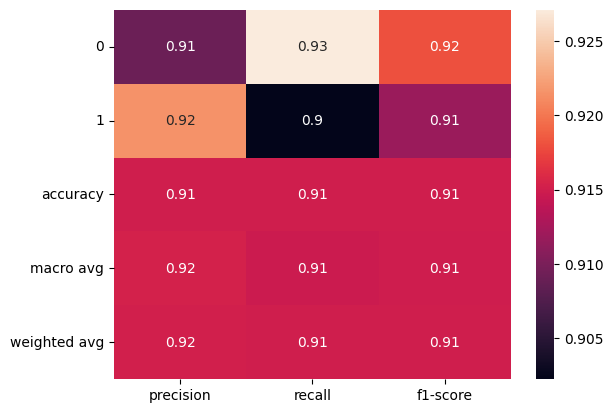

In [64]:
svc=svm.LinearSVC(C = 1, loss = 'hinge', penalty ='l2')
svc.fit(X_train, class3_target)
classificationsvm = eval_metrics(svc, X_test , class3_test)

In [65]:
classificationsvm

{'0': {'precision': 0.909040074557316,
  'recall': 0.9271312303213926,
  'f1-score': 0.9179965295138379,
  'support': 84165.0},
 '1': {'precision': 0.9215407839525125,
  'recall': 0.902208083363601,
  'f1-score': 0.9117719652429261,
  'support': 79843.0},
 'accuracy': 0.9149980488756646,
 'macro avg': {'precision': 0.9152904292549142,
  'recall': 0.9146696568424968,
  'f1-score': 0.914884247378382,
  'support': 164008.0},
 'weighted avg': {'precision': 0.9151257175761971,
  'recall': 0.9149980488756646,
  'f1-score': 0.914966263398268,
  'support': 164008.0}}

### Logistic Regression

In [40]:
clf = LogisticRegression()

parameter_grid = {'C':[1, 10, 100, 1000]}

grid_search = GridSearchCV(clf, param_grid = parameter_grid,
                          cv =7, verbose = 2)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

ValueError: Found input variables with inconsistent numbers of samples: [656031, 820039]

In [43]:
clf = LogisticRegression( C = 1000, penalty = 'l2')
clf.fit(X_train, class3_target)
eval_metrics(clf, X_test , class3_test)


Model Accuracy:
 0.9172052582800839

Confusion matrix:
 [[78864  5301]
 [ 8278 71565]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92     84165
           1       0.93      0.90      0.91     79843

    accuracy                           0.92    164008
   macro avg       0.92      0.92      0.92    164008
weighted avg       0.92      0.92      0.92    164008


MCC: 0.8346886841593696



In [57]:
eval_metrics(clf, X_train , class3_target)


Model Accuracy:
 0.9227943032081438

Confusion matrix:
 [[278276  16704]
 [ 27656 251933]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93    294980
           1       0.94      0.90      0.92    279589

    accuracy                           0.92    574569
   macro avg       0.92      0.92      0.92    574569
weighted avg       0.92      0.92      0.92    574569


MCC: 0.8459367369163572




Model Accuracy:
 0.9167784498317155

Confusion matrix:
 [[78810  5355]
 [ 8294 71549]]

Classification report:
 {'0': {'precision': 0.9047804922850845, 'recall': 0.9363749777223311, 'f1-score': 0.9203066521086711, 'support': 84165.0}, '1': {'precision': 0.930367731197337, 'recall': 0.8961211377328007, 'f1-score': 0.912923373334099, 'support': 79843.0}, 'accuracy': 0.9167784498317155, 'macro avg': {'precision': 0.9175741117412107, 'recall': 0.9162480577275659, 'f1-score': 0.916615012721385, 'support': 164008.0}, 'weighted avg': {'precision': 0.9172369695085796, 'recall': 0.9167784498317155, 'f1-score': 0.9167122961797033, 'support': 164008.0}}

MCC: 0.8338211150350956



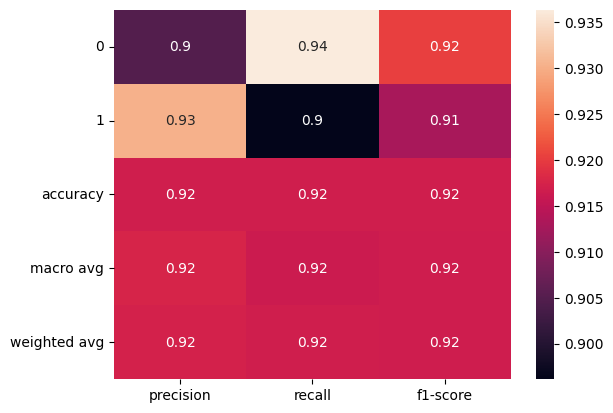

In [66]:
clf = LogisticRegression( C = 1000, penalty = 'l2')
clf.fit(X_train, class3_target)
classificationclf = eval_metrics(clf, X_test , class3_test)

In [67]:
classificationclf

{'0': {'precision': 0.9047804922850845,
  'recall': 0.9363749777223311,
  'f1-score': 0.9203066521086711,
  'support': 84165.0},
 '1': {'precision': 0.930367731197337,
  'recall': 0.8961211377328007,
  'f1-score': 0.912923373334099,
  'support': 79843.0},
 'accuracy': 0.9167784498317155,
 'macro avg': {'precision': 0.9175741117412107,
  'recall': 0.9162480577275659,
  'f1-score': 0.916615012721385,
  'support': 164008.0},
 'weighted avg': {'precision': 0.9172369695085796,
  'recall': 0.9167784498317155,
  'f1-score': 0.9167122961797033,
  'support': 164008.0}}

In [89]:
clf = LogisticRegression()

parameter_grid = {'C':[1, 10, 100, 1000]}

grid_search = GridSearchCV(clf, param_grid = parameter_grid,
                          cv =7, verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 4 candidates, totalling 28 fits
[CV 1/7] END ...............................C=1;, score=0.934 total time=   3.3s
[CV 2/7] END ...............................C=1;, score=0.933 total time=   3.3s
[CV 3/7] END ...............................C=1;, score=0.935 total time=   3.2s
[CV 4/7] END ...............................C=1;, score=0.935 total time=   3.3s
[CV 5/7] END ...............................C=1;, score=0.934 total time=   3.2s
[CV 6/7] END ...............................C=1;, score=0.936 total time=   3.3s
[CV 7/7] END ...............................C=1;, score=0.934 total time=   3.5s
[CV 1/7] END ..............................C=10;, score=0.934 total time=   3.4s
[CV 2/7] END ..............................C=10;, score=0.933 total time=   3.5s
[CV 3/7] END ..............................C=10;, score=0.935 total time=   3.5s
[CV 4/7] END ..............................C=10;, score=0.933 total time=   3.6s
[CV 5/7] END ..............................C=10;,

### XGB

In [99]:
xgb_model = xgb.XGBClassifier()

params = { 
    'model__max_depth': [3,4],
    'model__learning_rate': [ 0.01, 0.1, 1 ],
    "model__gamma":[0, 0.25, 0.5, 0.75, 1],
    'model__n_estimators': [50 ,100, 300, 500],
    #"model__subsample":[0.9],
    #"model__colsample_bytree":[0.5],
    #"model__early_stopping_rounds": [10], 
}


grid_search = GridSearchCV(xgb_model, param_grid = params, cv =StratifiedKFold(5), verbose = 3)
model = grid_search.fit(X_train, class3_target)
print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.970 total time=   4.4s
[CV 2/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.970 total time=   4.8s
[CV 3/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.971 total time=   6.6s
[CV 4/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.971 total time=   7.3s
[CV 5/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.970 total time=   7.3s
[CV 1/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.970 total time=   7.3s
[CV 2/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.970 total time=   7.3s
[CV 3/5] EN


Model Accuracy:
 0.970940441929662

Confusion matrix:
 [[83095  1070]
 [ 3696 76147]]

Classification report:
 {'0': {'precision': 0.957414939337028, 'recall': 0.9872868769678608, 'f1-score': 0.9721214815508084, 'support': 84165.0}, '1': {'precision': 0.9861429477964697, 'recall': 0.9537091542151472, 'f1-score': 0.9696549089519928, 'support': 79843.0}, 'accuracy': 0.970940441929662, 'macro avg': {'precision': 0.9717789435667489, 'recall': 0.970498015591504, 'f1-score': 0.9708881952514006, 'support': 164008.0}, 'weighted avg': {'precision': 0.971400417968724, 'recall': 0.970940441929662, 'f1-score': 0.970920695272046, 'support': 164008.0}}

MCC: 0.9422760885133644



{'0': {'precision': 0.957414939337028,
  'recall': 0.9872868769678608,
  'f1-score': 0.9721214815508084,
  'support': 84165.0},
 '1': {'precision': 0.9861429477964697,
  'recall': 0.9537091542151472,
  'f1-score': 0.9696549089519928,
  'support': 79843.0},
 'accuracy': 0.970940441929662,
 'macro avg': {'precision': 0.9717789435667489,
  'recall': 0.970498015591504,
  'f1-score': 0.9708881952514006,
  'support': 164008.0},
 'weighted avg': {'precision': 0.971400417968724,
  'recall': 0.970940441929662,
  'f1-score': 0.970920695272046,
  'support': 164008.0}}

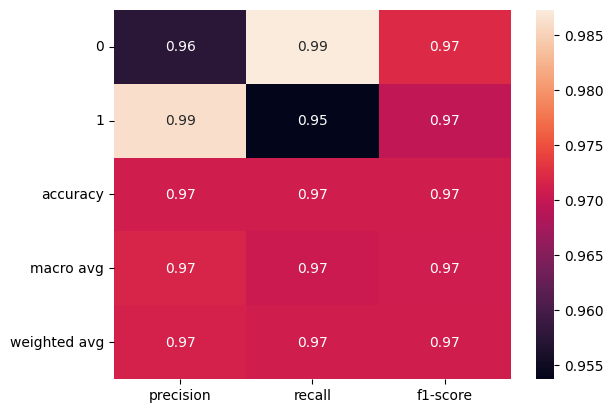

In [103]:
xgb_model = xgb.XGBClassifier(model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)
xgb_model.fit(X_train, class3_target)
eval_metrics(xgb_model, X_test, class3_test)

### RF

In [102]:
rfc=RandomForestClassifier()

parameter_grid = {
    'n_estimators': [200, 300],
    'max_depth' : [30, 40],
    'criterion' :['entropy']
}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.979 total time=65.4min
[CV 2/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.980 total time=63.7min
[CV 3/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.979 total time=63.6min
[CV 4/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.980 total time=64.0min
[CV 5/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.980 total time=64.1min
[CV 1/5] END criterion=entropy, max_depth=30, n_estimators=300;, score=0.979 total time=95.3min
[CV 2/5] END criterion=entropy, max_depth=30, n_estimators=300;, score=0.980 total time=95.7min
[CV 3/5] END criterion=entropy, max_depth=30, n_estimators=300;, score=0.979 total time=96.0min
[CV 4/5] END criterion=entropy, max_depth=30, n_estimators=300;, score=0.980 total time=91.7min
[CV 5/5] END criterion=entropy, max_depth=30, n_estimators=300;, score=0.979


Model Accuracy:
 0.9813118872250134

Confusion matrix:
 [[83596   569]
 [ 2496 77347]]

Classification report:
 {'0': {'precision': 0.9710077591413836, 'recall': 0.9932394700885167, 'f1-score': 0.9819978033208621, 'support': 84165.0}, '1': {'precision': 0.9926972637199035, 'recall': 0.9687386495998397, 'f1-score': 0.9805716314124708, 'support': 79843.0}, 'accuracy': 0.9813118872250134, 'macro avg': {'precision': 0.9818525114306436, 'recall': 0.9809890598441782, 'f1-score': 0.9812847173666664, 'support': 164008.0}, 'weighted avg': {'precision': 0.9815667264726283, 'recall': 0.9813118872250134, 'f1-score': 0.9813035088737517, 'support': 164008.0}}

MCC: 0.9628411841141431



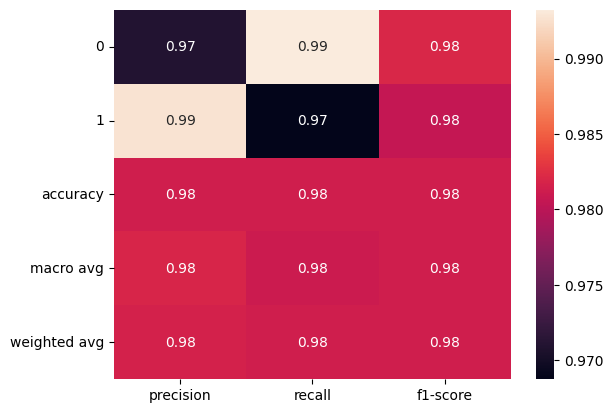

In [104]:
rfc=RandomForestClassifier(  criterion = 'entropy', max_depth =  40, n_estimators = 300)
rfc.fit(X_train, class3_target)
rf_results_9 = eval_metrics(rfc, X_test , class3_test)

### Graph Results F1-Score

In [75]:
r = [0,1]

l = []

for index in r:
    l1 = list()
    l1.append(str(index))
    l1.append(classificationdt[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationknn[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationsvm[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationclf[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationgnb[str(index)]['f1-score'])
    print(l1)
    l.append(l1)
print(l)



['0', 0.9695713792323176]
['0', 0.9695713792323176, 0.966986357362463]
['0', 0.9695713792323176, 0.966986357362463, 0.9179965295138379]
['0', 0.9695713792323176, 0.966986357362463, 0.9179965295138379, 0.9203066521086711]
['0', 0.9695713792323176, 0.966986357362463, 0.9179965295138379, 0.9203066521086711, 0.7979848739918087]
['1', 0.9680788595844628]
['1', 0.9680788595844628, 0.9649952577462048]
['1', 0.9680788595844628, 0.9649952577462048, 0.9117719652429261]
['1', 0.9680788595844628, 0.9649952577462048, 0.9117719652429261, 0.912923373334099]
['1', 0.9680788595844628, 0.9649952577462048, 0.9117719652429261, 0.912923373334099, 0.8095012439284445]
[['0', 0.9695713792323176, 0.966986357362463, 0.9179965295138379, 0.9203066521086711, 0.7979848739918087], ['1', 0.9680788595844628, 0.9649952577462048, 0.9117719652429261, 0.912923373334099, 0.8095012439284445]]


In [77]:
df = pd.DataFrame(l)
df.rename(columns = {0: "class", 1: "DT", 2: "KNN", 3: "SVM",4: "LR", 5: "NB"}, inplace = True)

df

class        DT       KNN       SVM        LR        NB
0     0  0.969571  0.966986  0.917997  0.920307  0.797985
1     1  0.968079  0.964995  0.911772  0.912923  0.809501

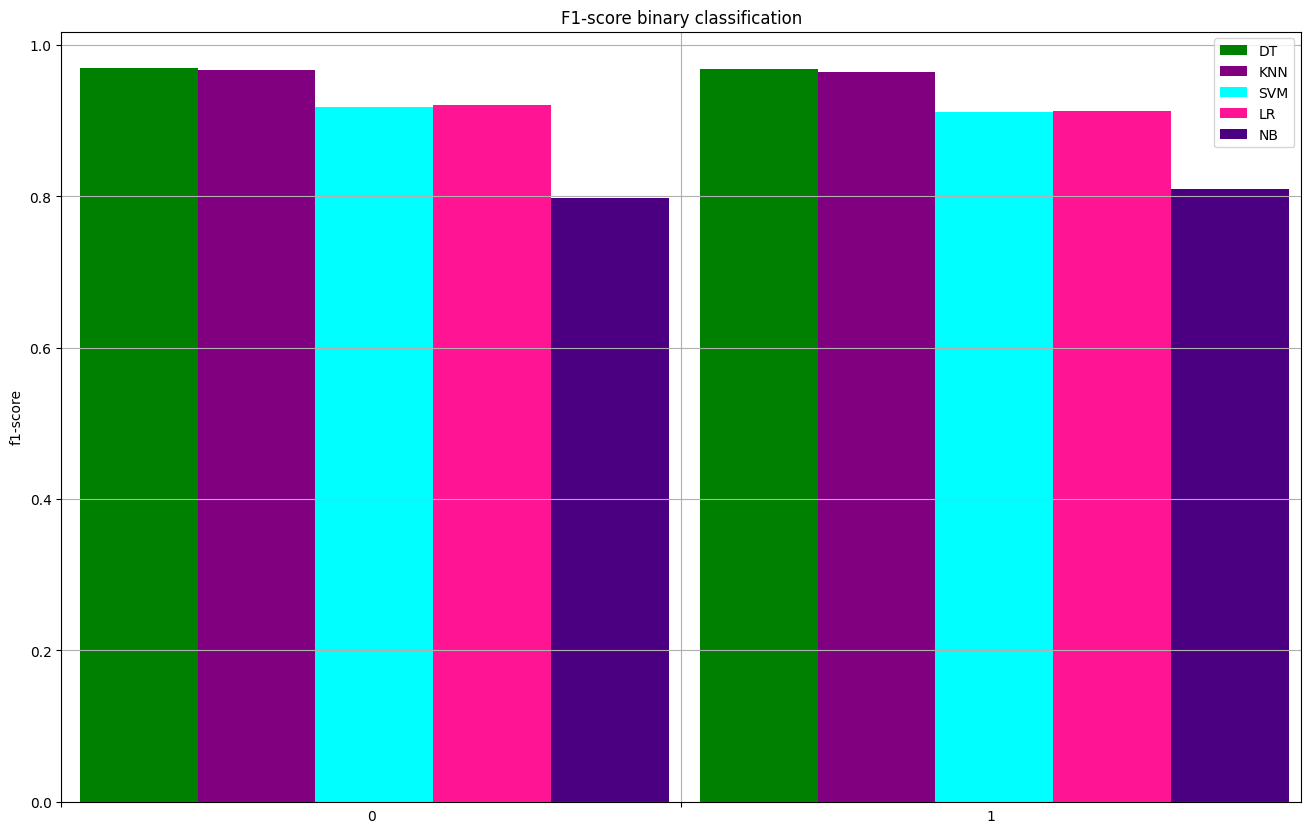

In [86]:
import matplotlib.ticker as ticker

pos = list(range(len(df)))
num_col = len(df.columns) - 1
width = 0.95 / num_col

fig, ax = plt.subplots(figsize=(16,10))

bar_colors = ['green', 'purple', 'cyan', 'deeppink', 'indigo']
bar_labels = df.columns[1:]

for i, (colname, color, lbl) in enumerate(zip(df.columns[1:], bar_colors, bar_labels)):
    delta_p = 0.125 + width*i
    plt.bar([p + delta_p for p in pos],
            df[colname], width, color=color, label=lbl)
ax.set_ylabel('f1-score')
ax.set_title('F1-score binary classification')
ax.set_xticks(pos)

def update_ticks(x, pos):
    return df['class'][pos]

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(ticker.FuncFormatter(update_ticks))
ax.xaxis.set_minor_locator(ticker.FixedLocator([p+0.5 for p in pos]))
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
plt.xlim(min(pos), max(pos)+1)
plt.legend()
plt.grid()
plt.show()

## Multiclass 9

In [40]:
class2_train = y_train.copy(deep=True)
class2_train = y_train.replace({1:9 , 2:1 , 3:1, 4:2, 5:4, 6:1, 7:6, 8:2, 9:4, 10:7, 11:5, 12:2, 13:4, 14:1, 15:3, 16:8})
class2_train.value_counts()

class1
0    336660
9    113009
1    102072
2     53805
4     25276
6     17707
7      4075
5      2247
3       813
8       367
Name: count, dtype: int64

In [41]:
class2_test = y_test.copy(deep=True)
class2_test = y_test.replace({1:9 , 2:1 , 3:1, 4:2, 5:4, 6:1, 7:6, 8:2, 9:4, 10:7, 11:5, 12:2, 13:4, 14:1, 15:3, 16:8})
class2_test.value_counts()

class1
0    84165
9    28252
1    25518
2    13451
4     6320
6     4427
7     1019
5      562
3      203
8       91
Name: count, dtype: int64

In [45]:
attacks_9 = attacks_9 = ["Normal", "Reconnaissance" , "Weaponization", "Exploitation", "Lateral Movement", "Comand and Control" , "Exfiltration", 
               "Tampering", "Crypto-ransomware", "RDOS"]

### DT

In [37]:
dt=DecisionTreeClassifier()

parameter_grid = {'max_depth': [15,20,30,40],
                 'criterion':['entropy'],
                 }

grid_search = GridSearchCV(dt, param_grid = parameter_grid, 
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...criterion=entropy, max_depth=15;, score=0.978 total time= 3.3min
[CV 2/5] END ...criterion=entropy, max_depth=15;, score=0.978 total time= 3.5min
[CV 3/5] END ...criterion=entropy, max_depth=15;, score=0.977 total time= 2.9min
[CV 4/5] END ...criterion=entropy, max_depth=15;, score=0.978 total time= 3.0min
[CV 5/5] END ...criterion=entropy, max_depth=15;, score=0.978 total time= 3.5min
[CV 1/5] END ...criterion=entropy, max_depth=20;, score=0.981 total time= 3.9min
[CV 2/5] END ...criterion=entropy, max_depth=20;, score=0.982 total time= 3.8min
[CV 3/5] END ...criterion=entropy, max_depth=20;, score=0.980 total time= 4.0min
[CV 4/5] END ...criterion=entropy, max_depth=20;, score=0.981 total time= 3.9min
[CV 5/5] END ...criterion=entropy, max_depth=20;, score=0.982 total time= 3.9min
[CV 1/5] END ...criterion=entropy, max_depth=30;, score=0.985 total time= 4.0min
[CV 2/5] END ...criterion=entropy, max_depth=30;,

KeyboardInterrupt: 

In [38]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 30)
dt.fit(X_train, class2_train)

eval_metrics(dt, X_train , class2_train)
eval_metrics(dt, X_test , class2_test)


Model Accuracy:
 0.9972028760835997

Confusion matrix:
 [[336296    356      0      0      0      4      0      1      0      3]
 [  1389 100681      0      0      0      2      0      0      0      0]
 [     0      0  53805      0      0      0      0      0      0      0]
 [     0      0      0    813      0      0      0      0      0      0]
 [     1      0      0      0  25274      0      0      1      0      0]
 [    77      0      0      0      0   2170      0      0      0      0]
 [     0      0      0      0      0      0  17707      0      0      0]
 [     0      0      0      0      1      0      0   4074      0      0]
 [     0      0      0      0      0      0      0      0    367      0]
 [     0      0      0      0      0      0      0      0      0 113009]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    336660
           1       1.00      0.99      0.99    102072
           2       1.00 


Model Accuracy:
 0.9654590019999024

Confusion matrix:
 [[81478  1012   180    37   767   147    91   422     6    25]
 [  907 24525    21     8    41     8     5     3     0     0]
 [   87    20 13272     0     9     0    57     0     6     0]
 [   46    18     1   123    15     0     0     0     0     0]
 [  724    88    15    12  5418     1    11    51     0     0]
 [  159    18     0     0     1   384     0     0     0     0]
 [   76     6    42     1    16     0  4278     6     2     0]
 [  421     1     1     1    48     1     1   545     0     0]
 [    8     1     4     0     0     0     2     0    76     0]
 [    7     0     1     0     0     0     0     0     0 28244]]

Classification report:
 {'0': {'precision': 0.9709818502496633, 'recall': 0.9680746153389176, 'f1-score': 0.9695260533799783, 'support': 84165.0}, '1': {'precision': 0.9546887772976761, 'recall': 0.9610862920291559, 'f1-score': 0.9578768527740349, 'support': 25518.0}, '2': {'precision': 0.9804240230479426, 're

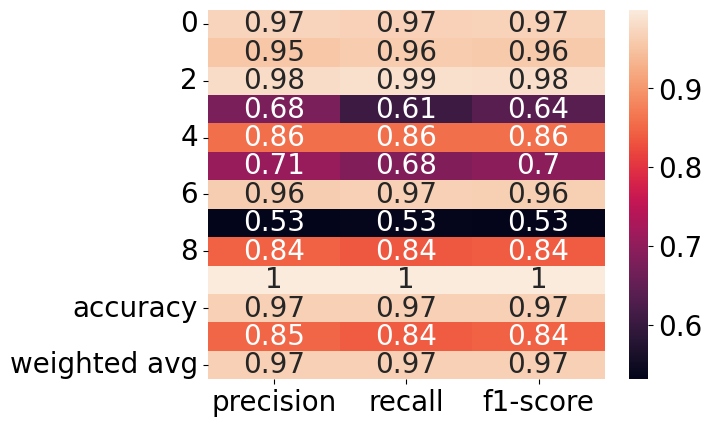

In [185]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 30)
dt.fit(X_train, class2_train)

classificationdt = eval_metrics(dt, X_test , class2_test)

### KNN

In [87]:
knn = KNeighborsClassifier()

k_range = [1,3,5,6,7,9,11,13,15,17,19,21]
weight_options = ['uniform', 'distance']
parameter_grid = dict(n_neighbors=k_range, weights=weight_options)


grid_search = GridSearchCV(knn, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.979 total time= 3.8min
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.979 total time= 3.8min
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.980 total time= 3.9min
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.979 total time= 3.8min
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.979 total time= 3.8min
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.979 total time= 3.7min
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.979 total time= 3.7min
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.980 total time= 3.7min
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.979 total time= 3.6min
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.979 total time= 3.7min
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.976 total time= 4.1min
[CV 2/5] END ....n_neighbors=3, weights=uniform

In [39]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, class2_train)
eval_metrics(knn, X_train , class2_train)
eval_metrics(knn, X_test , class2_test)


Model Accuracy:
 0.9999923784089472

Confusion matrix:
 [[336658      2      0      0      0      0      0      0      0      0]
 [     2 102070      0      0      0      0      0      0      0      0]
 [     0      0  53805      0      0      0      0      0      0      0]
 [     0      0      0    813      0      0      0      0      0      0]
 [     0      0      0      0  25276      0      0      0      0      0]
 [     1      0      0      0      0   2246      0      0      0      0]
 [     0      0      0      0      0      0  17707      0      0      0]
 [     0      0      0      0      0      0      0   4075      0      0]
 [     0      0      0      0      0      0      0      0    367      0]
 [     0      0      0      0      0      0      0      0      0 113009]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    336660
           1       1.00      1.00      1.00    102072
           2       1.00 


Model Accuracy:
 0.9644956343592995

Confusion matrix:
 [[81743   926   695     1   416    53   229    63     3    36]
 [  608 24898     3     0     5     2     2     0     0     0]
 [  127    12 13258     0     1     0    50     0     3     0]
 [   84    14     0    91    14     0     0     0     0     0]
 [ 1027    45    27     1  5203     0    16     1     0     0]
 [  212     5     0     0     0   344     1     0     0     0]
 [  172     2    60     0     2     0  4185     4     2     0]
 [  881     0     0     0     8     0     0   130     0     0]
 [    2     0     5     0     0     0     1     0    83     0]
 [    2     0     0     0     0     0     0     0     0 28250]]

Classification report:
 {'0': {'precision': 0.9632916165829974, 'recall': 0.9712231925384661, 'f1-score': 0.9672411446962839, 'support': 84165.0}, '1': {'precision': 0.9612385144004324, 'recall': 0.9757034250333099, 'f1-score': 0.9684169583819525, 'support': 25518.0}, '2': {'precision': 0.9437642369020501, 're

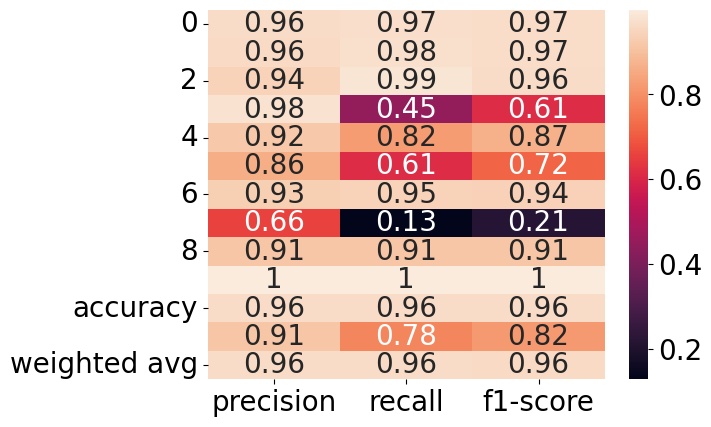

In [186]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, class2_train)

classificationknn = eval_metrics(knn, X_test , class2_test)

### LR

In [39]:
clf = LogisticRegression(multi_class="ovr")

parameter_grid = {'C':[1, 10, 100, 1000]}

grid_search = GridSearchCV(clf, param_grid = parameter_grid,
                          cv = StratifiedKFold(7), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 4 candidates, totalling 28 fits
[CV 1/7] END ...............................C=1;, score=0.917 total time=  43.7s
[CV 2/7] END ...............................C=1;, score=0.918 total time= 1.3min
[CV 3/7] END ...............................C=1;, score=0.918 total time= 1.4min
[CV 4/7] END ...............................C=1;, score=0.919 total time= 1.4min
[CV 5/7] END ...............................C=1;, score=0.917 total time= 1.3min
[CV 6/7] END ...............................C=1;, score=0.918 total time= 1.1min
[CV 7/7] END ...............................C=1;, score=0.919 total time= 1.1min
[CV 1/7] END ..............................C=10;, score=0.921 total time= 1.1min
[CV 2/7] END ..............................C=10;, score=0.921 total time= 1.1min
[CV 3/7] END ..............................C=10;, score=0.922 total time= 1.1min
[CV 4/7] END ..............................C=10;, score=0.920 total time= 1.0min
[CV 5/7] END ..............................C=10;,

In [49]:
clf = LogisticRegression( C = 1000, penalty = 'l2')
clf.fit(X_train, class2_train)
eval_metrics(clf, X_train , class2_train)
eval_metrics(clf, X_test , class2_test)


Model Accuracy:
 0.9318599273509941

Confusion matrix:
 [[326260   6201   1436     11   1644    258    560    112     17    161]
 [ 16140  82560   2775      0    395     18    181      1      0      2]
 [  2122    382  50342      0     66      0    868      0     25      0]
 [    66    160      1    525     60      1      0      0      0      0]
 [  4410   1743    170      9  18929      5      1      9      0      0]
 [  1104    187      0      0      0    956      0      0      0      0]
 [   779      4    789      0      0      0  16135      0      0      0]
 [  1584      2      0      0      6      3      0   2480      0      0]
 [    39     12     90      0      0      1      0      0    225      0]
 [    81     10      0      0      0      1      0      0      0 112917]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    336660
           1       0.90      0.81      0.85    102072
           2       0.91 

In [40]:
clf = LogisticRegression( C = 1000, penalty = 'l2')
clf.fit(X_train, class2_train)
classificationclf = eval_metrics(clf, X_test , class2_test)

KeyboardInterrupt: 


Model Accuracy:
 0.9313509097117214

Confusion matrix:
 [[81521  1567   361     1   434    72   138    26     3    42]
 [ 4119 20596   660     0   103     7    33     0     0     0]
 [  523    97 12581     0    16     0   229     0     5     0]
 [   17    38     0   132    16     0     0     0     0     0]
 [ 1110   438    29     2  4740     0     0     1     0     0]
 [  263    52     0     0     0   247     0     0     0     0]
 [  188     2   230     0     0     0  4007     0     0     0]
 [  366     0     0     0     2     1     0   650     0     0]
 [    9     1    27     0     0     0     0     0    54     0]
 [   29     1     0     0     0     1     0     0     0 28221]]

Classification report:
 {'0': {'precision': 0.9248510976232345, 'recall': 0.9685855165448821, 'f1-score': 0.946213220358656, 'support': 84165.0}, '1': {'precision': 0.9036504036504036, 'recall': 0.8071165451837918, 'f1-score': 0.8526599047816187, 'support': 25518.0}, '2': {'precision': 0.9058899769585254, 'rec

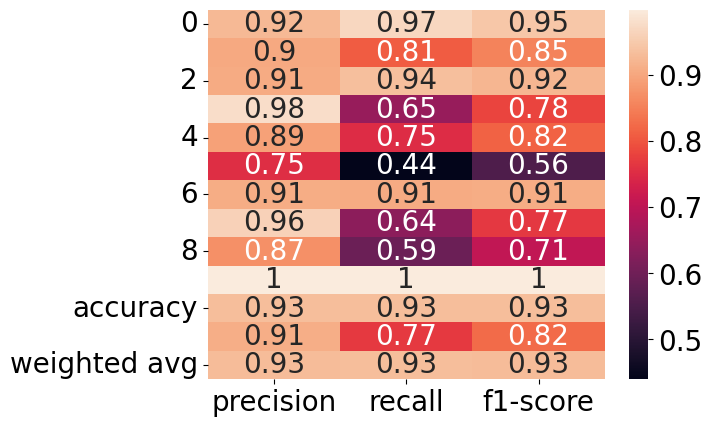

In [187]:
clf = LogisticRegression( C = 1000, penalty = 'l2')
clf.fit(X_train, class2_train)
classificationclf = eval_metrics(clf, X_test , class2_test)

### SVM

In [89]:
svc=svm.LinearSVC()

parameter_grid = {'C': [0.1, 1, 10, 100],
              'loss': ['hinge','squared_hinge']}

grid_search = GridSearchCV(svc, param_grid = parameter_grid,
                          cv =StratifiedKFold(7), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 8 candidates, totalling 56 fits
[CV 1/7] END .................C=0.1, loss=hinge;, score=0.959 total time= 5.0min
[CV 2/7] END .................C=0.1, loss=hinge;, score=0.961 total time= 7.7min
[CV 3/7] END .................C=0.1, loss=hinge;, score=0.960 total time= 8.1min
[CV 4/7] END .................C=0.1, loss=hinge;, score=0.960 total time= 7.6min
[CV 5/7] END .................C=0.1, loss=hinge;, score=0.959 total time= 7.2min
[CV 6/7] END .................C=0.1, loss=hinge;, score=0.961 total time= 7.7min
[CV 7/7] END .................C=0.1, loss=hinge;, score=0.959 total time= 7.4min
[CV 1/7] END .........C=0.1, loss=squared_hinge;, score=0.960 total time=14.7min
[CV 2/7] END .........C=0.1, loss=squared_hinge;, score=0.962 total time=14.7min
[CV 3/7] END .........C=0.1, loss=squared_hinge;, score=0.960 total time=15.2min
[CV 4/7] END .........C=0.1, loss=squared_hinge;, score=0.961 total time=15.4min
[CV 5/7] END .........C=0.1, loss=squared_hinge;,

In [45]:
svc=svm.LinearSVC(C = 10, loss = 'hinge', penalty ='l2')
svc.fit(X_train, class2_train)
eval_metrics(svc, X_train, class2_train)
eval_metrics(svc, X_test, class2_test)


Model Accuracy:
 0.9196562357571517

Confusion matrix:
 [[328376   4784    959     18   1450    595    109     49    136    184]
 [ 23632  76222   2062      1     60     20     75      0      0      0]
 [  1953     49  51556      0      7      0    237      0      3      0]
 [   449    188      0    155     21      0      0      0      0      0]
 [  6056   2372     10     11  12933      6   3849     20      7     12]
 [   561     98      0      0      1   1586      0      0      1      0]
 [   795      5    306      0      0      0  16600      0      1      0]
 [  1312      2      0      0      2     13      0   2734      0     12]
 [    11    108      0      0      0      6      0      0    242      0]
 [    90      0      0      0      0      0      0      0      0 112919]]

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94    336660
           1       0.91      0.75      0.82    102072
           2       0.94 


Model Accuracy:
 0.9238207892297937

Confusion matrix:
 [[81939  1309   228     1   444   135    36    11    25    37]
 [ 6024 18973   453     2    30     7    28     0     0     1]
 [  486    14 12819     0     2     0   129     0     1     0]
 [  114    46     0    38     5     0     0     0     0     0]
 [ 1512   573     2     3  4219     0     3     8     0     0]
 [  172    13     0     0     2   375     0     0     0     0]
 [  179     2    45     0     0     0  4200     0     1     0]
 [  320     0     0     0     2     2     0   695     0     0]
 [    6    15     0     0     0     2     0     0    68     0]
 [   64     0     0     0     0     0     0     0     0 28188]]

Classification report:
 {'0': {'precision': 0.9022529069767442, 'recall': 0.9735519515237926, 'f1-score': 0.9365473965744852, 'support': 84165.0}, '1': {'precision': 0.9058486512294104, 'recall': 0.7435143820048593, 'f1-score': 0.8166928523771603, 'support': 25518.0}, '2': {'precision': 0.9462611648335425, 're

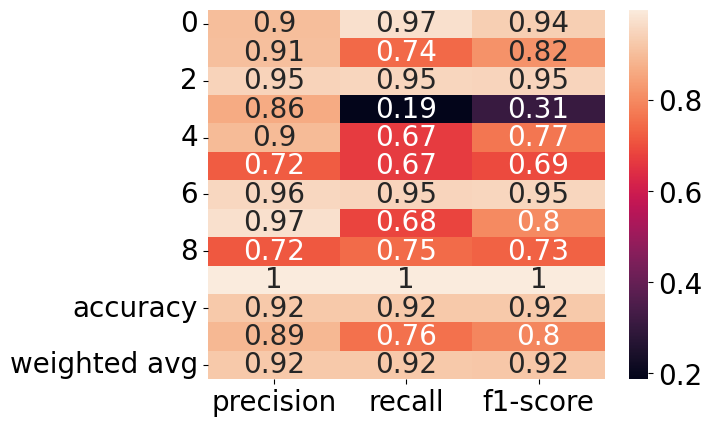

In [188]:
svc=svm.LinearSVC(C = 10, loss = 'hinge', penalty ='l2')
svc.fit(X_train, class2_train)

classificationsvm = eval_metrics(svc, X_test , class2_test)

### NB

In [51]:
gnb_clf = GaussianNB()

parameter_grid = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
                 }

grid_search = GridSearchCV(gnb_clf, param_grid = parameter_grid, 
                          cv =StratifiedKFold(7), verbose = 2)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 14 candidates, totalling 98 fits
[CV] END .................................var_smoothing=0.01; total time=   0.6s
[CV] END .................................var_smoothing=0.01; total time=   0.6s
[CV] END .................................var_smoothing=0.01; total time=   0.6s
[CV] END .................................var_smoothing=0.01; total time=   0.6s
[CV] END .................................var_smoothing=0.01; total time=   0.6s
[CV] END .................................var_smoothing=0.01; total time=   0.6s
[CV] END .................................var_smoothing=0.01; total time=   0.6s
[CV] END ................................var_smoothing=0.001; total time=   0.6s
[CV] END ................................var_smoothing=0.001; total time=   0.6s
[CV] END ................................var_smoothing=0.001; total time=   0.6s
[CV] END ................................var_smoothing=0.001; total time=   0.6s
[CV] END ................................var_smo

In [53]:
gnb = GaussianNB(var_smoothing= 1e-7)
gnb.fit(X_train, class2_train)
eval_metrics(gnb, X_train , class2_train)
eval_metrics(gnb, X_test , class2_test)


Model Accuracy:
 0.6292903841434322

Confusion matrix:
 [[157657 115099  24675   5979   5369   6934  14704   4506    870    867]
 [  6545  84314  10415    152    203    170     47    103    121      2]
 [  1578   2999  38346    664     25      3   9455    626    109      0]
 [    37    527      2    208     13      1      0     25      0      0]
 [  5940  13580   1287    110   3946     22    235    116     40      0]
 [  1117    327      0      6      6    732     13     43      2      1]
 [   553    486    308     55     29    118  16029     85     44      0]
 [  2054    500    200     11     52      8    977    266      7      0]
 [     2      3     63      1      0      2    172      0    124      0]
 [   449     55      6   1107      2      4      0    162     12 111212]]

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.47      0.62    336660
           1       0.39      0.83      0.53    102072
           2       0.51 


Model Accuracy:
 0.6536632359397102

Confusion matrix:
 [[43821 24632  5508  1530  1075  1511  4635  1076   183   194]
 [ 1751 20988  2578    43    55    28    19    24    32     0]
 [  425   782  9560    70     3     1  2437   149    24     0]
 [    8   138     0    50     2     4     0     1     0     0]
 [ 1805  3336   312    26   733     8    64    30     6     0]
 [  314    63     0     0     3   171     9     2     0     0]
 [  150   110    80    10     2    30  4013    20    12     0]
 [  505    83    49     1     9     3   300    69     0     0]
 [    1     1    19     0     0     0    44     0    26     0]
 [  137    21     1   281     2    35     0     0     0 27775]]

Classification report:
 {'0': {'precision': 0.8958235378293845, 'recall': 0.5206558545713776, 'f1-score': 0.658556378773989, 'support': 84165.0}, '1': {'precision': 0.41847110898432827, 'recall': 0.8224782506466024, 'f1-score': 0.554709800190295, 'support': 25518.0}, '2': {'precision': 0.5279726072789529, 'rec

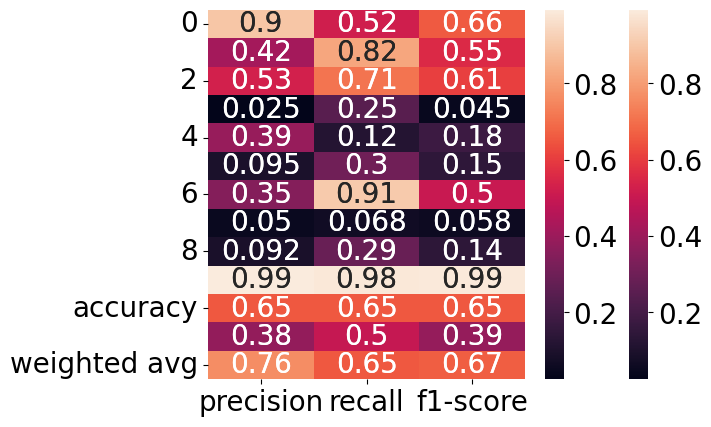

In [189]:
gnb = GaussianNB(var_smoothing= 1e-7)
gnb.fit(X_train, class2_train)

eval_metrics(gnb, X_test , class2_test)
classificationgnb = eval_metrics(gnb, X_test , class2_test)

### RF

In [42]:
rfc=RandomForestClassifier()


parameter_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth' : [30, 40],
    'criterion' :['entropy']
}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.978 total time=47.3min
[CV 2/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.978 total time=37.4min
[CV 3/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.978 total time=36.9min
[CV 4/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.978 total time=36.8min
[CV 5/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.978 total time=37.2min
[CV 1/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.978 total time=75.5min
[CV 2/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.978 total time=75.5min
[CV 3/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.978 total time=75.5min
[CV 4/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.978 total time=76.8min
[CV 5/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.978


Model Accuracy:
 0.9797265987025023

Confusion matrix:
 [[83734   213    32     0   114    22    21    15     0    14]
 [  781 24714     6     0    15     1     1     0     0     0]
 [   80     0 13336     0     0     0    35     0     0     0]
 [   70    13     0   110    10     0     0     0     0     0]
 [  833     7     2     0  5473     0     2     3     0     0]
 [  220     0     0     0     0   342     0     0     0     0]
 [  127     0    28     0     0     0  4272     0     0     0]
 [  652     0     0     0     1     0     0   366     0     0]
 [    5     0     0     0     0     0     0     0    86     0]
 [    2     0     0     0     0     0     0     0     0 28250]]


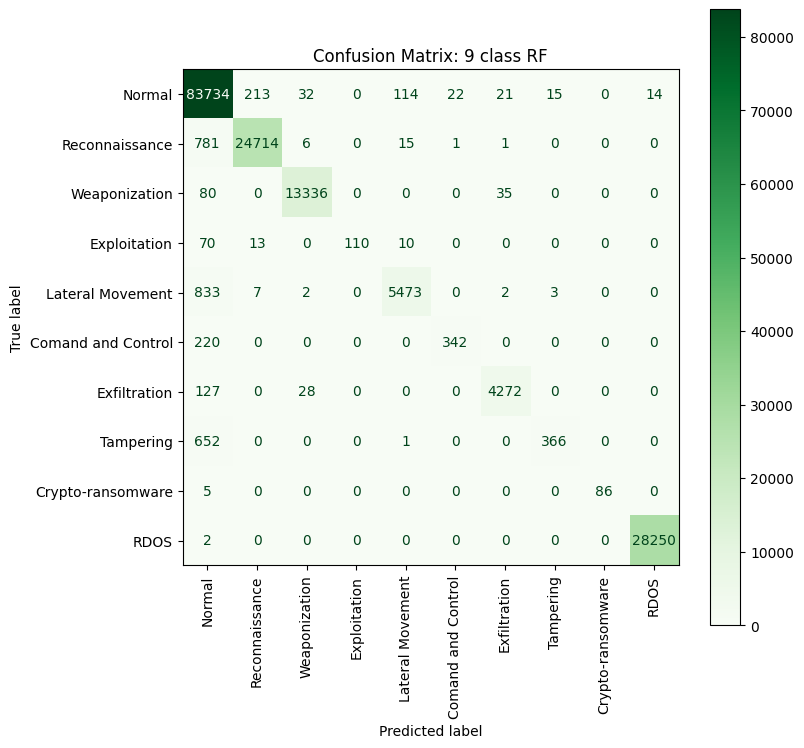


Classification report:
 {'0': {'precision': 0.9679783593822251, 'recall': 0.9948791065169608, 'f1-score': 0.981244397049259, 'support': 84165.0}, '1': {'precision': 0.9906601996232012, 'recall': 0.9684928285915824, 'f1-score': 0.9794511047260477, 'support': 25518.0}, '2': {'precision': 0.9949268874962698, 'recall': 0.9914504497806854, 'f1-score': 0.9931856265127537, 'support': 13451.0}, '3': {'precision': 1.0, 'recall': 0.541871921182266, 'f1-score': 0.7028753993610224, 'support': 203.0}, '4': {'precision': 0.9750579013005523, 'recall': 0.8659810126582278, 'f1-score': 0.9172881924076091, 'support': 6320.0}, '5': {'precision': 0.936986301369863, 'recall': 0.608540925266904, 'f1-score': 0.737864077669903, 'support': 562.0}, '6': {'precision': 0.9863772800738859, 'recall': 0.9649875762367291, 'f1-score': 0.9755651975336834, 'support': 4427.0}, '7': {'precision': 0.953125, 'recall': 0.3591756624141315, 'f1-score': 0.5217391304347826, 'support': 1019.0}, '8': {'precision': 1.0, 'recall': 0

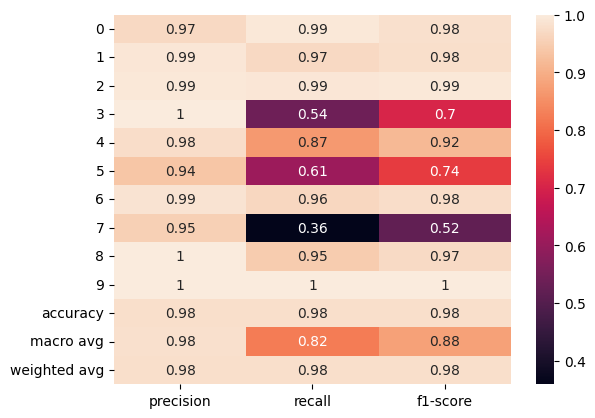

In [46]:
rfc=RandomForestClassifier(  criterion = 'entropy', max_depth =  40, n_estimators = 300)
rfc.fit(X_train, class2_train)
rf_results_9 = eval_metrics(rfc, X_test , class2_test,  attacks_9, "Confusion Matrix: 9 class RF")

In [158]:
rfc=RandomForestClassifier()


parameter_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth' : [30, 40],
    'criterion' :['entropy']
}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.972 total time=44.7min
[CV 2/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.972 total time=40.1min
[CV 3/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.971 total time=40.2min
[CV 4/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.971 total time=40.1min
[CV 5/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.971 total time=33.8min
[CV 1/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.972 total time=77.0min
[CV 2/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.971 total time=71.7min
[CV 3/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.971 total time=71.7min
[CV 4/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.971 total time=72.1min
[CV 5/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.97

KeyboardInterrupt: 

In [42]:
rfc=RandomForestClassifier()


parameter_grid = { 
    'n_estimators': [25, 50 , 100 , 150, 200, 300, 400, 500],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid,
                          cv =StratifiedKFold(7), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 360 candidates, totalling 2520 fits
[CV 1/7] END criterion=gini, max_depth=2, min_samples_split=1, n_estimators=25;, score=nan total time=   0.0s
[CV 2/7] END criterion=gini, max_depth=2, min_samples_split=1, n_estimators=25;, score=nan total time=   0.0s
[CV 3/7] END criterion=gini, max_depth=2, min_samples_split=1, n_estimators=25;, score=nan total time=   0.0s
[CV 4/7] END criterion=gini, max_depth=2, min_samples_split=1, n_estimators=25;, score=nan total time=   0.0s
[CV 5/7] END criterion=gini, max_depth=2, min_samples_split=1, n_estimators=25;, score=nan total time=   0.0s
[CV 6/7] END criterion=gini, max_depth=2, min_samples_split=1, n_estimators=25;, score=nan total time=   0.0s
[CV 7/7] END criterion=gini, max_depth=2, min_samples_split=1, n_estimators=25;, score=nan total time=   0.0s
[CV 1/7] END criterion=gini, max_depth=2, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/7] END criterion=gini, max_depth=2, min_samples_sp

In [57]:
rfc=RandomForestClassifier()


parameter_grid = { 
    'n_estimators': [25, 50 , 100 , 200],
    'max_depth' : [14, 16, 18, 20],
    'criterion' :['gini']
}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid,
                          cv =StratifiedKFold(7), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 16 candidates, totalling 112 fits
[CV 1/7] END criterion=gini, max_depth=14, n_estimators=25;, score=0.949 total time= 7.5min
[CV 2/7] END criterion=gini, max_depth=14, n_estimators=25;, score=0.950 total time= 7.6min
[CV 3/7] END criterion=gini, max_depth=14, n_estimators=25;, score=0.950 total time= 6.7min
[CV 4/7] END criterion=gini, max_depth=14, n_estimators=25;, score=0.949 total time= 6.7min
[CV 5/7] END criterion=gini, max_depth=14, n_estimators=25;, score=0.950 total time= 6.5min
[CV 6/7] END criterion=gini, max_depth=14, n_estimators=25;, score=0.950 total time= 7.1min
[CV 7/7] END criterion=gini, max_depth=14, n_estimators=25;, score=0.947 total time= 5.9min
[CV 1/7] END criterion=gini, max_depth=14, n_estimators=50;, score=0.950 total time=12.4min
[CV 2/7] END criterion=gini, max_depth=14, n_estimators=50;, score=0.950 total time=12.4min
[CV 3/7] END criterion=gini, max_depth=14, n_estimators=50;, score=0.951 total time=12.5min
[CV 4/7] END crite

In [58]:
rfc=RandomForestClassifier()


parameter_grid = { 
    'n_estimators': [50  , 100 ],
    'max_depth' : [20],
    'criterion' :['entropy']
}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid,
                          cv =StratifiedKFold(7), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 2 candidates, totalling 14 fits
[CV 1/7] END criterion=entropy, max_depth=20, n_estimators=50;, score=0.972 total time=20.7min
[CV 2/7] END criterion=entropy, max_depth=20, n_estimators=50;, score=0.971 total time=20.7min
[CV 3/7] END criterion=entropy, max_depth=20, n_estimators=50;, score=0.972 total time=20.6min
[CV 4/7] END criterion=entropy, max_depth=20, n_estimators=50;, score=0.971 total time=20.5min
[CV 5/7] END criterion=entropy, max_depth=20, n_estimators=50;, score=0.971 total time=20.5min
[CV 6/7] END criterion=entropy, max_depth=20, n_estimators=50;, score=0.971 total time=20.9min
[CV 7/7] END criterion=entropy, max_depth=20, n_estimators=50;, score=0.971 total time=20.7min
[CV 1/7] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.972 total time=41.4min
[CV 2/7] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.972 total time=41.3min
[CV 3/7] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.971 total 


Model Accuracy:
 0.9723976879176626

Confusion matrix:
 [[83903    69    42     0   102     7    19     8     0    15]
 [ 1966 23523    13     0    16     0     0     0     0     0]
 [  101     0 13295     0     0     0    55     0     0     0]
 [   87    16     0    87    13     0     0     0     0     0]
 [  857     6    10     0  5445     0     1     1     0     0]
 [  246     0     0     0     0   316     0     0     0     0]
 [  131     0    37     0     0     0  4259     0     0     0]
 [  698     0     0     0     0     0     0   321     0     0]
 [    4     0     1     0     0     0     0     0    86     0]
 [    6     0     0     0     0     0     0     0     0 28246]]

Classification report:
 {'0': {'precision': 0.9534540165229151, 'recall': 0.996887067070635, 'f1-score': 0.9746869264189958, 'support': 84165.0}, '1': {'precision': 0.996146353857881, 'recall': 0.9218198918410534, 'f1-score': 0.9575429455344786, 'support': 25518.0}, '2': {'precision': 0.9923122854157337, 'reca

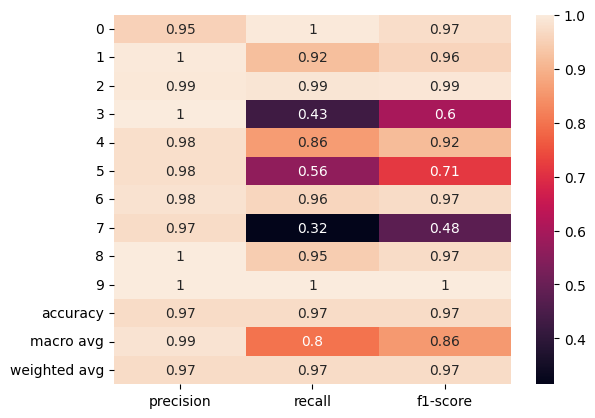

In [40]:
rfc=RandomForestClassifier(  criterion = 'entropy', max_depth =  20, n_estimators = 100)
rfc.fit(X_train, class2_train)
classification_rfc = eval_metrics(rfc, X_test , class2_test)

In [39]:
rfc=RandomForestClassifier()

parameter_grid = { 
    'n_estimators': [50  , 100 , 200],
    'max_depth' : [22, 24],
    'criterion' :['entropy']
}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END criterion=entropy, max_depth=22, n_estimators=50;, score=0.974 total time=25.8min
[CV 2/5] END criterion=entropy, max_depth=22, n_estimators=50;, score=0.974 total time=25.0min
[CV 3/5] END criterion=entropy, max_depth=22, n_estimators=50;, score=0.975 total time=25.7min
[CV 4/5] END criterion=entropy, max_depth=22, n_estimators=50;, score=0.975 total time=27.2min
[CV 5/5] END criterion=entropy, max_depth=22, n_estimators=50;, score=0.974 total time=23.8min
[CV 1/5] END criterion=entropy, max_depth=22, n_estimators=100;, score=0.974 total time=36.6min
[CV 2/5] END criterion=entropy, max_depth=22, n_estimators=100;, score=0.974 total time=35.2min
[CV 3/5] END criterion=entropy, max_depth=22, n_estimators=100;, score=0.974 total time=32.5min
[CV 4/5] END criterion=entropy, max_depth=22, n_estimators=100;, score=0.974 total time=37.4min
[CV 5/5] END criterion=entropy, max_depth=22, n_estimators=100;, score=0.974 tota


Model Accuracy:
 0.9780925320716063

Confusion matrix:
 [[83858   129    29     0   102    10    13    11     0    13]
 [ 1165 24326    10     0    17     0     0     0     0     0]
 [   82     0 13332     0     0     0    37     0     0     0]
 [   85    14     0    94    10     0     0     0     0     0]
 [  798     4     5     0  5512     0     0     1     0     0]
 [  239     0     0     0     0   323     0     0     0     0]
 [  124     0    32     0     0     0  4271     0     0     0]
 [  656     0     0     0     0     0     0   363     0     0]
 [    3     0     1     0     0     0     0     0    87     0]
 [    3     0     0     0     0     0     0     0     0 28249]]

Classification report:
 {'0': {'precision': 0.9637410501879029, 'recall': 0.9963524030178815, 'f1-score': 0.9797754384325088, 'support': 84165.0}, '1': {'precision': 0.9939933804600989, 'recall': 0.9532878752253311, 'f1-score': 0.9732151787321717, 'support': 25518.0}, '2': {'precision': 0.9942575881870386, 're

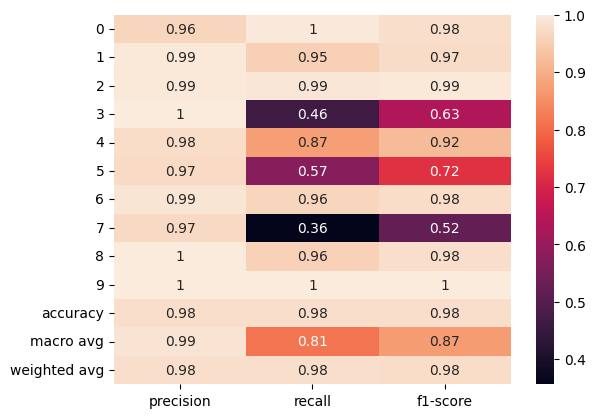

In [41]:
rfc=RandomForestClassifier(  criterion = 'entropy', max_depth =  24, n_estimators = 200)
rfc.fit(X_train, class2_train)
classification_rfc = eval_metrics(rfc, X_test , class2_test)

### XGBoost

In [48]:
xgb_model = xgb.XGBClassifier()

params = { 
    'model__max_depth': [3, 5, 8, 10, 12, 15],
    'model__learning_rate': [ 0.01, 0.05, 0.1, 0.20],
    #"model__gamma":[0, 0.25, 0.5, 0.75,1],
    'model__n_estimators': [50 ,100, 300, 500],
    #"model__subsample":[0.9],
    #"model__colsample_bytree":[0.5],
    #"model__early_stopping_rounds": [10], 
}


grid_search = GridSearchCV(xgb_model, param_grid = params, cv =StratifiedKFold(7), verbose = 3)
model = grid_search.fit(X_train, class2_train)
print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 96 candidates, totalling 672 fits
[CV 1/7] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.977 total time= 1.1min
[CV 2/7] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.976 total time=  49.9s
[CV 3/7] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.977 total time= 1.0min
[CV 4/7] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.976 total time= 1.9min
[CV 5/7] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.977 total time= 2.1min
[CV 6/7] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.976 total time= 2.2min
[CV 7/7] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.976 total time= 2.2min
[CV 1/7] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.977 total time= 2.1min
[CV 2/7] 

In [50]:
xgb_model = xgb.XGBClassifier(model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)
xgb_model.fit(X_train, class2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, model__learning_rate=0.01,
              model_max_depth=3, model_n_estimators=50,
              monotone_constraints=None, multi_strategy=None, n_estimators=None, ...)


Model Accuracy:
 0.9844915865256367

Confusion matrix:
 [[335544    494     75      0    468     36     20     23      0      0]
 [  6251  95648    102      0     69      1      1      0      0      0]
 [    16      2  53747      0      0      0     40      0      0      0]
 [     0      1      0    812      0      0      0      0      0      0]
 [  1657     71      1      0  23538      0      3      6      0      0]
 [   183      3      0      0      0   2061      0      0      0      0]
 [    18      3     20      0      0      0  17666      0      0      0]
 [   602      0      0      0      8      0      0   3465      0      0]
 [     0      0      0      0      0      0      0      0    367      0]
 [     0      0      0      0      0      0      0      0      0 113009]]

Classification report:
 {'0': {'precision': 0.9746507838301803, 'recall': 0.9966850828729282, 'f1-score': 0.9855447908818955, 'support': 336660.0}, '1': {'precision': 0.9940346282554925, 'recall': 0.937064033231

{'0': {'precision': 0.9746507838301803,
  'recall': 0.9966850828729282,
  'f1-score': 0.9855447908818955,
  'support': 336660.0},
 '1': {'precision': 0.9940346282554925,
  'recall': 0.9370640332314445,
  'f1-score': 0.9647089674927128,
  'support': 102072.0},
 '2': {'precision': 0.9963295949578275,
  'recall': 0.9989220332682837,
  'f1-score': 0.9976241299303944,
  'support': 53805.0},
 '3': {'precision': 1.0,
  'recall': 0.998769987699877,
  'f1-score': 0.9993846153846154,
  'support': 813.0},
 '4': {'precision': 0.9773699289955571,
  'recall': 0.931239120113942,
  'f1-score': 0.9537470370145262,
  'support': 25276.0},
 '5': {'precision': 0.9823641563393708,
  'recall': 0.9172229639519359,
  'f1-score': 0.9486766398158805,
  'support': 2247.0},
 '6': {'precision': 0.9963902989283699,
  'recall': 0.9976845315411984,
  'f1-score': 0.9970369952309732,
  'support': 17707.0},
 '7': {'precision': 0.9917000572409845,
  'recall': 0.8503067484662576,
  'f1-score': 0.9155766944114149,
  'suppor

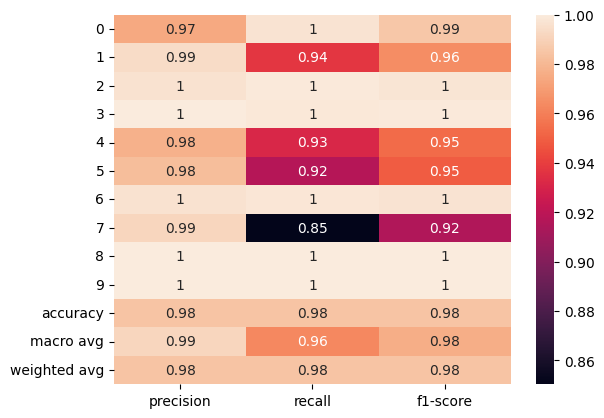

In [51]:
eval_metrics(xgb_model, X_train, class2_train)


Model Accuracy:
 0.9759036144578314

Confusion matrix:
 [[83573   200    42     3   198    47    29    55     1    17]
 [ 1854 23596    35     0    27     3     3     0     0     0]
 [   28     6 13362     0     0     0    55     0     0     0]
 [   24    22     0   144    13     0     0     0     0     0]
 [  586    31     2     0  5692     0     2     7     0     0]
 [  170     2     0     0     0   390     0     0     0     0]
 [   50     3    46     0     0     0  4328     0     0     0]
 [  384     0     0     0     2     0     0   633     0     0]
 [    4     0     0     0     0     0     0     0    87     0]
 [    1     0     0     0     0     0     0     0     0 28251]]

Classification report:
 {'0': {'precision': 0.9642222581166209, 'recall': 0.9929661973504426, 'f1-score': 0.9783831560709205, 'support': 84165.0}, '1': {'precision': 0.9889354568315172, 'recall': 0.9246806176032605, 'f1-score': 0.9557292721454899, 'support': 25518.0}, '2': {'precision': 0.990731815822644, 'rec

{'0': {'precision': 0.9642222581166209,
  'recall': 0.9929661973504426,
  'f1-score': 0.9783831560709205,
  'support': 84165.0},
 '1': {'precision': 0.9889354568315172,
  'recall': 0.9246806176032605,
  'f1-score': 0.9557292721454899,
  'support': 25518.0},
 '2': {'precision': 0.990731815822644,
  'recall': 0.9933833915694,
  'f1-score': 0.9920558319103125,
  'support': 13451.0},
 '3': {'precision': 0.9795918367346939,
  'recall': 0.7093596059113301,
  'f1-score': 0.8228571428571428,
  'support': 203.0},
 '4': {'precision': 0.959541469993257,
  'recall': 0.9006329113924051,
  'f1-score': 0.9291544237675483,
  'support': 6320.0},
 '5': {'precision': 0.8863636363636364,
  'recall': 0.693950177935943,
  'f1-score': 0.778443113772455,
  'support': 562.0},
 '6': {'precision': 0.9798505773149196,
  'recall': 0.9776372261124915,
  'f1-score': 0.9787426503844413,
  'support': 4427.0},
 '7': {'precision': 0.9107913669064748,
  'recall': 0.6211972522080471,
  'f1-score': 0.7386231038506417,
  's

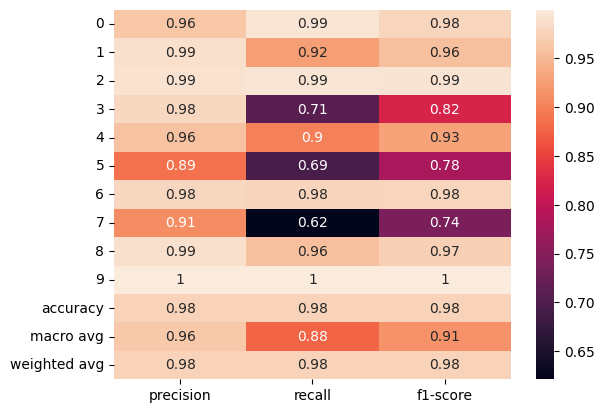

In [53]:
eval_metrics(xgb_model, X_test, class2_test)

In [40]:
xgb_model = xgb.XGBClassifier()

params = { 
    'model__max_depth': [3, 4, 5],
    'model__learning_rate': [ 0.01, 0.02, 0.05, 0.1],
    "model__gamma":[0.25, 0.5, 0.75, 1],
    'model__n_estimators': [50 ,100, 300],
    #"model__subsample":[0.9],
    #"model__colsample_bytree":[0.5],
    #"model__early_stopping_rounds": [10], 
}


grid_search = GridSearchCV(xgb_model, param_grid = params, cv =StratifiedKFold(5), verbose = 3)
model = grid_search.fit(X_train, class2_train)
print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END model__gamma=0.25, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.977 total time= 1.7min
[CV 2/5] END model__gamma=0.25, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.977 total time= 1.5min
[CV 3/5] END model__gamma=0.25, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.976 total time= 1.9min
[CV 4/5] END model__gamma=0.25, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.977 total time= 2.6min
[CV 5/5] END model__gamma=0.25, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.976 total time= 2.7min
[CV 1/5] END model__gamma=0.25, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.977 total time= 1.1min
[CV 2/5] END model__gamma=0.25, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.977 total tim

In [42]:
xgb_model = xgb.XGBClassifier(model_gamma = 0.25, model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)
xgb_model.fit(X_train, class2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, model__learning_rate=0.01,
              model_gamma=0.25, model_max_depth=3, model_n_estimators=50,
              monotone_constraints=None, multi_strategy=None, ...)


Model Accuracy:
 0.9852796590405026

Confusion matrix:
 [[335500    575     67      0    447     22     15     34      0      0]
 [  5879  96022     87      0     80      1      3      0      0      0]
 [    49      8  53745      0      0      0      3      0      0      0]
 [     0      0      0    812      1      0      0      0      0      0]
 [  1721     76      7      0  23466      0      0      6      0      0]
 [   176      2      0      0      0   2069      0      0      0      0]
 [     9      2      6      0      0      0  17690      0      0      0]
 [   374      0      0      0      7      0      0   3694      0      0]
 [     0      0      0      0      0      0      0      0    367      0]
 [     0      0      0      0      0      0      0      0      0 113009]]

Classification report:
 {'0': {'precision': 0.976119264026441, 'recall': 0.9965543872155884, 'f1-score': 0.986230980880935, 'support': 336660.0}, '1': {'precision': 0.9931426798365827, 'recall': 0.94072811348851

{'0': {'precision': 0.976119264026441,
  'recall': 0.9965543872155884,
  'f1-score': 0.986230980880935,
  'support': 336660.0},
 '1': {'precision': 0.9931426798365827,
  'recall': 0.9407281134885179,
  'f1-score': 0.9662250889276857,
  'support': 102072.0},
 '2': {'precision': 0.9969023594005045,
  'recall': 0.9988848620016727,
  'f1-score': 0.9978926260478848,
  'support': 53805.0},
 '3': {'precision': 1.0,
  'recall': 0.998769987699877,
  'f1-score': 0.9993846153846154,
  'support': 813.0},
 '4': {'precision': 0.9777092621140786,
  'recall': 0.9283905681278684,
  'f1-score': 0.9524118757229539,
  'support': 25276.0},
 '5': {'precision': 0.9890057361376673,
  'recall': 0.9207832665776591,
  'f1-score': 0.9536759622032726,
  'support': 2247.0},
 '6': {'precision': 0.9988142962001016,
  'recall': 0.9990399277122042,
  'f1-score': 0.9989270992150884,
  'support': 17707.0},
 '7': {'precision': 0.9892876272094269,
  'recall': 0.9065030674846626,
  'f1-score': 0.9460878473556152,
  'support

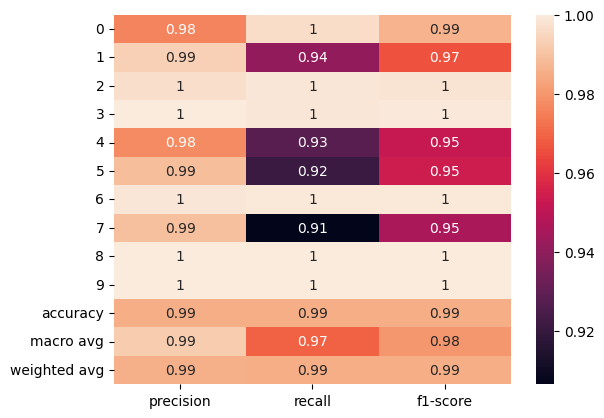

In [44]:
eval_metrics(xgb_model, X_train, class2_train)


Model Accuracy:
 0.9766108970294132

Confusion matrix:
 [[83602   203    36     4   206    38    11    47     1    17]
 [ 1777 23659    44     0    29     6     3     0     0     0]
 [   25     2 13388     0     1     0    35     0     0     0]
 [   31    21     0   137    14     0     0     0     0     0]
 [  596    41     5     1  5669     0     2     6     0     0]
 [  165     6     0     0     0   391     0     0     0     0]
 [   52     0    44     0     0     0  4330     1     0     0]
 [  356     0     0     0     5     0     0   658     0     0]
 [    2     0     2     0     0     0     0     0    87     0]
 [    1     0     0     0     0     0     0     0     0 28251]]

Classification report:
 {'0': {'precision': 0.9653030355513988, 'recall': 0.9933107586288837, 'f1-score': 0.9791066451174666, 'support': 84165.0}, '1': {'precision': 0.9885926792578974, 'recall': 0.9271494631240693, 'f1-score': 0.9568857431749243, 'support': 25518.0}, '2': {'precision': 0.9903099341667283, 're

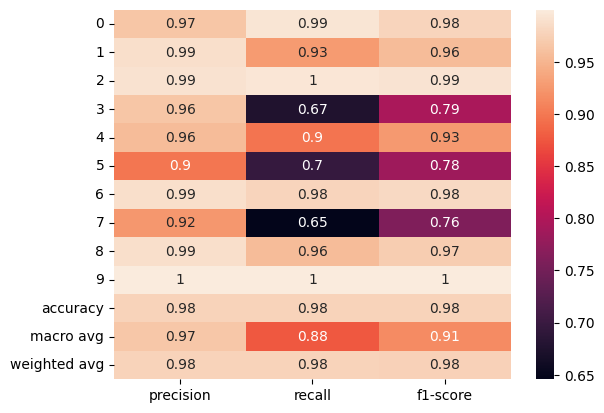

In [43]:
classification_xgb = eval_metrics(xgb_model, X_test, class2_test)

In [39]:
xgb_model = xgb.XGBClassifier()

params = { 
    'model__max_depth': [3, 4, 5],
    'model__learning_rate': [ 0.01, 0.1, 1 ],
    "model__gamma":[0, 0.25, 0.5, 0.75, 1],
    'model__n_estimators': [50, 75 ,100, 200],
    #"model__subsample":[0.9],
    #"model__colsample_bytree":[0.5],
    #"model__early_stopping_rounds": [10], 
}


grid_search = GridSearchCV(xgb_model, param_grid = params, cv =StratifiedKFold(5), verbose = 3, scoring='f1_macro', refit=True )
model = grid_search.fit(X_train, class2_train)
print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))



Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.915 total time= 1.2min
[CV 2/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.916 total time= 1.8min
[CV 3/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.916 total time= 1.9min
[CV 4/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.911 total time= 2.6min
[CV 5/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.913 total time= 2.6min
[CV 1/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=75;, score=0.915 total time= 2.4min
[CV 2/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=75;, score=0.916 total time= 5.0min
[CV 3/5] END 

### AdaBoost

In [42]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[3, 4, 5, 7, 9],
              'base_estimator__criterion':['gini','entropy'],
              'n_estimators':[50, 100 , 200 , 300 ],
              'learning_rate':[0.01, 0.1, 1.0]}

grid_search = GridSearchCV(abc, param_grid = parameters,cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END base_estimator__criterion=gini, base_estimator__max_depth=3, learning_rate=0.01, n_estimators=50;, score=0.818 total time=35.8min
[CV 2/5] END base_estimator__criterion=gini, base_estimator__max_depth=3, learning_rate=0.01, n_estimators=50;, score=0.822 total time=38.7min


KeyboardInterrupt: 

In [43]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[7, 9 , 10],
              'base_estimator__criterion':['gini','entropy'],
              'n_estimators':[50, 100 , 200 , 300 ],
              'learning_rate':[0.01, 0.1, 1.0]}

grid_search = GridSearchCV(abc, param_grid = parameters,cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END base_estimator__criterion=gini, base_estimator__max_depth=5, learning_rate=0.01, n_estimators=50;, score=0.882 total time=41.6min
[CV 2/5] END base_estimator__criterion=gini, base_estimator__max_depth=5, learning_rate=0.01, n_estimators=50;, score=0.887 total time=38.4min


KeyboardInterrupt: 

In [44]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[7, 9 , 10],
              'base_estimator__criterion':['gini','entropy'],
              'n_estimators':[50, 75, 100 , 200 ],
              'learning_rate':[0.01, 0.1, 1.0]}

grid_search = GridSearchCV(abc, param_grid = parameters,cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END base_estimator__criterion=gini, base_estimator__max_depth=7, learning_rate=0.01, n_estimators=50;, score=0.914 total time=41.5min


KeyboardInterrupt: 

In [45]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[9 , 11],
              'base_estimator__criterion':['entropy'],
              'n_estimators':[50, 75, 100 , 200 ],
              'learning_rate':[0.01, 0.1, 1.0]}

grid_search = GridSearchCV(abc, param_grid = parameters,cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END base_estimator__criterion=entropy, base_estimator__max_depth=9, learning_rate=0.01, n_estimators=50;, score=0.944 total time=121.0min


KeyboardInterrupt: 

### Ensemble

In [60]:
xgb = xgb.XGBClassifier(model_gamma = 0.25, model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 30)
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
lr = LogisticRegression( C = 1000, penalty = 'l2')
svc = svm.LinearSVC(C = 10, loss = 'hinge', penalty ='l2')
rf = RandomForestClassifier(  criterion = 'entropy', max_depth =  24, n_estimators = 200)

In [39]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

knn_dt = VotingClassifier(estimators=[("knn" , knn), ("dt", dt)])
xgb_dt_knn = VotingClassifier(estimators=[("xgb" , xgb), ("dt", dt), ("knn", knn)])
xgb_dt = VotingClassifier(estimators=[("xgb" , xgb), ("dt", dt)])
xgb_rf = VotingClassifier(estimators=[("xgb" , xgb), ("rf", rf)])
xgb_rf_dt = VotingClassifier(estimators=[("xgb" , xgb), ("rf", rf), ("dt", dt)])


labels = ['KNN_DT', 'XGB_DT_KNN', "XGB_DT",'XGB_RF' , 'XGB_RF_DT']
for clf, label in zip([knn_dt, xgb_dt_knn, xgb_dt, xgb_rf, xgb_rf_dt], labels):

    scores = cross_val_score(clf, X_train, class2_train, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.9682 (+/- 0.0003) [KNN_DT]
Accuracy: 0.9781 (+/- 0.0002) [XGB_DT_KNN]
Accuracy: 0.9710 (+/- 0.0004) [XGB_DT]
Accuracy: 0.9726 (+/- 0.0003) [XGB_RF]
Accuracy: 0.9785 (+/- 0.0002) [XGB_RF_DT]


In [62]:
from sklearn.ensemble import VotingClassifier


Model Accuracy:
 0.9857354301854638

Confusion matrix:
 [[336654      5      0      0      1      0      0      0      0      0]
 [  6656  95416      0      0      0      0      0      0      0      0]
 [    19      1  53784      0      0      0      1      0      0      0]
 [     0      0      0    813      0      0      0      0      0      0]
 [  1614     64      3      0  23595      0      0      0      0      0]
 [   169      2      0      0      0   2076      0      0      0      0]
 [    24      3     14      0      0      0  17666      0      0      0]
 [   767      0      0      0     15      0      0   3293      0      0]
 [     0      0      0      0      0      0      0      0    367      0]
 [     0      0      0      0      0      0      0      0      0 113009]]

Classification report:
 {'0': {'precision': 0.9732612900148307, 'recall': 0.9999821778649082, 'f1-score': 0.9864408120569089, 'support': 336660.0}, '1': {'precision': 0.9992145856677592, 'recall': 0.934791127831

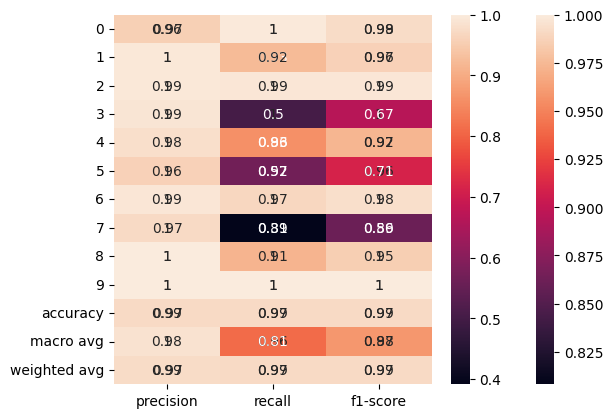

In [63]:
xgb_rf = VotingClassifier(estimators=[("xgb" , xgb), ("rf", rf)])
xgb_rf.fit(X_train, class2_train)
eval_metrics(xgb_rf, X_train, class2_train)
xgb_rf_results = eval_metrics(xgb_rf, X_test, class2_test)



Model Accuracy:
 0.9964788249335779

Confusion matrix:
 [[336635     21      0      0      4      0      0      0      0      0]
 [  1531 100541      0      0      0      0      0      0      0      0]
 [     1      0  53804      0      0      0      0      0      0      0]
 [     0      0      0    813      0      0      0      0      0      0]
 [   326      0      0      0  24950      0      0      0      0      0]
 [    96      0      0      0      0   2151      0      0      0      0]
 [     0      0      0      0      0      0  17707      0      0      0]
 [   331      0      0      0      0      0      0   3744      0      0]
 [     0      0      0      0      0      0      0      0    367      0]
 [     0      0      0      0      0      0      0      0      0 113009]]

Classification report:
 {'0': {'precision': 0.9932579959872536, 'recall': 0.9999257411037842, 'f1-score': 0.9965807158293614, 'support': 336660.0}, '1': {'precision': 0.9997911736043436, 'recall': 0.985000783760

{'0': {'precision': 0.9932579959872536,
  'recall': 0.9999257411037842,
  'f1-score': 0.9965807158293614,
  'support': 336660.0},
 '1': {'precision': 0.9997911736043436,
  'recall': 0.9850007837604828,
  'f1-score': 0.9923408707324536,
  'support': 102072.0},
 '2': {'precision': 1.0,
  'recall': 0.9999814143666945,
  'f1-score': 0.99999070709699,
  'support': 53805.0},
 '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 813.0},
 '4': {'precision': 0.9998397050573055,
  'recall': 0.9871023896186105,
  'f1-score': 0.993430220983476,
  'support': 25276.0},
 '5': {'precision': 1.0,
  'recall': 0.9572763684913218,
  'f1-score': 0.9781718963165076,
  'support': 2247.0},
 '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17707.0},
 '7': {'precision': 1.0,
  'recall': 0.9187730061349694,
  'f1-score': 0.9576672208722344,
  'support': 4075.0},
 '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 367.0},
 '9': {'precision': 1.0, 'recall': 1.0, 'f1-

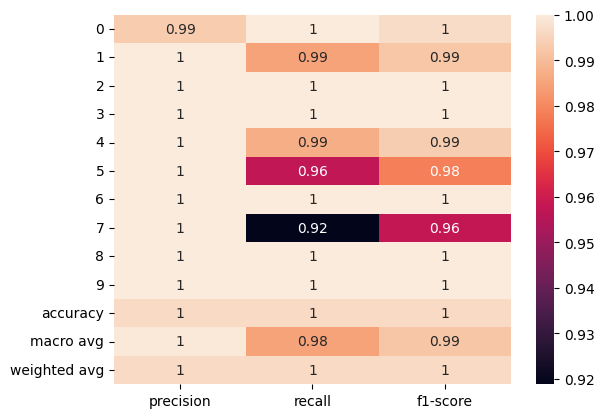

In [64]:
xgb_rf_dt = VotingClassifier(estimators=[("xgb" , xgb), ("rf", rf), ("dt", dt)])
xgb_rf_dt.fit(X_train, class2_train)
eval_metrics(xgb_rf_dt, X_train, class2_train)




Model Accuracy:
 0.9801229208331301

Confusion matrix:
 [[83717   158    41     1   144    32    21    30     1    20]
 [ 1072 24415    10     0    20     0     1     0     0     0]
 [   67     2 13357     0     0     0    25     0     0     0]
 [   50    14     0   126    13     0     0     0     0     0]
 [  703    23     3     0  5585     0     1     5     0     0]
 [  210     0     0     0     0   352     0     0     0     0]
 [   67     2    30     0     0     0  4328     0     0     0]
 [  485     0     0     0     3     0     0   531     0     0]
 [    4     0     1     0     0     0     0     0    86     0]
 [    1     0     0     0     0     0     0     0     0 28251]]

Classification report:
 {'0': {'precision': 0.9692159859220154, 'recall': 0.9946771223192539, 'f1-score': 0.9817815070862724, 'support': 84165.0}, '1': {'precision': 0.9919151702283253, 'recall': 0.9567756093737754, 'f1-score': 0.9740285645894837, 'support': 25518.0}, '2': {'precision': 0.9936765362297277, 're

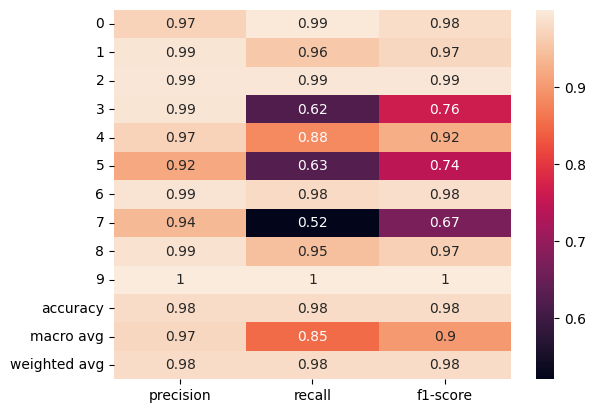

In [65]:
xgb_rf_dt_results = eval_metrics(xgb_rf_dt, X_test, class2_test)

In [43]:

xgb_rf_dt_knn = VotingClassifier(estimators=[("xgb" , xgb), ("rf", rf), ("dt", dt), ("knn", knn)])
dt_lr_knn_svc = VotingClassifier(estimators=[("dt" , dt), ("lr", lr), ("knn", knn), ("svm", svc)])
dt_lr_svc = VotingClassifier(estimators=[("dt" , dt), ("lr", lr),  ("svm", svc)])
dt_lr = VotingClassifier(estimators=[("dt" , dt), ("lr", lr)])
dt_svc = VotingClassifier(estimators=[("dt" , dt), ("svm", svc)])


labels = ['XGB_RF_DT_KNN', 'DT_LR_KNN_SVC', 'DT_LR_SVC', 'DT_LR', 'DT_SVC']
for clf, label in zip([ xgb_rf_dt_knn, dt_lr_knn_svc,dt_lr_svc, dt_lr, dt_svc], labels):

    scores = cross_val_score(clf, X_train, class2_train, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.9761 (+/- 0.0003) [XGB_RF_DT_KNN]
Accuracy: 0.9502 (+/- 0.0003) [DT_LR_KNN_SVC]
Accuracy: 0.9421 (+/- 0.0003) [DT_LR_SVC]
Accuracy: 0.9460 (+/- 0.0003) [DT_LR]
Accuracy: 0.9356 (+/- 0.0011) [DT_SVC]


In [41]:
xgb_lr_knn_svc = VotingClassifier(estimators=[("xgb" , xgb), ("lr", lr), ("knn", knn), ("svm", svc)])
xgb_lr_svc = VotingClassifier(estimators=[("xgb" , xgb), ("lr", lr),  ("svm", svc)])
xgb_lr = VotingClassifier(estimators=[("xgb" , xgb), ("lr", lr)])
xgb_svc = VotingClassifier(estimators=[("xgb" , xgb), ("svm", svc)])

labels = ['XGB_LR_KNN_SVC', 'XGB_LR_SVC', 'XGB_LR', 'XGB_SVC']
for clf, label in zip([ xgb_lr_knn_svc,xgb_lr_svc, xgb_lr, xgb_svc], labels):

    scores = cross_val_score(clf, X_train, class2_train, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.9519 (+/- 0.0004) [XGB_LR_KNN_SVC]
Accuracy: 0.9436 (+/- 0.0005) [XGB_LR_SVC]
Accuracy: 0.9502 (+/- 0.0003) [XGB_LR]
Accuracy: 0.9388 (+/- 0.0010) [XGB_SVC]


### Graph F1-score

In [190]:
r = range(0,10)
attacks = ["Normal", "Reconnaissance" , "Weaponization", "Exploitation", "Lateral Movement", "Comand and Control" , "Exfiltration", 
               "Tampering", "Crypto-ransomware", "RDOS"]

l = []


for index in r:
    l1 = list() 
    l1.append(attacks[index])
    l1.append(classificationdt[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationknn[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationsvm[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationclf[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationgnb[str(index)]['f1-score'])
    print(l1)
    l.append(l1)
print(l)

df = pd.DataFrame(l)
df.rename(columns = {0: "class", 1: "DT", 2: "KNN", 3: "SVM",4: "LR", 5: "NB"}, inplace = True)

df

['Normal', 0.9695260533799783]
['Normal', 0.9695260533799783, 0.9672411446962839]
['Normal', 0.9695260533799783, 0.9672411446962839, 0.9365473965744852]
['Normal', 0.9695260533799783, 0.9672411446962839, 0.9365473965744852, 0.946213220358656]
['Normal', 0.9695260533799783, 0.9672411446962839, 0.9365473965744852, 0.946213220358656, 0.658556378773989]
['Reconnaissance', 0.9578768527740349]
['Reconnaissance', 0.9578768527740349, 0.9684169583819525]
['Reconnaissance', 0.9578768527740349, 0.9684169583819525, 0.8166928523771603]
['Reconnaissance', 0.9578768527740349, 0.9684169583819525, 0.8166928523771603, 0.8526599047816187]
['Reconnaissance', 0.9578768527740349, 0.9684169583819525, 0.8166928523771603, 0.8526599047816187, 0.554709800190295]
['Weaponization', 0.9835482436638505]
['Weaponization', 0.9835482436638505, 0.9642532455725663]
['Weaponization', 0.9835482436638505, 0.9642532455725663, 0.9496258982146826]
['Weaponization', 0.9835482436638505, 0.9642532455725663, 0.9496258982146826, 0.

class        DT       KNN       SVM        LR        NB
0              Normal  0.969526  0.967241  0.936547  0.946213  0.658556
1      Reconnaissance  0.957877  0.968417  0.816693  0.852660  0.554710
2       Weaponization  0.983548  0.964253  0.949626  0.920370  0.605869
3        Exploitation  0.638961  0.614865  0.307692  0.781065  0.045167
4    Lateral Movement  0.857618  0.869413  0.765421  0.815063  0.178693
5  Comand and Control  0.696283  0.715921  0.692521  0.555056  0.145346
6        Exfiltration  0.964382  0.939289  0.952057  0.907177  0.503261
7           Tampering  0.532747  0.213640  0.802077  0.766509  0.057741
8   Crypto-ransomware  0.839779  0.912088  0.731183  0.705882  0.139037
9                RDOS  0.999416  0.999328  0.998194  0.998708  0.988065

In [46]:
r = range(0,10)
attacks = ["Normal", "Reconnaissance" , "Weaponization", "Exploitation", "Lateral Movement", "Comand and Control" , "Exfiltration", 
               "Tampering", "Crypto-ransomware", "RDOS"]

l = []


for index in r:
    l1 = list() 
    l1.append(attacks[index])
    l1.append(classification_rfc[str(index)]['f1-score'])
    print(l1)
    l1.append(classification_xgb[str(index)]['f1-score'])
    print(l1)
    l.append(l1)
print(l)

new_data = pd.DataFrame(l)
new_data.rename(columns = {0: "class", 1: "RF", 2: "XGB"}, inplace = True)

new_data

['Normal', 0.9797754384325088]
['Normal', 0.9797754384325088, 0.9791066451174666]
['Reconnaissance', 0.9732151787321717]
['Reconnaissance', 0.9732151787321717, 0.9568857431749243]
['Weaponization', 0.9927029039463887]
['Weaponization', 0.9927029039463887, 0.9928068223952539]
['Exploitation', 0.6329966329966329]
['Exploitation', 0.6329966329966329, 0.7942028985507246]
['Lateral Movement', 0.9216620683889307]
['Lateral Movement', 0.9216620683889307, 0.9260045736687357]
['Comand and Control', 0.7217877094972068]
['Comand and Control', 0.7217877094972068, 0.7843530591775326]
['Exfiltration', 0.9764517604023777]
['Exfiltration', 0.9764517604023777, 0.9831970935513169]
['Tampering', 0.5208034433285509]
['Tampering', 0.5208034433285509, 0.7602541883304448]
['Crypto-ransomware', 0.9775280898876404]
['Crypto-ransomware', 0.9775280898876404, 0.9720670391061453]
['RDOS', 0.9997168843118519]
['RDOS', 0.9997168843118519, 0.9996815286624204]
[['Normal', 0.9797754384325088, 0.9791066451174666], ['Rec

class        RF       XGB
0              Normal  0.979775  0.979107
1      Reconnaissance  0.973215  0.956886
2       Weaponization  0.992703  0.992807
3        Exploitation  0.632997  0.794203
4    Lateral Movement  0.921662  0.926005
5  Comand and Control  0.721788  0.784353
6        Exfiltration  0.976452  0.983197
7           Tampering  0.520803  0.760254
8   Crypto-ransomware  0.977528  0.972067
9                RDOS  0.999717  0.999682

In [52]:
r = range(0,10)
attacks = ["Normal", "Reconnaissance" , "Weaponization", "Exploitation", "Lateral Movement", "Comand and Control" , "Exfiltration", 
               "Tampering", "Crypto-ransomware", "RDOS"]

l = []


for index in r:
    l1 = list() 
    l1.append(attacks[index])
    l1.append(rf_results_9[str(index)]['f1-score'])
    print(l1)
    l.append(l1)
print(l)

new_data = pd.DataFrame(l)
new_data.rename(columns = {0: "class", 1: "RF"}, inplace = True)

new_data

['Normal', 0.981244397049259]
['Reconnaissance', 0.9794511047260477]
['Weaponization', 0.9931856265127537]
['Exploitation', 0.7028753993610224]
['Lateral Movement', 0.9172881924076091]
['Comand and Control', 0.737864077669903]
['Exfiltration', 0.9755651975336834]
['Tampering', 0.5217391304347826]
['Crypto-ransomware', 0.9717514124293786]
['RDOS', 0.9997168943308089]
[['Normal', 0.981244397049259], ['Reconnaissance', 0.9794511047260477], ['Weaponization', 0.9931856265127537], ['Exploitation', 0.7028753993610224], ['Lateral Movement', 0.9172881924076091], ['Comand and Control', 0.737864077669903], ['Exfiltration', 0.9755651975336834], ['Tampering', 0.5217391304347826], ['Crypto-ransomware', 0.9717514124293786], ['RDOS', 0.9997168943308089]]


class        RF
0              Normal  0.981244
1      Reconnaissance  0.979451
2       Weaponization  0.993186
3        Exploitation  0.702875
4    Lateral Movement  0.917288
5  Comand and Control  0.737864
6        Exfiltration  0.975565
7           Tampering  0.521739
8   Crypto-ransomware  0.971751
9                RDOS  0.999717

In [50]:
f1_scores_file = pd.read_csv("results/XIIOTID/data_10_class.csv")

In [53]:
f1_scores_file["RF"] = new_data["RF"]
f1_scores_file

Unnamed: 0.1  Unnamed: 0               class        DT       KNN       SVM  \
0             0           0              Normal  0.969526  0.967241  0.936547   
1             1           1      Reconnaissance  0.957877  0.968417  0.816693   
2             2           2       Weaponization  0.983548  0.964253  0.949626   
3             3           3        Exploitation  0.638961  0.614865  0.307692   
4             4           4    Lateral Movement  0.857618  0.869413  0.765421   
5             5           5  Comand and Control  0.696283  0.715921  0.692521   
6             6           6        Exfiltration  0.964382  0.939289  0.952057   
7             7           7           Tampering  0.532747  0.213640  0.802077   
8             8           8   Crypto-ransomware  0.839779  0.912088  0.731183   
9             9           9                RDOS  0.999416  0.999328  0.998194   

         LR        NB        RF       XGB  
0  0.946213  0.658556  0.981244  0.979107  
1  0.852660  0.554710  0.979451  0.956886  
2  0.920370  0.605869  0.993186  0.992807  
3  0.781065  0.045167  0.702875  0.794203  
4  0.815063  0.178693  0.917288  0.926005  
5  0.555056  0.145346  0.737864  0.784353  
6  0.907177  0.503261  0.975565  0.983197  
7  0.766509  0.057741  0.521739  0.760254  
8  0.705882  0.139037  0.971751  0.972067  
9  0.998708  0.988065  0.999717  0.999682

In [51]:
f1_scores_file

Unnamed: 0.1  Unnamed: 0               class        DT       KNN       SVM  \
0             0           0              Normal  0.969526  0.967241  0.936547   
1             1           1      Reconnaissance  0.957877  0.968417  0.816693   
2             2           2       Weaponization  0.983548  0.964253  0.949626   
3             3           3        Exploitation  0.638961  0.614865  0.307692   
4             4           4    Lateral Movement  0.857618  0.869413  0.765421   
5             5           5  Comand and Control  0.696283  0.715921  0.692521   
6             6           6        Exfiltration  0.964382  0.939289  0.952057   
7             7           7           Tampering  0.532747  0.213640  0.802077   
8             8           8   Crypto-ransomware  0.839779  0.912088  0.731183   
9             9           9                RDOS  0.999416  0.999328  0.998194   

         LR        NB        RF       XGB  
0  0.946213  0.658556  0.979775  0.979107  
1  0.852660  0.554710  0.973215  0.956886  
2  0.920370  0.605869  0.992703  0.992807  
3  0.781065  0.045167  0.632997  0.794203  
4  0.815063  0.178693  0.921662  0.926005  
5  0.555056  0.145346  0.721788  0.784353  
6  0.907177  0.503261  0.976452  0.983197  
7  0.766509  0.057741  0.520803  0.760254  
8  0.705882  0.139037  0.977528  0.972067  
9  0.998708  0.988065  0.999717  0.999682

In [54]:
f1_scores_file.to_csv("results/XIIOTID/data_10_class.csv")

In [49]:
f1_scores_file = pd.read_csv("results/data_10_class.csv")
f1_scores_file["RF"] = new_data["RF"]
f1_scores_file["XGB"] = new_data["XGB"]
f1_scores_file

Unnamed: 0               class        DT       KNN       SVM        LR  \
0           0              Normal  0.969526  0.967241  0.936547  0.946213   
1           1      Reconnaissance  0.957877  0.968417  0.816693  0.852660   
2           2       Weaponization  0.983548  0.964253  0.949626  0.920370   
3           3        Exploitation  0.638961  0.614865  0.307692  0.781065   
4           4    Lateral Movement  0.857618  0.869413  0.765421  0.815063   
5           5  Comand and Control  0.696283  0.715921  0.692521  0.555056   
6           6        Exfiltration  0.964382  0.939289  0.952057  0.907177   
7           7           Tampering  0.532747  0.213640  0.802077  0.766509   
8           8   Crypto-ransomware  0.839779  0.912088  0.731183  0.705882   
9           9                RDOS  0.999416  0.999328  0.998194  0.998708   

         NB        RF       XGB  
0  0.658556  0.979775  0.979107  
1  0.554710  0.973215  0.956886  
2  0.605869  0.992703  0.992807  
3  0.045167  0.632997  0.794203  
4  0.178693  0.921662  0.926005  
5  0.145346  0.721788  0.784353  
6  0.503261  0.976452  0.983197  
7  0.057741  0.520803  0.760254  
8  0.139037  0.977528  0.972067  
9  0.988065  0.999717  0.999682

In [51]:
f1_scores_file.to_csv("results/data_10_class.csv")

In [8]:
list1 = [['Normal', 0.9695260533799783, 0.9672411446962839, 0.9365473965744852, 0.946213220358656, 0.658556378773989], ['Reconnaissance', 0.9578768527740349, 0.9684169583819525, 0.8166928523771603, 0.8526599047816187, 0.554709800190295], ['Weaponization', 0.9835482436638505, 0.9642532455725663, 0.9496258982146826, 0.9203701671604668, 0.605868559477787], ['Exploitation', 0.638961038961039, 0.6148648648648649, 0.30769230769230765, 0.7810650887573963, 0.045167118337850046], ['Lateral Movement', 0.857617728531856, 0.869412649344139, 0.7654208998548622, 0.8150631931906113, 0.17869332033154559], ['Comand and Control', 0.6962828649138711, 0.7159209157127991, 0.6925207756232687, 0.5550561797752809, 0.14534636634084147], ['Exfiltration', 0.9643823264201984, 0.9392885198069801, 0.9520571234274057, 0.9071768168440116, 0.5032605969400552], ['Tampering', 0.5327468230694037, 0.2136400986031224, 0.8020773225620311, 0.7665094339622641, 0.057740585774058585], ['Crypto-ransomware', 0.839779005524862, 0.9120879120879121, 0.7311827956989246, 0.7058823529411765, 0.13903743315508021], ['RDOS', 0.9994161462111427, 0.9993278856698149, 0.998193987039201, 0.9987083075289747, 0.9880649579338682]]

df = pd.DataFrame(list1)
df.rename(columns = {0: "class", 1: "DT", 2: "KNN", 3: "SVM",4: "LR", 5: "NB"}, inplace = True)

df

df.to_csv("data_10_class.csv")

## Multiclass 19

In [37]:
attacks_19 = ["Normal", "RDOS" , "Scanning vulnerability", "Generic scanning", "Brute Force", "MQTT cloud broker subscription" , "Discovering Resources", 
               "Exfiltration", "Insider Malcious", "Modbus Register Reading", "False Data Injection", "Command and Control", "Dictionary",
               "TCP Relay", "Fuzzing" , "Reverse shell" , "Crypto Ransomware"]

### DT

In [40]:
dt=DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5,6,7,8,9,10,12,14,15,20,30,40],
                 'criterion':['gini','entropy'],
                 }

grid_search = GridSearchCV(dt, param_grid = parameter_grid, 
                          cv =StratifiedKFold(10), verbose = 2)

model = grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))


Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END ........................criterion=gini, max_depth=1; total time=   5.2s
[CV] END ........................criterion=gini, max_depth=1; total time=   4.8s
[CV] END ........................criterion=gini, max_depth=1; total time=   5.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   7.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   9.8s
[CV] END ........................criterion=gini, max_depth=1; total time=   9.8s
[CV] END ........................criterion=gini, max_depth=1; total time=  11.5s
[CV] END ........................criterion=gini, max_depth=1; total time=  12.3s
[CV] END ........................criterion=gini, max_depth=1; total time=  12.4s
[CV] END ........................criterion=gini, max_depth=1; total time=  12.0s
[CV] END ........................criterion=gini, max_depth=2; total time=  21.7s
[CV] END ........................criterion=gin

In [41]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 40)
dt.fit(X_train, y_train)

eval_metrics(dt, X_train , y_train)
eval_metrics(dt, X_test , y_test)


Model Accuracy:
 0.9999131138619973

Confusion matrix:
 [[336653      0      0      0      0      0      7      0      0      0
       0      0      0      0      0      0      0]
 [     0 113009      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0  42282      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     1      0      0  40221      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0  37793      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0      0  18819      0      0      0      0
       0      0      0      0      0      0      0]
 [    47      0      0      0      0      0  18471      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0  17707      0      0
   


Model Accuracy:
 0.9666662601824301

Confusion matrix:
 [[81535    20   119    73    24   374   715    92   124   180   369   127
     43   164   167    36     3]
 [    8 28244     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   65     0 10463     5     2     2     0     3     0     3     2     0
     13     8     3     1     0]
 [   52     0     7  9964     0    18     1     0     0     0     0     2
      0     5     0     6     0]
 [    3     0     0     0  9444     0     0     0     0     0     0     0
      0     1     0     0     0]
 [  357     0    15    16     0  4236     2     3     1    14    22     1
      5    12     9    12     0]
 [  498     0     0     0     0     0  4129     1     0     0     0     2
      0     0     0     0     0]
 [   75     0     5     2     0     1     0  4255    67     0     7     0
      5    10     0     0     0]
 [   59     0     1     0     0     1     0    35  3388     0     0     0
      2     2

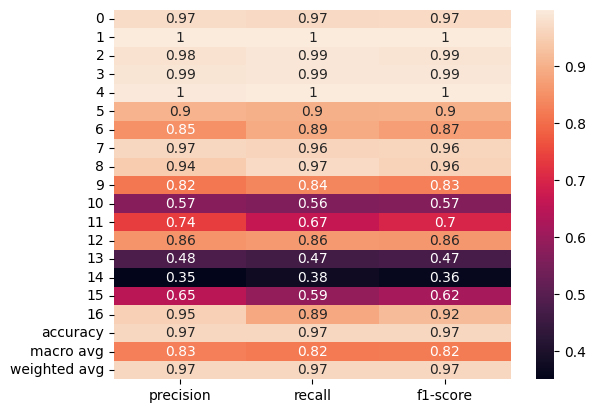

In [36]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 40)
dt.fit(X_train, y_train)

classificationdt = eval_metrics(dt, X_test , y_test)

### KNN

In [41]:
knn = KNeighborsClassifier()

k_range = [1,3,5,7,9,11,13,15,17,19,21]
weight_options = ['uniform', 'distance']
parameter_grid = dict(n_neighbors=k_range, weights=weight_options)


grid_search = GridSearchCV(knn, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 22 candidates, totalling 110 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.957 total time= 2.0min
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.957 total time= 2.1min
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.958 total time= 2.1min
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.958 total time= 2.1min
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.957 total time= 2.1min
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.957 total time= 1.9min
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.957 total time= 2.0min
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.958 total time= 2.0min
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.958 total time= 2.0min
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.957 total time= 2.0min
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.955 total time= 2.3min
[CV 2/5] END ....n_neighbors=3, weights=uniform

In [47]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
knn.fit(X_train, y_train)
eval_metrics(knn, X_train , y_train)
eval_metrics(knn, X_test , y_test)


Model Accuracy:
 0.9999923784089472

Confusion matrix:
 [[336658      0      0      0      0      0      2      0      0      0
       0      0      0      0      0      0      0]
 [     0 113009      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0  42282      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     1      0      0  40221      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0  37793      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0      0  18819      0      0      0      0
       0      0      0      0      0      0      0]
 [     1      0      0      0      0      0  18517      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0  17707      0      0
   

In [42]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, y_train)
eval_metrics(knn, X_train , y_train)
eval_metrics(knn, X_test , y_test)


Model Accuracy:
 0.9999923784089472

Confusion matrix:
 [[336658      0      0      0      0      0      2      0      0      0
       0      0      0      0      0      0      0]
 [     0 113009      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0  42282      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     1      0      0  40221      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0  37793      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0      0  18819      0      0      0      0
       0      0      0      0      0      0      0]
 [     1      0      0      0      0      0  18517      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0  17707      0      0
   


Model Accuracy:
 0.9649529291254085

Confusion matrix:
 [[81782    27    89    54    67   324   721   217   639    64    65    37
     32    25    17     3     2]
 [    2 28250     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   31     0 10533     0     2     0     0     2     0     0     0     0
      2     0     0     0     0]
 [   40     0     1 10014     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0  9448     0     0     0     0     0     0     0
      0     0     0     0     0]
 [  577     0    10    34     0  4081     0     0     0     0     3     0
      0     0     0     0     0]
 [  369     0     1     0     0     0  4259     0     0     0     0     1
      0     0     0     0     0]
 [  151     0     1     1     0     1     0  4198    71     0     1     0
      3     0     0     0     0]
 [   64     0     0     0     0     0     0    32  3391     0     0     0
      0     0

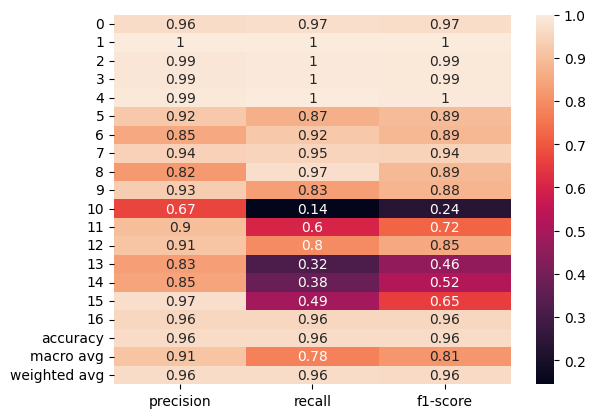

In [37]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, y_train)

classificationknn = eval_metrics(knn, X_test , y_test)

### LR

In [42]:
clf = LogisticRegression()

parameter_grid = {'C':[1, 10, 100, 1000]}

grid_search = GridSearchCV(clf, param_grid = parameter_grid,
                          cv = StratifiedKFold(7), verbose = 2)

model = grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 4 candidates, totalling 28 fits
[CV] END ................................................C=1; total time=  39.4s
[CV] END ................................................C=1; total time=  39.4s
[CV] END ................................................C=1; total time=  34.7s
[CV] END ................................................C=1; total time=  16.3s
[CV] END ................................................C=1; total time=  16.3s
[CV] END ................................................C=1; total time=  22.6s
[CV] END ................................................C=1; total time=  37.2s
[CV] END ...............................................C=10; total time=  38.4s
[CV] END ...............................................C=10; total time=  37.6s
[CV] END ...............................................C=10; total time=  38.1s
[CV] END ...............................................C=10; total time=  38.4s
[CV] END ........................................

In [43]:
clf = LogisticRegression( C = 1000, penalty = 'l2')
clf.fit(X_train, y_train)
eval_metrics(clf, X_train , y_train)
eval_metrics(clf, X_test , y_test)


Model Accuracy:
 0.9406460975167332

Confusion matrix:
 [[330549    159    914    193    521   1461    906    580    407     22
     114    348    201    204     42     18     21]
 [    10 112912      0      0      0      0     87      0      0      0
       0      0      0      0      0      0      0]
 [  2152      0  35618   3930    405     21      0    100      1      0
       0      4     42      9      0      0      0]
 [   136      0   2465  36885      0    721      0      0      1      0
       0      6      1      7      0      0      0]
 [   117      0    266      0  37410      0      0      0      0      0
       0      0      0      0      0      0      0]
 [  1876      0    948    564      3  15403      0      0      0      0
       5      3      2      7      0      8      0]
 [  8366      0      0      0     24      0  10118      0      0      0
       0     10      0      0      0      0      0]
 [   693      0     30      2     62      0      0  16346    573      0
   


Model Accuracy:
 0.9417040632164285

Confusion matrix:
 [[82584    32   201    51   143   394   260   140   114     9    34    76
     54    54    11     2     6]
 [    4 28228     0     0     0     0    20     0     0     0     0     0
      0     0     0     0     0]
 [  535     0  8905  1002    86     7     0    19     0     0     0     1
     14     1     0     0     0]
 [   38     0   577  9270     0   168     0     0     0     0     0     0
      0     2     0     0     0]
 [   32     0    84     0  9332     0     0     0     0     0     0     0
      0     0     0     0     0]
 [  403     0   228   113     1  3955     0     0     0     0     3     0
      0     2     0     0     0]
 [ 2053     0     0     0     8     0  2562     0     0     0     0     7
      0     0     0     0     0]
 [  180     0     9     1    17     0     0  4078   141     0     0     0
      1     0     0     0     0]
 [   34     0     0     0     6     0     0   188  3259     0     0     0
      0     0

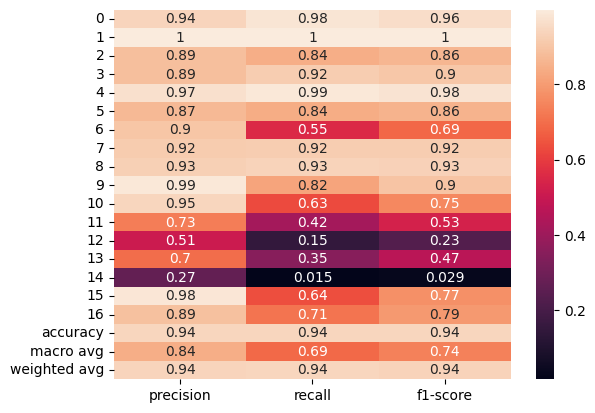

In [38]:
clf = LogisticRegression( C = 1000, penalty = 'l2')
clf.fit(X_train, y_train)

classificationclf = eval_metrics(clf, X_test , y_test)

### SVM

In [36]:
svc=svm.LinearSVC()

parameter_grid = {'C': [0.1, 1, 10, 100],
              'loss': ['hinge','squared_hinge']}

grid_search = GridSearchCV(svc, param_grid = parameter_grid,
                          cv =StratifiedKFold(7), verbose = 3)

model = grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 8 candidates, totalling 56 fits
[CV 1/7] END .................C=0.1, loss=hinge;, score=0.968 total time=11.8min
[CV 2/7] END .................C=0.1, loss=hinge;, score=0.968 total time=12.2min
[CV 3/7] END .................C=0.1, loss=hinge;, score=0.968 total time=14.5min
[CV 4/7] END .................C=0.1, loss=hinge;, score=0.968 total time=13.5min
[CV 5/7] END .................C=0.1, loss=hinge;, score=0.967 total time=15.1min
[CV 6/7] END .................C=0.1, loss=hinge;, score=0.967 total time=23.7min
[CV 7/7] END .................C=0.1, loss=hinge;, score=0.967 total time=19.0min
[CV 1/7] END .........C=0.1, loss=squared_hinge;, score=0.968 total time=16.7min
[CV 2/7] END .........C=0.1, loss=squared_hinge;, score=0.968 total time=16.2min
[CV 3/7] END .........C=0.1, loss=squared_hinge;, score=0.968 total time=15.5min
[CV 4/7] END .........C=0.1, loss=squared_hinge;, score=0.968 total time=15.4min
[CV 5/7] END .........C=0.1, loss=squared_hinge;,

In [44]:
svc=svm.LinearSVC(C = 10, loss = 'hinge')
svc.fit(X_train, y_train)
eval_metrics(svc, X_train, y_train)
eval_metrics(svc, X_test, y_test)


Model Accuracy:
 0.923537149921269

Confusion matrix:
 [[326451    140    967    345    101    897    336     95    151     12
      28    588    468   5891     98     34     58]
 [    90 112917      0      0      0      0      0      0      0      0
       0      0      0      2      0      0      0]
 [  4028      0  30111   5235    469      0      0    178      5      0
       0      5    455   1786      5      5      0]
 [    62      0   1467  37661      0    465      4     11      0      0
       0      0      0    543      9      0      0]
 [   319      0      1      0  37473      0      0      0      0      0
       0      0      0      0      0      0      0]
 [  2972      0    486    232     19  14835     41      4      0      0
      14      4      0    210      1      1      0]
 [  9427      0     10      5      0      0   9059      0      0      0
       0     13      0      4      0      0      0]
 [   712      0     10      2     29      0      0  16852     63      0
    


Model Accuracy:
 0.9284547095263646

Confusion matrix:
 [[81535    32   239    95    36   251    58    26    51     7     1   141
     85  1572    12    10    14]
 [   42 28210     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [ 1015     0  7673  1087    98     0     0    46     1     0     0     1
    121   523     1     4     0]
 [   19     0   444  9311     0   133     1     3     0     0     0     0
      0   127     1    16     0]
 [   80     0     0     0  9368     0     0     0     0     0     0     0
      0     0     0     0     0]
 [  815     0   155    81     2  3566    18     4     0     0     0     1
      0    63     0     0     0]
 [ 2339     0     3     0     0     0  2281     0     0     0     0     7
      0     0     0     0     0]
 [  155     0     1     1     8     0     0  4239    20     0     0     0
      1     2     0     0     0]
 [    4     0     0     1     3     0     0   166  3315     0     0     0
      0     0

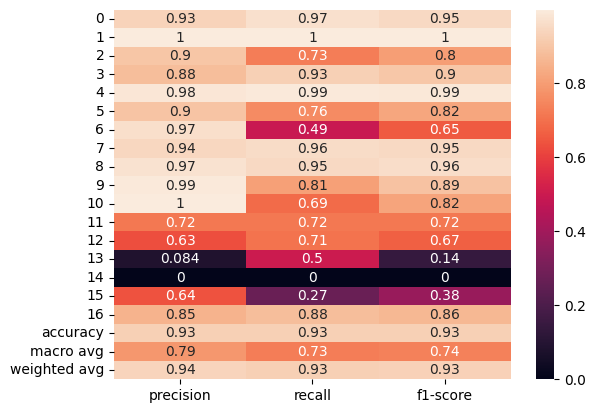

In [39]:
svc=svm.LinearSVC(C = 10, loss = 'hinge')
svc.fit(X_train, y_train)

classificationsvm = eval_metrics(svc, X_test , y_test)

### NB

In [156]:
gnb_clf = GaussianNB()

parameter_grid = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
                 }

grid_search = GridSearchCV(gnb_clf, param_grid = parameter_grid, 
                          cv =StratifiedKFold(7), verbose = 2)

model = grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 14 candidates, totalling 98 fits
[CV] END .................................var_smoothing=0.01; total time=   0.8s
[CV] END .................................var_smoothing=0.01; total time=   0.8s
[CV] END .................................var_smoothing=0.01; total time=   0.8s
[CV] END .................................var_smoothing=0.01; total time=   0.8s
[CV] END .................................var_smoothing=0.01; total time=   0.8s
[CV] END .................................var_smoothing=0.01; total time=   0.7s
[CV] END .................................var_smoothing=0.01; total time=   0.8s
[CV] END ................................var_smoothing=0.001; total time=   0.8s
[CV] END ................................var_smoothing=0.001; total time=   0.8s
[CV] END ................................var_smoothing=0.001; total time=   0.8s
[CV] END ................................var_smoothing=0.001; total time=   0.8s
[CV] END ................................var_smo

In [55]:
gnb = GaussianNB(var_smoothing= 1e-7)
gnb.fit(X_train, y_train)
eval_metrics(gnb, X_train , y_train)
eval_metrics(gnb, X_test , y_test)


Model Accuracy:
 0.5379593342387784

Confusion matrix:
 [[ 93517    839   2733    474   1763   5178 107581   5733   5634   3710
    3658   6084  41060  24297  27710   6014    675]
 [   447 111212      0      0      0      1     63      0      0      0
     163      4      0      0      0   1107     12]
 [   636      0  20655  15396   2257     32     16     17      5      0
      20      0   2008   1214     15     11      0]
 [   341      0   2506  36421      0    481     59    260      7      0
       0      0      6    141      0      0      0]
 [  1000      0   1757      0  33497      0      0      0     74      0
     603      0    599      0      0    263      0]
 [   852      0   1675   3032     11   9197     80      0      1     11
      82      7   2607   1105     60     69     30]
 [  1588      2     24      1      0      1  16446      2      0      6
      64    127      2      3      0    141    111]
 [   563      0     10      4      5     42      4  14698   1487     16
   


Model Accuracy:
 0.5400468269840496

Confusion matrix:
 [[23655   198   659   109   484  1266 27144  1547  1582   960  1259  1385
  10977  5691  5548  1539   162]
 [  175 27743     0     0     0     0    15     0     0     0     0    37
      0     0     0   281     1]
 [  165     0  5213  3834   500    10     2     3     0     0     5     0
    559   274     2     3     0]
 [   89     0   608  9100     0   146    11    71     2     0     0     0
      0    28     0     0     0]
 [  268     0   401     0  8464     0     0     7    14     0   162     0
    132     0     0     0     0]
 [  203     0   406   758     4  2302    14     0     0     0    22     3
    668   292     0    23    10]
 [  394     2     6     0     0     0  4113     1     0     1    17    35
      0     1     0    33    27]
 [  112     0    11     2     2    11     1  3704   358     1    22    25
    154     3     0    14     7]
 [   62     0     4     0     1     0     0   168  3157     0     6     0
      0     2

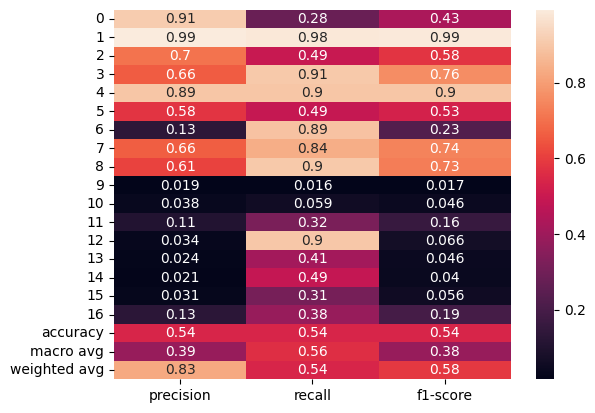

In [40]:
gnb = GaussianNB(var_smoothing= 1e-7)
gnb.fit(X_train, y_train)

classificationgnb = eval_metrics(gnb, X_test , y_test)

### XGBoost

In [61]:
xgb_model = xgb.XGBClassifier()

params = { 
    'model__max_depth': [ 3, 4, 5, 6 , 7],
    'model__learning_rate': [ 0.01, 0.03, 0.05, 0.1, 0.2 ],
    #"model__gamma":[0, 0.25, 0.5, 0.75, 1],
    'model__n_estimators': [50 ,100, 300, 500],
    #"model__subsample":[0.9],
    #"model__colsample_bytree":[0.5],
    #"model__early_stopping_rounds": [10], 
}


grid_search = GridSearchCV(xgb_model, param_grid = params, cv =StratifiedKFold(7), verbose = 3)
model = grid_search.fit(X_train, y_train)
print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 100 candidates, totalling 700 fits
[CV 1/7] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.980 total time= 1.9min
[CV 2/7] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.979 total time= 2.0min
[CV 3/7] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.980 total time= 2.0min
[CV 4/7] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.980 total time= 2.0min
[CV 5/7] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.980 total time= 2.2min
[CV 6/7] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.979 total time= 2.2min
[CV 7/7] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.980 total time= 2.2min
[CV 1/7] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.980 total time= 2.2min
[CV 2/7]

In [62]:
xgb_model = xgb.XGBClassifier(model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, model__learning_rate=0.01,
              model_max_depth=3, model_n_estimators=50,
              monotone_constraints=None, multi_strategy=None, n_estimators=None, ...)


Model Accuracy:
 0.9910400575582556

Confusion matrix:
 [[336015      0     32     14      0    190    305     15      8      2
      30     19      0     29      1      0      0]
 [     0 113009      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [    17      0  42257      0      0      0      0      0      0      0
       0      0      3      5      0      0      0]
 [    16      0      0  40206      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0  37793      0      0      0      0      0
       0      0      0      0      0      0      0]
 [   200      0      0      0      0  18615      0      0      0      3
       1      0      0      0      0      0      0]
 [  3697      0      0      0      0      0  14821      0      0      0
       0      0      0      0      0      0      0]
 [    11      0      0      1      0      0      0  17691      4      0
   

{'0': {'precision': 0.9847805444186537,
  'recall': 0.9980841204776332,
  'f1-score': 0.9913877038007399,
  'support': 336660.0},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 113009.0},
 '2': {'precision': 0.9992433020407198,
  'recall': 0.9994087318480678,
  'f1-score': 0.999326010098024,
  'support': 42282.0},
 '3': {'precision': 0.9995773562389677,
  'recall': 0.9996022077470041,
  'f1-score': 0.9995897818385232,
  'support': 40222.0},
 '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 37793.0},
 '5': {'precision': 0.9896331738437002,
  'recall': 0.989159891598916,
  'f1-score': 0.9893964761221399,
  'support': 18819.0},
 '6': {'precision': 0.979771269914722,
  'recall': 0.8003564099794794,
  'f1-score': 0.881022440184277,
  'support': 18518.0},
 '7': {'precision': 0.9984197753823579,
  'recall': 0.9990964025526627,
  'f1-score': 0.9987579743691074,
  'support': 17707.0},
 '8': {'precision': 0.9991399698989465,
  'recall': 0.9990683674931919,


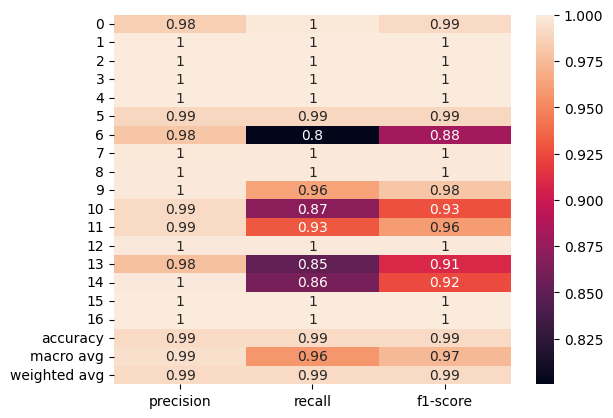

In [63]:
eval_metrics(xgb_model, X_train, y_train)


Model Accuracy:
 0.9800619481976489

Confusion matrix:
 [[83644    18    30    13     8   109   138    34    24     6    55    46
      1    30     3     6     0]
 [    1 28251     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   23     0 10524     0     0     4     0     4     0     0     0     0
     12     3     0     0     0]
 [   36     0     0 10012     0     4     0     0     0     0     0     0
      0     2     0     1     0]
 [    0     0     0     0  9448     0     0     0     0     0     0     0
      0     0     0     0     0]
 [  187     0     0     8     0  4508     0     0     0     0     1     0
      0     1     0     0     0]
 [ 1148     0     0     0     0     0  3479     0     0     0     0     3
      0     0     0     0     0]
 [   60     0     1     0     1     1     0  4331    31     0     0     0
      2     0     0     0     0]
 [   15     0     0     0     0     0     0    50  3424     0     0     0
      0     0

{'0': {'precision': 0.9704606102796148,
  'recall': 0.9938097784114537,
  'f1-score': 0.9819964192421707,
  'support': 84165.0},
 '1': {'precision': 0.9993632601082458,
  'recall': 0.9999646042758035,
  'f1-score': 0.9996638417579307,
  'support': 28252.0},
 '2': {'precision': 0.996307867083215,
  'recall': 0.9956480605487228,
  'f1-score': 0.9959778545402924,
  'support': 10570.0},
 '3': {'precision': 0.9960206923995225,
  'recall': 0.9957235206364993,
  'f1-score': 0.9958720843487342,
  'support': 10055.0},
 '4': {'precision': 0.9990483239928095,
  'recall': 1.0,
  'f1-score': 0.9995239354668076,
  'support': 9448.0},
 '5': {'precision': 0.9711331322705731,
  'recall': 0.9581296493092455,
  'f1-score': 0.9645875682037017,
  'support': 4705.0},
 '6': {'precision': 0.9615809839690437,
  'recall': 0.7514038876889849,
  'f1-score': 0.8435984481086325,
  'support': 4630.0},
 '7': {'precision': 0.9791996382545783,
  'recall': 0.9783148859272646,
  'f1-score': 0.9787570621468926,
  'support

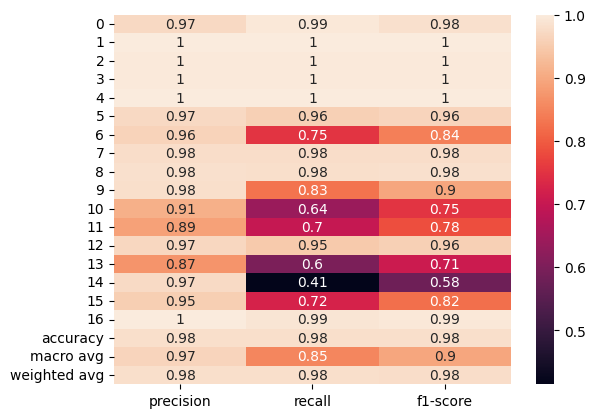

In [64]:
eval_metrics(xgb_model, X_test, y_test)

In [69]:
xgb_model = xgb.XGBClassifier()

params = { 
    'model__max_depth': [ 3],
    'model__learning_rate': [ 0.01, 0.1, 1 ],
    "model__gamma":[0, 0.25, 0.5, 0.75, 1],
    'model__n_estimators': [50 ,100, 300, 500],
    #"model__subsample":[0.9],
    #"model__colsample_bytree":[0.5],
    #"model__early_stopping_rounds": [10], 
}


grid_search = GridSearchCV(xgb_model, param_grid = params, cv =StratifiedKFold(5), verbose = 3)
model = grid_search.fit(X_train, y_train)
print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.979 total time= 1.8min
[CV 2/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.978 total time= 1.9min
[CV 3/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.979 total time= 2.0min
[CV 4/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.979 total time= 1.9min
[CV 5/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.979 total time= 2.0min
[CV 1/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.979 total time= 1.6min
[CV 2/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.978 total time= 3.2min
[CV 3/5] END


Model Accuracy:
 0.9901666232235977

Confusion matrix:
 [[336031      0     36     15      0    159    302     20     17      1
      20     16      1     42      0      0      0]
 [     0 113009      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [    12      0  42267      0      0      0      0      0      0      0
       0      0      0      3      0      0      0]
 [    10      0      0  40212      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0  37793      0      0      0      0      0
       0      0      0      0      0      0      0]
 [   209      0      0      0      0  18608      0      0      0      0
       2      0      0      0      0      0      0]
 [  4161      0      0      0      0      0  14356      0      0      0
       0      1      0      0      0      0      0]
 [    15      0      0      1      0      1      0  17684      6      0
   

{'0': {'precision': 0.9830871941301066,
  'recall': 0.9981316461712113,
  'f1-score': 0.9905522998738341,
  'support': 336660.0},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 113009.0},
 '2': {'precision': 0.9991017610211559,
  'recall': 0.9996452391088406,
  'f1-score': 0.9993734261765992,
  'support': 42282.0},
 '3': {'precision': 0.9995525727069351,
  'recall': 0.9997513798418776,
  'f1-score': 0.9996519663898971,
  'support': 40222.0},
 '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 37793.0},
 '5': {'precision': 0.9913163923072825,
  'recall': 0.9887879270949572,
  'f1-score': 0.990050545357808,
  'support': 18819.0},
 '6': {'precision': 0.9793301043727403,
  'recall': 0.7752457068797927,
  'f1-score': 0.8654188142387799,
  'support': 18518.0},
 '7': {'precision': 0.9981373821753119,
  'recall': 0.9987010786694528,
  'f1-score': 0.9984191508581752,
  'support': 17707.0},
 '8': {'precision': 0.9983530254206946,
  'recall': 0.999140031532177

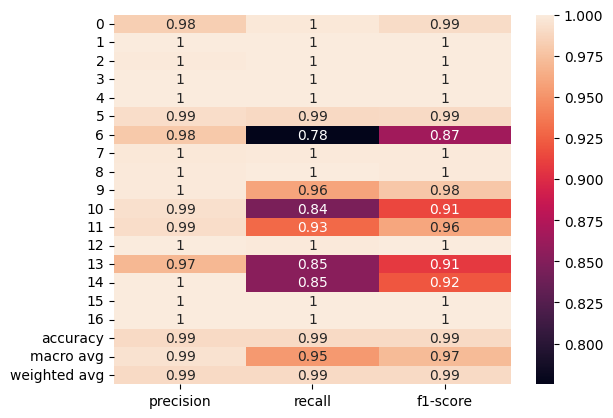

In [70]:
xgb_model = xgb.XGBClassifier(model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)
xgb_model.fit(X_train, y_train)
eval_metrics(xgb_model, X_train, y_train)


Model Accuracy:
 0.9802082825228038

Confusion matrix:
 [[83622    21    22    16     8   142   114    23    30     9    57    55
      1    35     8     2     0]
 [    0 28252     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   19     0 10539     1     0     0     0     1     0     0     0     0
      9     1     0     0     0]
 [   32     0     0 10007     0     6     1     0     0     0     0     2
      0     7     0     0     0]
 [    0     0     0     0  9448     0     0     0     0     0     0     0
      0     0     0     0     0]
 [  186     0     2     9     0  4500     0     0     0     1     6     0
      0     0     0     1     0]
 [ 1195     0     0     0     0     0  3435     0     0     0     0     0
      0     0     0     0     0]
 [   35     0     0     0     0     0     0  4358    31     0     0     0
      1     1     0     1     0]
 [   14     0     0     0     0     0     0    32  3443     0     0     0
      0     0

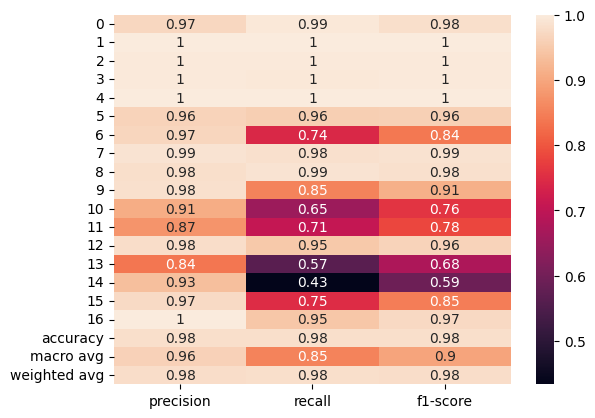

In [71]:
xgb_results_19 = eval_metrics(xgb_model, X_test, y_test)

### RF

In [47]:
rfc=RandomForestClassifier()


parameter_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth' : [30, 40],
    'criterion' :['entropy']
}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.978 total time=49.3min
[CV 2/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.978 total time=49.2min
[CV 3/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.977 total time=48.0min
[CV 4/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.978 total time=80.7min
[CV 5/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.977 total time=147.3min
[CV 1/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.978 total time=87.3min
[CV 2/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.978 total time=87.7min
[CV 3/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.978 total time=87.4min
[CV 4/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.978 total time=87.3min
[CV 5/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.97


Model Accuracy:
 0.9796107506950881

Confusion matrix:
 [[83788    24     7    16     1    93   155    10    32     1    10    19
      1     2     6     0     0]
 [    4 28248     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   53     0 10502     3     0     2     0     0     0     0     0     0
      9     1     0     0     0]
 [   47     0     0  9989     0    19     0     0     0     0     0     0
      0     0     0     0     0]
 [    1     0     0     0  9447     0     0     0     0     0     0     0
      0     0     0     0     0]
 [  349     0     0     5     0  4349     0     0     0     0     2     0
      0     0     0     0     0]
 [  541     0     0     0     0     0  4089     0     0     0     0     0
      0     0     0     0     0]
 [  123     0     0     2     0     1     0  4274    27     0     0     0
      0     0     0     0     0]
 [   26     0     0     0     0     0     0    47  3416     0     0     0
      0     0

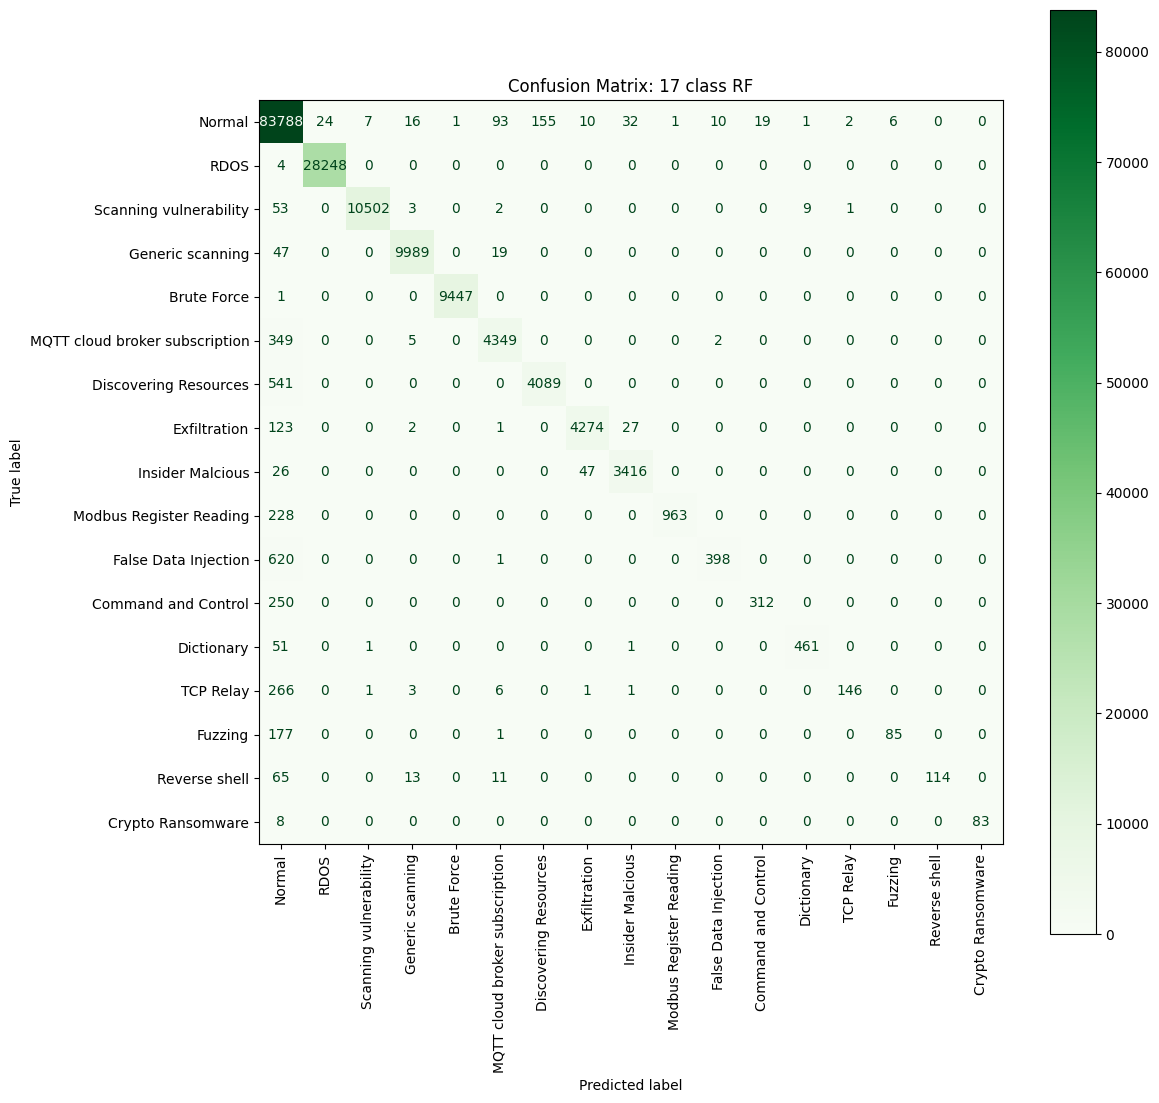


Classification report:
 {'0': {'precision': 0.9675623866877605, 'recall': 0.995520703380265, 'f1-score': 0.981342453239011, 'support': 84165.0}, '1': {'precision': 0.9991511035653651, 'recall': 0.9998584171032139, 'f1-score': 0.9995046351992074, 'support': 28252.0}, '2': {'precision': 0.9991437541623062, 'recall': 0.9935666982024598, 'f1-score': 0.9963474218490584, 'support': 10570.0}, '3': {'precision': 0.9958129797627355, 'recall': 0.9934361014420686, 'f1-score': 0.9946231205814996, 'support': 10055.0}, '4': {'precision': 0.9998941574936494, 'recall': 0.9998941574936494, 'f1-score': 0.9998941574936494, 'support': 9448.0}, '5': {'precision': 0.9701093018068258, 'recall': 0.924335812964931, 'f1-score': 0.9466695690030474, 'support': 4705.0}, '6': {'precision': 0.9634778510838832, 'recall': 0.8831533477321815, 'f1-score': 0.9215686274509804, 'support': 4630.0}, '7': {'precision': 0.9866112650046168, 'recall': 0.9654393494465778, 'f1-score': 0.9759104920653043, 'support': 4427.0}, '8': 

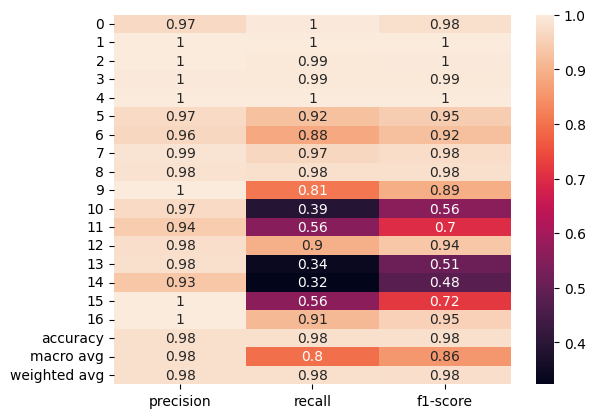

In [38]:
rfc=RandomForestClassifier(  criterion = 'entropy', max_depth =  40, n_estimators = 300)
rfc.fit(X_train, y_train)
rf_results_19 = eval_metrics(rfc, X_test , y_test,  attacks_19, "Confusion Matrix: 17 class RF")


Model Accuracy:
 0.999115895437868

Confusion matrix:
 [[336656      0      0      0      0      0      4      0      0      0
       0      0      0      0      0      0      0]
 [     0 113009      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0  42282      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0  40222      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0  37793      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0      0  18819      0      0      0      0
       0      0      0      0      0      0      0]
 [   486      0      0      0      0      0  18032      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0  17707      0      0
    

{'0': {'precision': 0.9982919770365801,
  'recall': 0.9999881185766055,
  'f1-score': 0.9991393279635313,
  'support': 336660.0},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 113009.0},
 '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 42282.0},
 '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 40222.0},
 '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 37793.0},
 '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18819.0},
 '6': {'precision': 0.9997782213351075,
  'recall': 0.9737552651474242,
  'f1-score': 0.9865951742627346,
  'support': 18518.0},
 '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17707.0},
 '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13954.0},
 '9': {'precision': 1.0,
  'recall': 0.997480050398992,
  'f1-score': 0.9987384356602187,
  'support': 4762.0},
 '10': {'precision': 1.0,
  'recall': 0.9955828220858896,
  'f1-score': 0.99778652

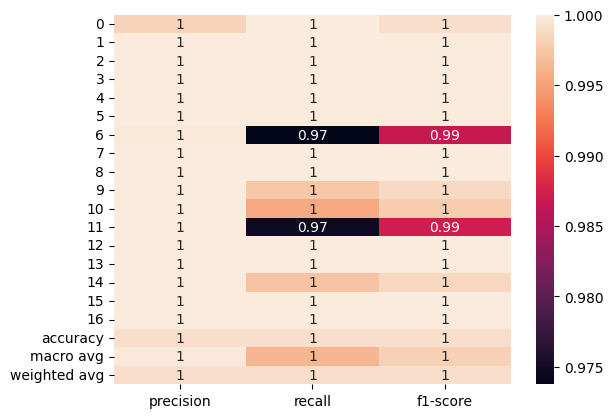

In [72]:
rfc=RandomForestClassifier(  criterion = 'entropy', max_depth =  26, n_estimators = 300)
rfc.fit(X_train, y_train)
eval_metrics(rfc, X_train , y_train)


Model Accuracy:
 0.9792327203551047

Confusion matrix:
 [[83788    21    13    14     6    91   144    25    33     3     9    13
      1     3     1     0     0]
 [    1 28251     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   55     0 10500     5     0     1     0     0     0     0     0     0
      9     0     0     0     0]
 [   55     0     0  9987     0    12     0     0     0     0     0     0
      0     1     0     0     0]
 [    0     0     0     0  9448     0     0     0     0     0     0     0
      0     0     0     0     0]
 [  365     0     0     3     0  4334     0     0     0     0     3     0
      0     0     0     0     0]
 [  633     0     0     0     0     0  3997     0     0     0     0     0
      0     0     0     0     0]
 [   99     0     0     1     0     0     0  4295    32     0     0     0
      0     0     0     0     0]
 [   24     0     0     0     0     0     0    34  3431     0     0     0
      0     0

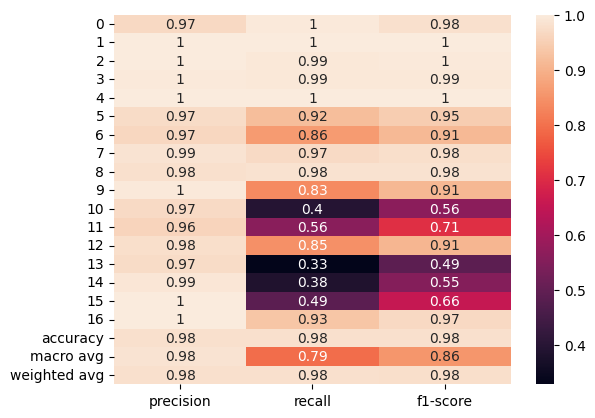

In [73]:
rf_results_19 = eval_metrics(rfc, X_test , y_test)

### Ensemble

In [74]:
xgb_model_19 = xgb.XGBClassifier(model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)
rfc_19 =RandomForestClassifier(  criterion = 'entropy', max_depth =  26, n_estimators = 300)
dt_19 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 40)


Model Accuracy:
 0.9911269436962583

Confusion matrix:
 [[336655      0      0      0      0      0      5      0      0      0
       0      0      0      0      0      0      0]
 [     0 113009      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [    12      0  42270      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [    10      0      0  40212      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0  37793      0      0      0      0      0
       0      0      0      0      0      0      0]
 [   209      0      0      0      0  18610      0      0      0      0
       0      0      0      0      0      0      0]
 [  4162      0      0      0      0      0  14356      0      0      0
       0      0      0      0      0      0      0]
 [    15      0      0      1      0      1      0  17690      0      0
   

{'0': {'precision': 0.9831007878706467,
  'recall': 0.9999851482207568,
  'f1-score': 0.9914710897626572,
  'support': 336660.0},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 113009.0},
 '2': {'precision': 0.9999526873580621,
  'recall': 0.9997161912870726,
  'f1-score': 0.9998344253376541,
  'support': 42282.0},
 '3': {'precision': 0.9999254009697874,
  'recall': 0.9997513798418776,
  'f1-score': 0.9998383828337705,
  'support': 40222.0},
 '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 37793.0},
 '5': {'precision': 0.9997851079832384,
  'recall': 0.9888942026675168,
  'f1-score': 0.9943098335693105,
  'support': 18819.0},
 '6': {'precision': 0.9995822308870631,
  'recall': 0.7752457068797927,
  'f1-score': 0.87323600973236,
  'support': 18518.0},
 '7': {'precision': 0.9992656611873694,
  'recall': 0.9990399277122042,
  'f1-score': 0.9991527817000847,
  'support': 17707.0},
 '8': {'precision': 1.0,
  'recall': 0.9991400315321771,
  'f1-score':

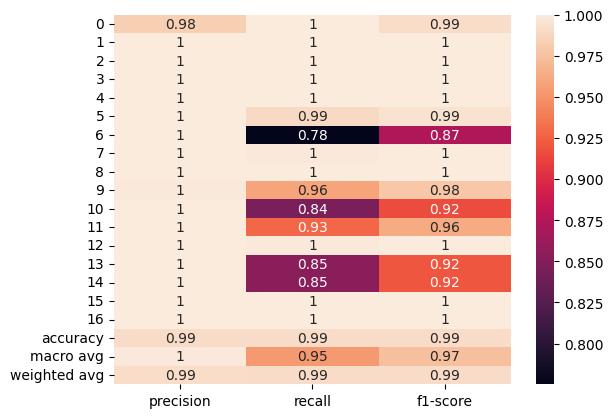

In [80]:
xgb_rf_19 = VotingClassifier(estimators=[("xgb" , xgb_model_19), ("rf", rfc_19)])
xgb_rf_19.fit(X_train, y_train)
eval_metrics(xgb_rf_19, X_train, y_train)



Model Accuracy:
 0.9759828788839569

Confusion matrix:
 [[83938    19    11     8     3    74    59    12    15     3     7    13
      0     2     1     0     0]
 [    1 28251     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   58     0 10504     1     0     0     0     0     0     0     0     0
      7     0     0     0     0]
 [   58     0     0  9990     0     6     0     0     0     0     0     0
      0     1     0     0     0]
 [    0     0     0     0  9448     0     0     0     0     0     0     0
      0     0     0     0     0]
 [  377     0     2    10     0  4313     0     0     0     0     3     0
      0     0     0     0     0]
 [ 1276     0     0     0     0     0  3354     0     0     0     0     0
      0     0     0     0     0]
 [   98     0     0     1     0     0     0  4310    18     0     0     0
      0     0     0     0     0]
 [   30     0     0     0     0     0     0    40  3419     0     0     0
      0     0

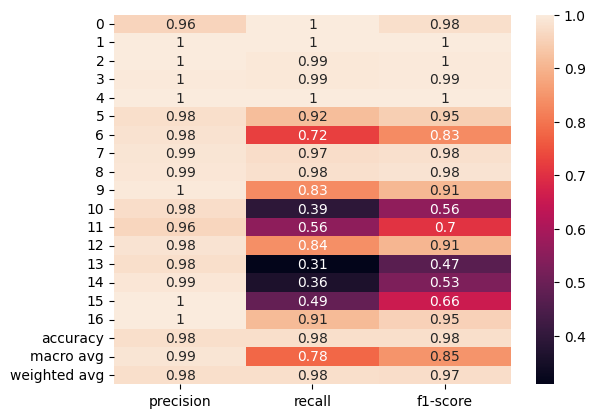

In [81]:
xgb_rf_results_19 = eval_metrics(xgb_rf_19, X_test, y_test)


Model Accuracy:
 0.9991860140755544

Confusion matrix:
 [[336655      0      0      0      0      0      5      0      0      0
       0      0      0      0      0      0      0]
 [     0 113009      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0  42282      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0  40222      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0  37793      0      0      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0      0  18819      0      0      0      0
       0      0      0      0      0      0      0]
 [   463      0      0      0      0      0  18055      0      0      0
       0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0  17707      0      0
   

{'0': {'precision': 0.9984311236594856,
  'recall': 0.9999851482207568,
  'f1-score': 0.9992075317135717,
  'support': 336660.0},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 113009.0},
 '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 42282.0},
 '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 40222.0},
 '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 37793.0},
 '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18819.0},
 '6': {'precision': 0.9997231450719822,
  'recall': 0.9749972999243979,
  'f1-score': 0.9872054240253704,
  'support': 18518.0},
 '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17707.0},
 '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13954.0},
 '9': {'precision': 1.0,
  'recall': 0.999160016799664,
  'f1-score': 0.9995798319327731,
  'support': 4762.0},
 '10': {'precision': 1.0,
  'recall': 0.9973006134969326,
  'f1-score': 0.99864848

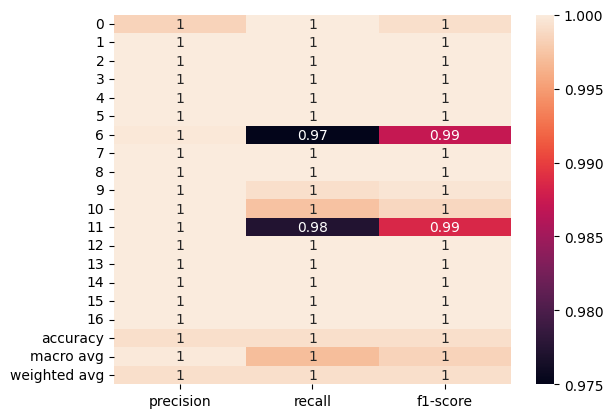

In [78]:
xgb_rf_dt_19 = VotingClassifier(estimators=[("xgb" , xgb_model_19), ("rf", rfc_19), ("dt", dt_19)])
xgb_rf_dt_19.fit(X_train, y_train)
eval_metrics(xgb_rf_dt_19, X_train, y_train)



Model Accuracy:
 0.9815984586117751

Confusion matrix:
 [[83753    21    10    11     5    96   144    15    27     5    29    32
      0    14     3     0     0]
 [    1 28251     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   48     0 10510     2     0     1     0     1     0     0     0     0
      8     0     0     0     0]
 [   52     0     0  9991     0     9     0     0     0     0     0     0
      0     3     0     0     0]
 [    0     0     0     0  9448     0     0     0     0     0     0     0
      0     0     0     0     0]
 [  274     0     0     6     0  4421     0     0     0     0     4     0
      0     0     0     0     0]
 [  641     0     0     0     0     0  3989     0     0     0     0     0
      0     0     0     0     0]
 [   70     0     0     1     0     0     0  4325    29     0     0     0
      0     1     0     0     1]
 [   20     0     0     0     0     0     0    29  3439     0     0     0
      0     0

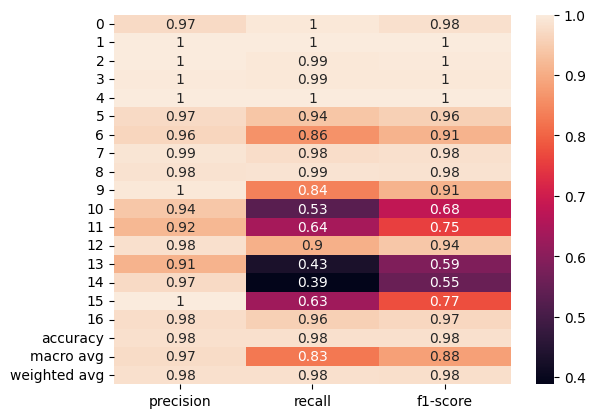

In [79]:
xgb_rf_dt_results_19 =eval_metrics(xgb_rf_dt_19,X_test, y_test)


### Graph F1-Score

In [91]:
r = range(0,17)
attacks = ["Normal", "RDOS" , "Scanning vulnerability", "Generic scanning", "Brute Force", "MQTT cloud broker subscription" , "Discovering Resources", 
               "Exfiltration", "Insider Malcious", "Modbus Register Reading", "False Data Injection", "Command and Control", "Dictionary",
               "TCP Relay", "Fuzzing" , "Reverse shell" , "Crypto Ransomware"]

l = []


for index in r:
    l1 = list() 
    l1.append(attacks[index])
    l1.append(classificationdt[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationknn[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationsvm[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationclf[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationgnb[str(index)]['f1-score'])
    print(l1)
    l.append(l1)
print(l)

df = pd.DataFrame(l)
df.rename(columns = {0: "class", 1: "DT", 2: "KNN", 3: "SVM",4: "LR", 5: "NB"}, inplace = True)

df

['Normal', 0.9707876673592218]
['Normal', 0.9707876673592218, 0.9676510956505276]
['Normal', 0.9707876673592218, 0.9676510956505276, 0.9507456943294581]
['Normal', 0.9707876673592218, 0.9676510956505276, 0.9507456943294581, 0.9609383181484972]
['Normal', 0.9707876673592218, 0.9676510956505276, 0.9507456943294581, 0.9609383181484972, 0.42948962361784404]
['RDOS', 0.9995045650789157]
['RDOS', 0.9995045650789157, 0.9994869889791079]
['RDOS', 0.9995045650789157, 0.9994869889791079, 0.9986901263851029]
['RDOS', 0.9995045650789157, 0.9994869889791079, 0.9986901263851029, 0.9989913825137579]
['RDOS', 0.9995045650789157, 0.9994869889791079, 0.9986901263851029, 0.9989913825137579, 0.9873832191476111]
['Scanning vulnerability', 0.9861451460885957]
['Scanning vulnerability', 0.9861451460885957, 0.9929766674522743]
['Scanning vulnerability', 0.9861451460885957, 0.9929766674522743, 0.8033713747251597]
['Scanning vulnerability', 0.9861451460885957, 0.9929766674522743, 0.8033713747251597, 0.863222179

class        DT       KNN       SVM        LR  \
0                           Normal  0.970788  0.967651  0.950746  0.960938   
1                             RDOS  0.999505  0.999487  0.998690  0.998991   
2           Scanning vulnerability  0.986145  0.992977  0.803371  0.863222   
3                 Generic scanning  0.989621  0.992615  0.901704  0.903993   
4                      Brute Force  0.998309  0.996362  0.987977  0.979840   
5   MQTT cloud broker subscription  0.902525  0.893878  0.821754  0.855598   
6            Discovering Resources  0.870913  0.886092  0.652740  0.685210   
7                     Exfiltration  0.963760  0.944963  0.950981  0.919400   
8                 Insider Malcious  0.957468  0.889559  0.961706  0.930345   
9          Modbus Register Reading  0.826069  0.878828  0.889713  0.898072   
10            False Data Injection  0.567460  0.237288  0.816019  0.753982   
11             Command and Control  0.699719  0.720682  0.715939  0.530612   
12                      Dictionary  0.860465  0.850312  0.666667  0.229261   
13                       TCP Relay  0.474251  0.458120  0.143676  0.467085   
14                         Fuzzing  0.363303  0.521053  0.000000  0.028777   
15                   Reverse shell  0.618557  0.653595  0.380623  0.772455   
16               Crypto Ransomware  0.920455  0.956044  0.864865  0.792683   

          NB  
0   0.429490  
1   0.987383  
2   0.580189  
3   0.761538  
4   0.895046  
5   0.530782  
6   0.228665  
7   0.740356  
8   0.729099  
9   0.017463  
10  0.046296  
11  0.160714  
12  0.066194  
13  0.046026  
14  0.039715  
15  0.056325  
16  0.194444

In [7]:
list2 = [['Normal', 0.9707876673592218, 0.9676510956505276, 0.9507456943294581, 0.9609383181484972, 0.42948962361784404], ['RDOS', 0.9995045650789157, 0.9994869889791079, 0.9986901263851029, 0.9989913825137579, 0.9873832191476111], ['Scanning vulnerability', 0.9861451460885957, 0.9929766674522743, 0.8033713747251597, 0.8632221791392013, 0.580189204229271], ['Generic scanning', 0.9896210954958533, 0.9926153541160728, 0.9017044354057718, 0.9039933687649324, 0.7615381396711159], ['Brute Force', 0.99830866807611, 0.9963617189559716, 0.9879772199957815, 0.9798404031919362, 0.8950457357373235], ['MQTT cloud broker subscription', 0.9025247682965805, 0.8938779980286935, 0.8217536582555593, 0.8555976203353164, 0.5307816462992851], ['Discovering Resources', 0.8709133094283906, 0.886091750754187, 0.652740020031478, 0.6852099491842739, 0.2286651470506477], ['Exfiltration', 0.9637599093997735, 0.9449634214969049, 0.9509814918676388, 0.9194002930898433, 0.7403557865280831], ['Insider Malcious', 0.9574678536102869, 0.8895592864637986, 0.9617058311575283, 0.9303454182129602, 0.7290993071593533], ['Modbus Register Reading', 0.8260689082606891, 0.8788282290279626, 0.8897126969416127, 0.8980716253443525, 0.017463235294117647], ['False Data Injection', 0.5674603174603174, 0.23728813559322035, 0.81601857225769, 0.7539823008849558, 0.046296296296296294], ['Command and Control', 0.6997193638914874, 0.720682302771855, 0.715939447907391, 0.5306122448979592, 0.16071428571428575], ['Dictionary', 0.8604651162790697, 0.8503118503118502, 0.6666666666666667, 0.2292609351432881, 0.06619385342789598], ['TCP Relay', 0.47425149700598807, 0.45811965811965816, 0.14367622259696458, 0.4670846394984326, 0.04602565798174845], ['Fuzzing', 0.363302752293578, 0.5210526315789473, 0.0, 0.028776978417266185, 0.03971455165994415], ['Reverse shell', 0.6185567010309279, 0.6535947712418301, 0.3806228373702422, 0.7724550898203594, 0.05632543585158695], ['Crypto Ransomware', 0.9204545454545454, 0.9560439560439561, 0.8648648648648649, 0.7926829268292682, 0.19444444444444445]]

df = pd.DataFrame(list2)
df.rename(columns = {0: "class", 1: "DT", 2: "KNN", 3: "SVM",4: "LR", 5: "NB"}, inplace = True)

df

df.to_csv("data.csv")

In [39]:
r = range(0,17)
attacks = ["Normal", "RDOS" , "Scanning vulnerability", "Generic scanning", "Brute Force", "MQTT cloud broker subscription" , "Discovering Resources", 
               "Exfiltration", "Insider Malcious", "Modbus Register Reading", "False Data Injection", "Command and Control", "Dictionary",
               "TCP Relay", "Fuzzing" , "Reverse shell" , "Crypto Ransomware"]


l = []


for index in r:
    l1 = list() 
    l1.append(attacks[index])
    l1.append(rf_results_19[str(index)]['f1-score'])
    print(l1)
    l.append(l1)
print(l)

new_data = pd.DataFrame(l)
new_data.rename(columns = {0: "class", 1: "RF"}, inplace = True)

new_data

['Normal', 0.981342453239011]
['RDOS', 0.9995046351992074]
['Scanning vulnerability', 0.9963474218490584]
['Generic scanning', 0.9946231205814996]
['Brute Force', 0.9998941574936494]
['MQTT cloud broker subscription', 0.9466695690030474]
['Discovering Resources', 0.9215686274509804]
['Exfiltration', 0.9759104920653043]
['Insider Malcious', 0.9807637094458801]
['Modbus Register Reading', 0.8937354988399072]
['False Data Injection', 0.5570328901329601]
['Command and Control', 0.6987681970884658]
['Dictionary', 0.9360406091370559]
['TCP Relay', 0.5095986038394416]
['Fuzzing', 0.480225988700565]
['Reverse shell', 0.7192429022082019]
['Crypto Ransomware', 0.9540229885057472]
[['Normal', 0.981342453239011], ['RDOS', 0.9995046351992074], ['Scanning vulnerability', 0.9963474218490584], ['Generic scanning', 0.9946231205814996], ['Brute Force', 0.9998941574936494], ['MQTT cloud broker subscription', 0.9466695690030474], ['Discovering Resources', 0.9215686274509804], ['Exfiltration', 0.9759104920

class        RF
0                           Normal  0.981342
1                             RDOS  0.999505
2           Scanning vulnerability  0.996347
3                 Generic scanning  0.994623
4                      Brute Force  0.999894
5   MQTT cloud broker subscription  0.946670
6            Discovering Resources  0.921569
7                     Exfiltration  0.975910
8                 Insider Malcious  0.980764
9          Modbus Register Reading  0.893735
10            False Data Injection  0.557033
11             Command and Control  0.698768
12                      Dictionary  0.936041
13                       TCP Relay  0.509599
14                         Fuzzing  0.480226
15                   Reverse shell  0.719243
16               Crypto Ransomware  0.954023

In [40]:
f1_scores_file = pd.read_csv("results/XIIOTID/data_19_class.csv")
f1_scores_file
f1_scores_file["RF"] = new_data["RF"]
f1_scores_file.to_csv("results/XIIOTID/data_19_class.csv")
f1_scores_file

Unnamed: 0                           class        DT       KNN       SVM  \
0            0                          Normal  0.970788  0.967651  0.950746   
1            1                            RDOS  0.999505  0.999487  0.998690   
2            2          Scanning vulnerability  0.986145  0.992977  0.803371   
3            3                Generic scanning  0.989621  0.992615  0.901704   
4            4                     Brute Force  0.998309  0.996362  0.987977   
5            5  MQTT cloud broker subscription  0.902525  0.893878  0.821754   
6            6           Discovering Resources  0.870913  0.886092  0.652740   
7            7                    Exfiltration  0.963760  0.944963  0.950981   
8            8                Insider Malcious  0.957468  0.889559  0.961706   
9            9         Modbus Register Reading  0.826069  0.878828  0.889713   
10          10            False Data Injection  0.567460  0.237288  0.816019   
11          11             Command and Control  0.699719  0.720682  0.715939   
12          12                      Dictionary  0.860465  0.850312  0.666667   
13          13                       TCP Relay  0.474251  0.458120  0.143676   
14          14                         Fuzzing  0.363303  0.521053  0.000000   
15          15                   Reverse shell  0.618557  0.653595  0.380623   
16          16               Crypto Ransomware  0.920455  0.956044  0.864865   

          LR        NB        RF       XGB    XGB_RF  XGB_RF_DT  
0   0.960938  0.429490  0.981342  0.981980  0.977831   0.983091  
1   0.998991  0.987383  0.999505  0.999628  0.999646   0.999611  
2   0.863222  0.580189  0.996347  0.996973  0.996017   0.996445  
3   0.903993  0.761538  0.994623  0.995672  0.994871   0.995020  
4   0.979840  0.895046  0.999894  0.999577  0.999841   0.999735  
5   0.855598  0.530782  0.946670  0.960000  0.946456   0.955995  
6   0.685210  0.228665  0.921569  0.839751  0.834017   0.910315  
7   0.919400  0.740356  0.975910  0.985638  0.980660   0.983178  
8   0.930345  0.729099  0.980764  0.984277  0.984593   0.984681  
9   0.898072  0.017463  0.893735  0.913669  0.908093   0.909754  
10  0.753982  0.046296  0.557033  0.760274  0.557814   0.678392  
11  0.530612  0.160714  0.698768  0.781496  0.703495   0.754717  
12  0.229261  0.066194  0.936041  0.962451  0.905462   0.942249  
13  0.467085  0.046026  0.509599  0.675105  0.469534   0.585600  
14  0.028777  0.039715  0.480226  0.592208  0.529248   0.554348  
15  0.772455  0.056325  0.719243  0.846797  0.655629   0.773414  
16  0.792683  0.194444  0.954023  0.971751  0.954023   0.966667

In [83]:
r = range(0,17)
attacks = ["Normal", "RDOS" , "Scanning vulnerability", "Generic scanning", "Brute Force", "MQTT cloud broker subscription" , "Discovering Resources", 
               "Exfiltration", "Insider Malcious", "Modbus Register Reading", "False Data Injection", "Command and Control", "Dictionary",
               "TCP Relay", "Fuzzing" , "Reverse shell" , "Crypto Ransomware"]


l = []


for index in r:
    l1 = list() 
    l1.append(attacks[index])
    l1.append(rf_results_19[str(index)]['f1-score'])
    print(l1)
    l1.append(xgb_results_19[str(index)]['f1-score'])
    print(l1)
    l1.append(xgb_rf_results_19[str(index)]['f1-score'])
    print(l1)
    l1.append(xgb_rf_dt_results_19[str(index)]['f1-score'])
    print(l1)
    l.append(l1)
print(l)

new_data = pd.DataFrame(l)
new_data.rename(columns = {0: "class", 1: "RF", 2: "XGB", 3:"XGB_RF", 4: "XGB_RF_DT"}, inplace = True)

new_data

['Normal', 0.9809058874489284]
['Normal', 0.9809058874489284, 0.9819802363882968]
['Normal', 0.9809058874489284, 0.9819802363882968, 0.9778311063477826]
['Normal', 0.9809058874489284, 0.9819802363882968, 0.9778311063477826, 0.9830914330318627]
['RDOS', 0.9996107847993773]
['RDOS', 0.9996107847993773, 0.9996284829721362]
['RDOS', 0.9996107847993773, 0.9996284829721362, 0.9996461554792824]
['RDOS', 0.9996107847993773, 0.9996284829721362, 0.9996461554792824, 0.9996107847993773]
['Scanning vulnerability', 0.9959214644788011]
['Scanning vulnerability', 0.9959214644788011, 0.9969728502506858]
['Scanning vulnerability', 0.9959214644788011, 0.9969728502506858, 0.9960174473734117]
['Scanning vulnerability', 0.9959214644788011, 0.9969728502506858, 0.9960174473734117, 0.9964446551315478]
['Generic scanning', 0.9945230033857798]
['Generic scanning', 0.9945230033857798, 0.9956718571215362]
['Generic scanning', 0.9945230033857798, 0.9956718571215362, 0.9948712841706916]
['Generic scanning', 0.994523

class        RF       XGB    XGB_RF  XGB_RF_DT
0                           Normal  0.980906  0.981980  0.977831   0.983091
1                             RDOS  0.999611  0.999628  0.999646   0.999611
2           Scanning vulnerability  0.995921  0.996973  0.996017   0.996445
3                 Generic scanning  0.994523  0.995672  0.994871   0.995020
4                      Brute Force  0.999683  0.999577  0.999841   0.999735
5   MQTT cloud broker subscription  0.946392  0.960000  0.946456   0.955995
6            Discovering Resources  0.911413  0.839751  0.834017   0.910315
7                     Exfiltration  0.978026  0.985638  0.980660   0.983178
8                 Insider Malcious  0.981969  0.984277  0.984593   0.984681
9          Modbus Register Reading  0.908592  0.913669  0.908093   0.909754
10            False Data Injection  0.562064  0.760274  0.557814   0.678392
11             Command and Control  0.707865  0.781496  0.703495   0.754717
12                      Dictionary  0.907195  0.962451  0.905462   0.942249
13                       TCP Relay  0.490300  0.675105  0.469534   0.585600
14                         Fuzzing  0.553425  0.592208  0.529248   0.554348
15                   Reverse shell  0.655629  0.846797  0.655629   0.773414
16               Crypto Ransomware  0.965909  0.971751  0.954023   0.966667

In [92]:
f1_scores_file = pd.read_csv("results/data.csv")
f1_scores_file

Unnamed: 0                           class        DT       KNN       SVM  \
0            0                          Normal  0.970788  0.967651  0.950746   
1            1                            RDOS  0.999505  0.999487  0.998690   
2            2          Scanning vulnerability  0.986145  0.992977  0.803371   
3            3                Generic scanning  0.989621  0.992615  0.901704   
4            4                     Brute Force  0.998309  0.996362  0.987977   
5            5  MQTT cloud broker subscription  0.902525  0.893878  0.821754   
6            6           Discovering Resources  0.870913  0.886092  0.652740   
7            7                    Exfiltration  0.963760  0.944963  0.950981   
8            8                Insider Malcious  0.957468  0.889559  0.961706   
9            9         Modbus Register Reading  0.826069  0.878828  0.889713   
10          10            False Data Injection  0.567460  0.237288  0.816019   
11          11             Command and Control  0.699719  0.720682  0.715939   
12          12                      Dictionary  0.860465  0.850312  0.666667   
13          13                       TCP Relay  0.474251  0.458120  0.143676   
14          14                         Fuzzing  0.363303  0.521053  0.000000   
15          15                   Reverse shell  0.618557  0.653595  0.380623   
16          16               Crypto Ransomware  0.920455  0.956044  0.864865   

          LR        NB  
0   0.960938  0.429490  
1   0.998991  0.987383  
2   0.863222  0.580189  
3   0.903993  0.761538  
4   0.979840  0.895046  
5   0.855598  0.530782  
6   0.685210  0.228665  
7   0.919400  0.740356  
8   0.930345  0.729099  
9   0.898072  0.017463  
10  0.753982  0.046296  
11  0.530612  0.160714  
12  0.229261  0.066194  
13  0.467085  0.046026  
14  0.028777  0.039715  
15  0.772455  0.056325  
16  0.792683  0.194444

In [93]:
f1_scores_file= f1_scores_file.iloc[: , 1:]
f1_scores_file

class        DT       KNN       SVM        LR  \
0                           Normal  0.970788  0.967651  0.950746  0.960938   
1                             RDOS  0.999505  0.999487  0.998690  0.998991   
2           Scanning vulnerability  0.986145  0.992977  0.803371  0.863222   
3                 Generic scanning  0.989621  0.992615  0.901704  0.903993   
4                      Brute Force  0.998309  0.996362  0.987977  0.979840   
5   MQTT cloud broker subscription  0.902525  0.893878  0.821754  0.855598   
6            Discovering Resources  0.870913  0.886092  0.652740  0.685210   
7                     Exfiltration  0.963760  0.944963  0.950981  0.919400   
8                 Insider Malcious  0.957468  0.889559  0.961706  0.930345   
9          Modbus Register Reading  0.826069  0.878828  0.889713  0.898072   
10            False Data Injection  0.567460  0.237288  0.816019  0.753982   
11             Command and Control  0.699719  0.720682  0.715939  0.530612   
12                      Dictionary  0.860465  0.850312  0.666667  0.229261   
13                       TCP Relay  0.474251  0.458120  0.143676  0.467085   
14                         Fuzzing  0.363303  0.521053  0.000000  0.028777   
15                   Reverse shell  0.618557  0.653595  0.380623  0.772455   
16               Crypto Ransomware  0.920455  0.956044  0.864865  0.792683   

          NB  
0   0.429490  
1   0.987383  
2   0.580189  
3   0.761538  
4   0.895046  
5   0.530782  
6   0.228665  
7   0.740356  
8   0.729099  
9   0.017463  
10  0.046296  
11  0.160714  
12  0.066194  
13  0.046026  
14  0.039715  
15  0.056325  
16  0.194444

In [94]:
f1_scores_file["RF"] = new_data["RF"]
f1_scores_file["XGB"] = new_data["XGB"]
f1_scores_file["XGB_RF"] = new_data["XGB_RF"]
f1_scores_file["XGB_RF_DT"] = new_data["XGB_RF_DT"]
f1_scores_file

class        DT       KNN       SVM        LR  \
0                           Normal  0.970788  0.967651  0.950746  0.960938   
1                             RDOS  0.999505  0.999487  0.998690  0.998991   
2           Scanning vulnerability  0.986145  0.992977  0.803371  0.863222   
3                 Generic scanning  0.989621  0.992615  0.901704  0.903993   
4                      Brute Force  0.998309  0.996362  0.987977  0.979840   
5   MQTT cloud broker subscription  0.902525  0.893878  0.821754  0.855598   
6            Discovering Resources  0.870913  0.886092  0.652740  0.685210   
7                     Exfiltration  0.963760  0.944963  0.950981  0.919400   
8                 Insider Malcious  0.957468  0.889559  0.961706  0.930345   
9          Modbus Register Reading  0.826069  0.878828  0.889713  0.898072   
10            False Data Injection  0.567460  0.237288  0.816019  0.753982   
11             Command and Control  0.699719  0.720682  0.715939  0.530612   
12                      Dictionary  0.860465  0.850312  0.666667  0.229261   
13                       TCP Relay  0.474251  0.458120  0.143676  0.467085   
14                         Fuzzing  0.363303  0.521053  0.000000  0.028777   
15                   Reverse shell  0.618557  0.653595  0.380623  0.772455   
16               Crypto Ransomware  0.920455  0.956044  0.864865  0.792683   

          NB        RF       XGB    XGB_RF  XGB_RF_DT  
0   0.429490  0.980906  0.981980  0.977831   0.983091  
1   0.987383  0.999611  0.999628  0.999646   0.999611  
2   0.580189  0.995921  0.996973  0.996017   0.996445  
3   0.761538  0.994523  0.995672  0.994871   0.995020  
4   0.895046  0.999683  0.999577  0.999841   0.999735  
5   0.530782  0.946392  0.960000  0.946456   0.955995  
6   0.228665  0.911413  0.839751  0.834017   0.910315  
7   0.740356  0.978026  0.985638  0.980660   0.983178  
8   0.729099  0.981969  0.984277  0.984593   0.984681  
9   0.017463  0.908592  0.913669  0.908093   0.909754  
10  0.046296  0.562064  0.760274  0.557814   0.678392  
11  0.160714  0.707865  0.781496  0.703495   0.754717  
12  0.066194  0.907195  0.962451  0.905462   0.942249  
13  0.046026  0.490300  0.675105  0.469534   0.585600  
14  0.039715  0.553425  0.592208  0.529248   0.554348  
15  0.056325  0.655629  0.846797  0.655629   0.773414  
16  0.194444  0.965909  0.971751  0.954023   0.966667

In [95]:
f1_scores_file.to_csv("results/data_19_class.csv")